# <a id='toc1_'></a>[HCDN Elevation Analysis](#toc0_)

Author: Daniel Hogan

Created: July 29, 2023


This notebook will work to look at changes in the streamflow center of mass timing, streamflow volume, seasonal precipitation and annual precipitation between periods in different elevation bands across the UCRB.

**Table of contents**<a id='toc0_'></a>    
- [HCDN Elevation Analysis](#toc1_)    
    - [Imports](#toc1_1_1_)    
    - [Grab Basin Boundaries](#toc1_1_2_)    
    - [Here is where we compute the PRISM normals for the HCDN basins](#toc1_1_3_)    
    - [Example plot of time-series](#toc1_1_4_)    
    - [Visualization of Student's t-test results](#toc1_1_5_)    
    - [Calculate the daily center of mass for each site for each year](#toc1_1_6_)    
    - [Separate into mean elevation groups](#toc1_1_7_)    
    - [Separate into low-, mid- and high- elevation Basins](#toc1_1_8_)    
- [Change in the flow center of mass between pre- and post-2000 periods](#toc2_)    
    - [High Elevation Basins](#toc2_1_1_)    
    - [Mid Elevation Basins](#toc2_1_2_)    
    - [Low Elevation Basins](#toc2_1_3_)    
    - [Center of Mass Change Plots](#toc2_1_4_)    
- [Change in annual mean streamflow between pre- and post-2000 periods](#toc3_)    
    - [High Elevation Basins](#toc3_1_1_)    
    - [Mid Elevation Basins](#toc3_1_2_)    
    - [Low Elevation Basins](#toc3_1_3_)    
    - [Upper Colorado River Basin](#toc3_1_4_)    
  - [Annual Mean Flow Change Plots](#toc3_2_)    
- [Change in the amount of annual precipitation in pre- and post-2000 periods](#toc4_)    
    - [High Elevation Basins](#toc4_1_1_)    
    - [Mid Elevation Basins](#toc4_1_2_)    
    - [Low Elevation Basins](#toc4_1_3_)    
    - [Upper Colorado River Basin](#toc4_1_4_)    
  - [Annual Precipitation Change Plots](#toc4_2_)    
- [Change in the distribution of seasonal precipitation in pre- and post-2000 periods](#toc5_)    
  - [High Elevation Basins](#toc5_1_)    
    - [Change in Fall](#toc5_1_1_)    
    - [Change in Winter](#toc5_1_2_)    
    - [Change in Spring](#toc5_1_3_)    
    - [Change in Summer](#toc5_1_4_)    
  - [Mid Elevation Basins](#toc5_2_)    
    - [Change in Fall](#toc5_2_1_)    
    - [Change in Winter](#toc5_2_2_)    
    - [Change in Spring](#toc5_2_3_)    
    - [Change in Summer](#toc5_2_4_)    
  - [Low Elevation Basins](#toc5_3_)    
    - [Change in Fall](#toc5_3_1_)    
    - [Change in Winter](#toc5_3_2_)    
    - [Change in Spring](#toc5_3_3_)    
    - [Change in Summer](#toc5_3_4_)    
  - [Upper Colorado River Basin](#toc5_4_)    
    - [UCRB Seasonal Change](#toc5_4_1_)    
  - [Seasonal Precipitation Change Plots](#toc5_5_)    
    - [Winter Precipitation Shift Results](#toc5_5_1_)    
    - [Spring Precipitation Shift Results](#toc5_5_2_)    
    - [Summer Precipitation Shift Results](#toc5_5_3_)    
- [Compare Seasonal Precipitation Across Basins](#toc6_)    
  - [Compare winter and spring precipitation relationship](#toc6_1_)    
  - [Look at the distribution of precipitation over the year in each HCDN basin](#toc6_2_)    
    - [High Elevation Basins](#toc6_2_1_)    
    - [Middle Elevation Basins](#toc6_2_2_)    
    - [Lower Elevation Basins](#toc6_2_3_)    
  - [Seasonal Precipitation Spearman Correlation Diagrams](#toc6_3_)    
  - [Precipitation Percent Changes By Season](#toc6_4_)    
    - [Figure to show how much spring precipitation changes account for annual precipitation changes](#toc6_4_1_)    
- [Changes in runoff efficiency between periods](#toc7_)    
    - [Upper Colorado River Basin](#toc7_1_1_)    
    - [High Elevation Basins](#toc7_1_2_)    
    - [Middle Elevation Basins](#toc7_1_3_)    
    - [Low Elevation Basins](#toc7_1_4_)    
  - [Plots of Precipitation and Annual Q relationship between periods for HCDN basins](#toc7_2_)    
    - [High Elevation Basins](#toc7_2_1_)    
    - [Middle Elevation Basins](#toc7_2_2_)    
    - [Low Elevation Basins](#toc7_2_3_)    
- [Figure 3  - Spring Precipitation Change with Streamflow Changes](#toc8_)    
    - [Grab Test resilts for streamflow changes](#toc8_1_1_)    
    - [Grab test results for percent change betwene periods for both precipitation and streamflow](#toc8_1_2_)    
    - [Import DEM for hillshade](#toc8_1_3_)    
    - [Import HCDN basins to add to plot](#toc8_1_4_)    
    - [Plot Figure](#toc8_1_5_)    
- [ANOVA testing for differences between basins in pre- and post-2000 streamflow](#toc9_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_1_'></a>[Imports](#toc0_)

In [1]:
import geopandas as gpd
import pandas as pd
import xarray as xr
import numpy as np
import rioxarray as rxr

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
import datetime as dt
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### <a id='toc1_1_2_'></a>[Grab Basin Boundaries](#toc0_)

In [2]:
# import UCRB boundaries
#EPSG code
co_epsg = 32613

# pull in UCRB basin 
ucrb_basin_boundary = gpd.read_file('../data/geodata/Upper_Colorado_River_Basin_Boundary.json')
ucrb_basin_boundary = ucrb_basin_boundary.to_crs(co_epsg)

In [3]:
hcdn_basins = gpd.read_file('../data/geodata/ucrb_selected_basins.geojson')
hcdn_basins = hcdn_basins.set_index('STAID')
# these two basins are especially difficult since they are small and extremely flashy and ephemeral. the last basin ended its record in the early 2000s
hcdn_basins = hcdn_basins.set_crs(epsg='32613', allow_override=True)

In [4]:
# Selected HCDN basin streamflow and precipitation data
hcdn_basin_averages = xr.open_dataset('../data/streamflowdata/selected_hcdn_streamflow_annual.nc')

# UCRB monthly precipitation
prism_4km_all_ds = xr.open_dataset('../data/precipdata/prism_4km_ucrb.nc')
prism_4km_all_ds = prism_4km_all_ds.rename({'__xarray_dataarray_variable__':'ppt'})
p_mean = prism_4km_all_ds.where(prism_4km_all_ds>0).mean(dim=['x','y'])
p_mean['WY'] = p_mean.month.dt.year.where(p_mean.month.dt.month<10, p_mean.month.dt.year+1)
annual_p_sum = p_mean.groupby('WY').sum()
annual_p_km3 = (annual_p_sum / 1000) * np.full(len(annual_p_sum.WY), ucrb_basin_boundary.area) / 1e9
annual_p_km3 = annual_p_km3.sel(WY=slice(1896,2022))
annual_p_km3 = annual_p_km3.rename({'ppt':'p_km3'})

# UCRB naturalized streamflow
ucrb_naturalized_streamflow = pd.read_csv('../data/streamflowdata/LF_NATURALIZED_FLOW.csv', header=None, index_col=0)
ucrb_naturalized_streamflow = ucrb_naturalized_streamflow.rename(columns={1:'annual_flow_km3'}) * 1.23348e-6
ucrb_naturalized_streamflow['q_mm_day'] = ucrb_naturalized_streamflow['annual_flow_km3'] * 1e9 / 365 /ucrb_basin_boundary.area.values[0] * 1000
ucrb_naturalized_streamflow['annual_flow_anom'] = (ucrb_naturalized_streamflow['annual_flow_km3']-ucrb_naturalized_streamflow['annual_flow_km3'].mean())/ucrb_naturalized_streamflow['annual_flow_km3'].std()

In [5]:
# Estimate how much streamflow is accounted for by these basins on average
value = ((hcdn_basin_averages.sel(water_year=slice(1964,2022))['wy_q_mm'] * 1e-3 * hcdn_basin_averages.sel(water_year=slice(1964,2022))['AREA']).sum(dim='site_no')/(ucrb_naturalized_streamflow['q_mm_day'] * 365 * ucrb_basin_boundary.area.values[0] / 1000 ).loc[1964:].values).mean()
print('The HCDN basins used in this analysis account for approximately {:.0f}% of the naturalized streamflow'.format(value*100))
print('And these selected basins cover {:.0f}% of the UCRB area'.format(hcdn_basin_averages.sel(water_year=slice(1964,2022))['AREA'].sum(dim='site_no').values/ucrb_basin_boundary.area.values[0]*100))

The HCDN basins used in this analysis account for approximately 24% of the naturalized streamflow
And these selected basins cover 4% of the UCRB area


### <a id='toc1_1_3_'></a>[Here is where we compute the PRISM normals for the HCDN basins](#toc0_)

### <a id='toc1_1_4_'></a>[Example plot of time-series](#toc0_)

In [6]:

example = hcdn_basin_averages.sel(site_no='09112500',water_year=slice(1964,2022)).wy_q_mm
example_pre = example.sel(water_year=slice(1964,1999))
example_post = example.sel(water_year=slice(2000,2021))

# calculate the pooled standard deviation
s_pooled = np.sqrt((example_pre.std(ddof=1)**2)/len(example_pre) +
                   (example_post.std(ddof=1)**2)/len(example_post)).values
# calculate the t-statistic
z_test = ((example_post.mean() - example_pre.mean())/(s_pooled)).values
delta=0


print('Pooled standard deviation is {} mm'.format(str(s_pooled)))

Pooled standard deviation is 33.55763899961139 mm


Text(0.5, 0, 'Water Year')

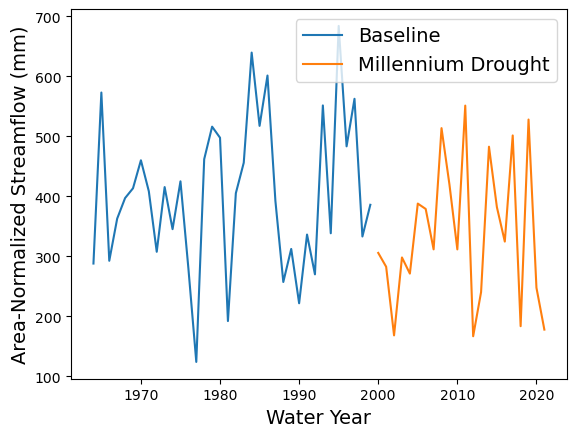

In [7]:
plt.plot(example_pre.water_year, example_pre, label='Baseline')
plt.plot(example_post.water_year, example_post, label='Millennium Drought')
plt.legend(fontsize=14)
plt.ylabel('Area-Normalized Streamflow (mm)', fontsize=14)
plt.xlabel('Water Year', fontsize=14)
# increase 

### <a id='toc1_1_5_'></a>[Visualization of Student's t-test results](#toc0_)

p = 0.974


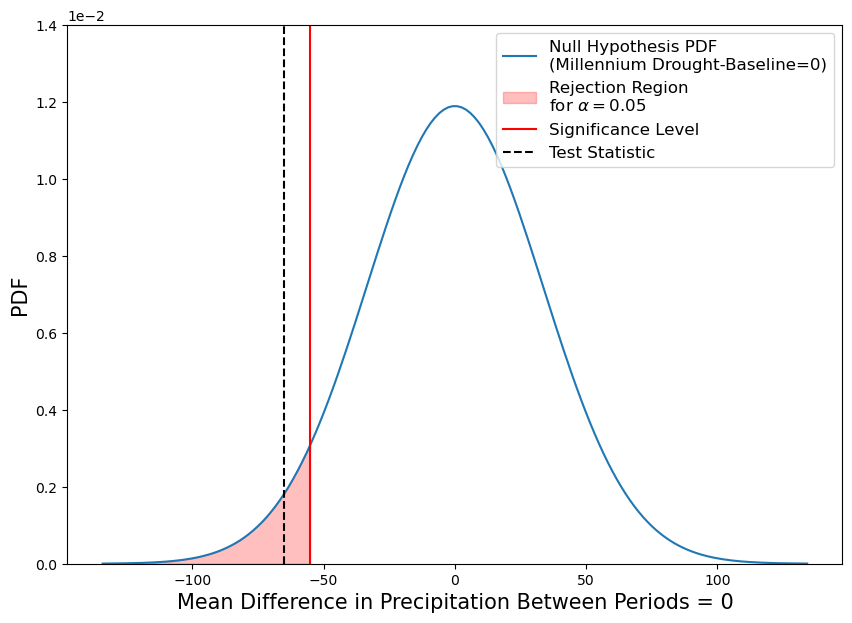

In [8]:
fig, ax = plt.subplots(figsize=(10,7))

# Reference 1 - code adapted from Lab 2-1
# create null pdf
z = np.linspace(-4,4, num=160)*s_pooled
ax.plot(z, 
        stats.norm.pdf(z,delta,s_pooled), 
        label='Null Hypothesis PDF\n(Millennium Drought-Baseline=0)') # 0 and 1 are mu and sigma

# define alpha
alpha = 0.05
# Plot the region that z_test would have to fall in in order for us to reject the null hypothesis
conf = alpha
z_alpha = stats.norm.ppf(conf)
shade_region = np.linspace(np.min(z),z_alpha*s_pooled,10)
ax.fill_between(shade_region,
                stats.norm.pdf(shade_region,delta,s_pooled), 
                color='r', 
                alpha=0.25, 
                label='Rejection Region\n'+r'for $\alpha=0.05$'.format(np.round(conf,2)))
# Plot a line at 95% confidence interval
plt.axvline(z_alpha*s_pooled, 
            color='r', 
            label='Significance Level')
# plt.text(z_alpha*s_pooled, 
#          1.2e-4, 
#          r'Z$_{\alpha}$ = '+str(int(z_alpha)), 
#          fontsize=12, 
#          color='r')
# Plot a line at z_test
plt.axvline(z_test*s_pooled, 
            color='black', 
            linestyle='--', 
            label='Test Statistic')
# plt.text(z_test*s_pooled-30, 
#          0.6e-2, 
#          r'Z$_{test}$ = '+str(int(z_test)), 
#          fontsize=12, 
#          color='k')
# Add labels
ax.set_ylim((0,1.4e-2))
ax.set_xlabel('Mean Difference in Precipitation Between Periods = 0', fontsize=15)
ax.set_ylabel('PDF', fontsize=15)
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
ax.legend(fontsize=12, loc='upper right')
# ax.get_xaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ','))) # reference 1
# plt.title('Figure 2.2 - Null Hypothesis: No increse in Sauk River peak mean flows after 1977')
# compute p value
pvalue = 1 - stats.norm.cdf(z_test)
print("p = {}".format(np.round(pvalue,3)))

### <a id='toc1_1_6_'></a>[Calculate the daily center of mass for each site for each year](#toc0_)

In [9]:
# open daily_streamflow_data
hcdn_daily_q = xr.open_dataset('../data/streamflowdata/selected_hcdn_basin_chars_and_daily_q.nc')

In [10]:
center_of_mass_date = {}
for year in hcdn_daily_q.water_year.to_series().unique():
    example = hcdn_daily_q.where(hcdn_daily_q.water_year==year,drop=True)['q_mm_day'].cumsum(dim='datetime')
    com_value = example.max(dim='datetime')/2
    center_of_mass_date[year] = abs(example - com_value).idxmin(dim='datetime').dt.dayofyear.to_dataframe()
    
center_of_mass_date_da = xr.Dataset(center_of_mass_date).to_array().squeeze()
center_of_mass_date_da = center_of_mass_date_da.where((center_of_mass_date_da>52) & (center_of_mass_date_da<238))
center_of_mass_date_da = center_of_mass_date_da.rename({'variable':'year'})
center_of_mass_date_da.name = 'flow_com'

### <a id='toc1_1_7_'></a>[Separate into mean elevation groups](#toc0_)

Higher elevation > 3200 m
2900 m < Middle Eleveation < 3200 m
Lower elevation < 2900 m

These were separated in the `01_UCRB_exploratory_analysis` notebook. 

In [11]:

# Merge this data array onto the datasets for use
hcdn_daily_q = hcdn_daily_q.merge(hcdn_basin_averages.elevation_category, compat='override')

hcdn_basin_averages = hcdn_basin_averages.merge(center_of_mass_date_da)

### <a id='toc1_1_8_'></a>[Separate into low-, mid- and high- elevation Basins](#toc0_)

In [12]:
high_elevation_daily_q = hcdn_daily_q.where(hcdn_daily_q.elevation_category == 'high', drop=True)
mid_elevation_daily_q = hcdn_daily_q.where(hcdn_daily_q.elevation_category == 'medium', drop=True)
low_elevation_daily_q = hcdn_daily_q.where(hcdn_daily_q.elevation_category == 'low', drop=True)

high_elevation_annual_q = hcdn_basin_averages.where(hcdn_basin_averages.elevation_category == 'high', drop=True)
mid_elevation_annual_q = hcdn_basin_averages.where(hcdn_basin_averages.elevation_category == 'medium', drop=True)
low_elevation_annual_q = hcdn_basin_averages.where(hcdn_basin_averages.elevation_category == 'low', drop=True)

# Center of mass series
com = hcdn_basin_averages['flow_com'].mean(dim='year').to_pandas()

In [44]:
order = [
    '09110000',
    '09109000',
    '09036000',
    '09035900',
    '09035700',
    '09289500',
    '09026500',
    '09352900',
    '09124500',
    '09010500',
    '09196500',
    '09361500',
    '09165000',
    '09112500',
    '09081600',
    '09032000',
    '09365500',
    '09310500',
    '09277500',
    '09255000',
    '09253000',
    '09223000',
    '09059500',
    '09210500',
    '09188500',
    '09166500',
]

# <a id='toc2_'></a>[Change in the flow center of mass between pre- and post-2000 periods](#toc0_)

In [14]:
# Set confidence interval and start year
conf = 0.05
test_start_year = 1964

### <a id='toc2_1_1_'></a>[High Elevation Basins](#toc0_)

In [15]:
high_com_ttest_results = pd.DataFrame(index=high_elevation_annual_q.site_no.values, columns=['Shapiro-Wilke p',
                                                                                    'Shapiro-Wilke Result',
                                                                                    't-test p',
                                                                                    't-test Result',
                                                                                    'mannwhitney p',
                                                                                    'mannwhitney Result',
                                                                                    'value difference'])
for site in high_elevation_annual_q.site_no.values:
    single_site_pre = high_elevation_annual_q.sel(site_no=site)['flow_com'].to_pandas().dropna().loc[test_start_year:1999]
    single_site_post = high_elevation_annual_q.sel(site_no=site)['flow_com'].to_pandas().dropna().loc[2000:]
    # Example of the Shapiro-Wilk Normality Test
    stat, p = stats.shapiro(single_site_pre)
    high_com_ttest_results.loc[site,'Shapiro-Wilke p'] = p

    if p > conf:
        high_com_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably Gaussian'
        
        z_alpha = stats.norm.ppf(conf)
        # print("z_alpha = {}".format(z_alpha)) 

        s_pooled = np.sqrt((single_site_pre.std(ddof=1)**2)/len(single_site_pre) +
                        (single_site_post.std(ddof=1)**2)/len(single_site_post))
        # print('Pooled standard deviation is {} mm'.format(str(s_pooled)))

        # null hypothesis: no change in sample means
        delta = 0*single_site_pre.mean()
        # compute test statistic
        z_test = ((single_site_post.mean()-single_site_pre.mean())-
                delta)/s_pooled
        # print("z-score = {}".format(np.round(z_test,2))) 
        # compute p value
        pvalue = stats.norm.cdf(z_test)
        high_com_ttest_results.loc[site,'t-test p'] = np.round(pvalue,3)
        if pvalue < conf:
            high_com_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Rejected'
        else: 
            high_com_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Accepted'
    else:
        high_com_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably Gaussian''Probably not Gaussian, consider a non-parametric test'
        stat, p_value = stats.mannwhitneyu(single_site_post,single_site_pre, alternative='less')
        high_com_ttest_results.loc[site,'mannwhitney p'] = np.round(p_value,3)
        if p_value < conf:
            high_com_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Rejected'
        else: 
            high_com_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Accepted'
    high_com_ttest_results.loc[site,'value difference'] = np.round(single_site_post.mean()-single_site_pre.mean(),2)

In [16]:
high_com_ttest_results

Shapiro-Wilke p                               Shapiro-Wilke Result  \
09026500        0.166239                                  Probably Gaussian   
09035700        0.670211                                  Probably Gaussian   
09035900        0.668986                                  Probably Gaussian   
09036000        0.876625                                  Probably Gaussian   
09109000        0.011833  Probably GaussianProbably not Gaussian, consid...   
09110000         0.10967                                  Probably Gaussian   
09124500        0.342914                                  Probably Gaussian   
09289500        0.432002                                  Probably Gaussian   
09352900        0.226424                                  Probably Gaussian   

         t-test p             t-test Result mannwhitney p  \
09026500    0.004  Null Hypothesis Rejected           NaN   
09035700    0.004  Null Hypothesis Rejected           NaN   
09035900    0.004  Null Hypothesis Rejected           NaN   
09036000    0.001  Null Hypothesis Rejected           NaN   
09109000      NaN                       NaN         0.992   
09110000    0.694  Null Hypothesis Accepted           NaN   
09124500      0.0  Null Hypothesis Rejected           NaN   
09289500    0.001  Null Hypothesis Rejected           NaN   
09352900      0.0  Null Hypothesis Rejected           NaN   

                mannwhitney Result value difference  
09026500                       NaN            -9.31  
09035700                       NaN            -7.47  
09035900                       NaN            -6.32  
09036000                       NaN            -7.29  
09109000  Null Hypothesis Accepted             9.02  
09110000                       NaN             1.36  
09124500                       NaN            -8.07  
09289500                       NaN            -8.75  
09352900                       NaN            -9.88

### <a id='toc2_1_2_'></a>[Mid Elevation Basins](#toc0_)

In [17]:
mid_com_ttest_results = pd.DataFrame(index=mid_elevation_annual_q.site_no.values, columns=['Shapiro-Wilke p',
                                                                                    'Shapiro-Wilke Result',
                                                                                    't-test p',
                                                                                    't-test Result',
                                                                                    'mannwhitney p',
                                                                                    'mannwhitney Result',
                                                                                    'value difference'])
for site in mid_elevation_annual_q.site_no.values:
    single_site_pre = mid_elevation_annual_q.sel(site_no=site)['flow_com'].to_pandas().dropna().loc[test_start_year:1999]
    single_site_post = mid_elevation_annual_q.sel(site_no=site)['flow_com'].to_pandas().dropna().loc[2000:]
    # Example of the Shapiro-Wilk Normality Test
    stat, p = stats.shapiro(single_site_pre)
    mid_com_ttest_results.loc[site,'Shapiro-Wilke p'] = p

    if p > conf:
        mid_com_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably Gaussian'
        
        z_alpha = stats.norm.ppf(conf)
        # print("z_alpha = {}".format(z_alpha)) 

        s_pooled = np.sqrt((single_site_pre.std(ddof=1)**2)/len(single_site_pre) +
                        (single_site_post.std(ddof=1)**2)/len(single_site_post))
        # print('Pooled standard deviation is {} mm'.format(str(s_pooled)))

        # null hypothesis: no change in sample means
        delta = 0*single_site_pre.mean()
        # compute test statistic
        z_test = ((single_site_post.mean()-single_site_pre.mean())-
                delta)/s_pooled
        # print("z-score = {}".format(np.round(z_test,2))) 
        # compute p value
        pvalue = stats.norm.cdf(z_test)
        mid_com_ttest_results.loc[site,'t-test p'] = np.round(pvalue,3)
        if pvalue < conf:
            mid_com_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Rejected'
        else: 
            mid_com_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Accepted'
    else:
        mid_com_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably Gaussian''Probably not Gaussian, consider a non-parametric test'
        stat, p_value = stats.mannwhitneyu(single_site_post,single_site_pre, alternative='less')
        mid_com_ttest_results.loc[site,'mannwhitney p'] = np.round(p_value,3)
        if p_value < conf:
            mid_com_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Rejected'
        else: 
            mid_com_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Accepted'
    mid_com_ttest_results.loc[site,'value difference'] = np.round(single_site_post.mean()-single_site_pre.mean(),2)

In [18]:
mid_com_ttest_results

Shapiro-Wilke p Shapiro-Wilke Result t-test p  \
09010500         0.94526    Probably Gaussian    0.015   
09032000        0.087952    Probably Gaussian    0.053   
09081600        0.778521    Probably Gaussian    0.004   
09112500        0.824163    Probably Gaussian    0.005   
09165000        0.407025    Probably Gaussian      0.0   
09196500        0.668763    Probably Gaussian    0.022   
09361500        0.541101    Probably Gaussian    0.002   
09365500        0.257664    Probably Gaussian    0.006   

                     t-test Result mannwhitney p mannwhitney Result  \
09010500  Null Hypothesis Rejected           NaN                NaN   
09032000  Null Hypothesis Accepted           NaN                NaN   
09081600  Null Hypothesis Rejected           NaN                NaN   
09112500  Null Hypothesis Rejected           NaN                NaN   
09165000  Null Hypothesis Rejected           NaN                NaN   
09196500  Null Hypothesis Rejected           NaN                NaN   
09361500  Null Hypothesis Rejected           NaN                NaN   
09365500  Null Hypothesis Rejected           NaN                NaN   

         value difference  
09010500            -5.63  
09032000            -8.54  
09081600            -6.13  
09112500            -6.87  
09165000            -9.83  
09196500            -4.85  
09361500            -7.45  
09365500            -7.42

### <a id='toc2_1_3_'></a>[Low Elevation Basins](#toc0_)

In [19]:
low_com_ttest_results = pd.DataFrame(index=low_elevation_annual_q.site_no.values, columns=['Shapiro-Wilke p',
                                                                                    'Shapiro-Wilke Result',
                                                                                    't-test p',
                                                                                    't-test Result',
                                                                                    'mannwhitney p',
                                                                                    'mannwhitney Result',
                                                                                    'value difference',])
for site in low_elevation_annual_q.site_no.values:
    single_site_pre = low_elevation_annual_q.sel(site_no=site)['flow_com'].to_pandas().dropna().loc[test_start_year:1999]
    single_site_post = low_elevation_annual_q.sel(site_no=site)['flow_com'].to_pandas().dropna().loc[2000:]
    # Example of the Shapiro-Wilk Normality Test
    stat, p = stats.shapiro(single_site_pre)
    low_com_ttest_results.loc[site,'Shapiro-Wilke p'] = p

    if p > conf:
        low_com_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably Gaussian'
        
        z_alpha = stats.norm.ppf(conf)
        # print("z_alpha = {}".format(z_alpha)) 

        s_pooled = np.sqrt((single_site_pre.std(ddof=1)**2)/len(single_site_pre) +
                        (single_site_post.std(ddof=1)**2)/len(single_site_post))
        # print('Pooled standard deviation is {} mm'.format(str(s_pooled)))

        # null hypothesis: no change in sample means
        delta = 0*single_site_pre.mean()
        # compute test statistic
        z_test = ((single_site_post.mean()-single_site_pre.mean())-
                delta)/s_pooled
        # print("z-score = {}".format(np.round(z_test,2))) 
        # compute p value
        pvalue = stats.norm.cdf(z_test)
        low_com_ttest_results.loc[site,'t-test p'] = np.round(pvalue,3)
        if pvalue < conf:
            low_com_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Rejected'
        else: 
            low_com_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Accepted'
    else:
        low_com_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably Gaussian''Probably not Gaussian, consider a non-parametric test'
        stat, p_value = stats.mannwhitneyu(single_site_post,single_site_pre, alternative='less')
        low_com_ttest_results.loc[site,'mannwhitney p'] = np.round(p_value,3)
        if p_value < conf:
            low_com_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Rejected'
        else: 
            low_com_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Accepted'

    low_com_ttest_results.loc[site,'value difference'] = np.round(single_site_post.mean()-single_site_pre.mean(),2)
low_com_ttest_results

Shapiro-Wilke p                               Shapiro-Wilke Result  \
09059500         0.73503                                  Probably Gaussian   
09166500        0.764304                                  Probably Gaussian   
09188500        0.343594                                  Probably Gaussian   
09210500        0.000042  Probably GaussianProbably not Gaussian, consid...   
09223000        0.002023  Probably GaussianProbably not Gaussian, consid...   
09253000        0.090695                                  Probably Gaussian   
09255000        0.281161                                  Probably Gaussian   
09277500        0.000033  Probably GaussianProbably not Gaussian, consid...   
09310500        0.231161                                  Probably Gaussian   

         t-test p             t-test Result mannwhitney p  \
09059500    0.003  Null Hypothesis Rejected           NaN   
09166500    0.011  Null Hypothesis Rejected           NaN   
09188500    0.041  Null Hypothesis Rejected           NaN   
09210500      NaN                       NaN         0.039   
09223000      NaN                       NaN         0.036   
09253000    0.011  Null Hypothesis Rejected           NaN   
09255000    0.029  Null Hypothesis Rejected           NaN   
09277500      NaN                       NaN         0.001   
09310500    0.036  Null Hypothesis Rejected           NaN   

                mannwhitney Result value difference  
09059500                       NaN            -6.49  
09166500                       NaN            -5.58  
09188500                       NaN            -3.82  
09210500  Null Hypothesis Rejected            -3.16  
09223000  Null Hypothesis Rejected            -3.41  
09253000                       NaN            -5.45  
09255000                       NaN            -5.89  
09277500  Null Hypothesis Rejected           -25.43  
09310500                       NaN            -5.06

### <a id='toc2_1_4_'></a>[Center of Mass Change Plots](#toc0_)

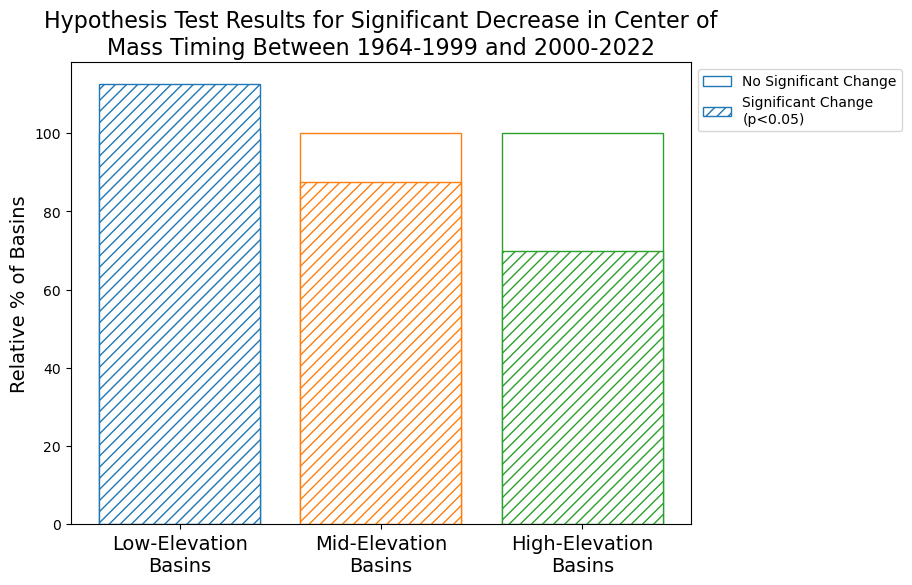

In [20]:

# create a dataframe with the results
low_rejected = len(low_com_ttest_results[(low_com_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (low_com_ttest_results['mannwhitney p']<=0.05)])
mid_rejected = len(mid_com_ttest_results[(mid_com_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (mid_com_ttest_results['mannwhitney p']<=0.05)])
high_rejected = len(high_com_ttest_results[(high_com_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (high_com_ttest_results['mannwhitney p']<=0.05)])
# create a stacked bar chart with low, mid, and high elevation sites
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(x=['Low-Elevation\nBasins','Mid-Elevation\nBasins','High-Elevation\nBasins'], 
       height=[100, 100, 100], 
       ec=['#1f77b4','#ff7f0e','#2ca02c'], 
       color=['white','white','white'])
ax.bar(x=['Low-Elevation\nBasins','Mid-Elevation\nBasins','High-Elevation\nBasins'], 
       height=[100*(low_rejected/8), 100*(mid_rejected/8), 100*(high_rejected/10)], 
       ec=['#1f77b4','#ff7f0e','#2ca02c'], 
       color=['white','white','white'], 
       hatch='///')
# add a legend with the hatch pattern
ax.legend(['No Significant Change','Significant Change\n(p<0.05)'], loc='upper left', bbox_to_anchor=(1,1))
# add y-label for number of basins
ax.set_ylabel('Relative % of Basins', fontsize=14)
# add title
ax.set_title(f'Hypothesis Test Results for Significant Decrease in Center of\nMass Timing Between {test_start_year}-1999 and 2000-2022', fontsize=16)
# increase the font-size of the x-aixs tick labels
ax.tick_params(axis='x', labelsize=14)



(0.0, 13.0)

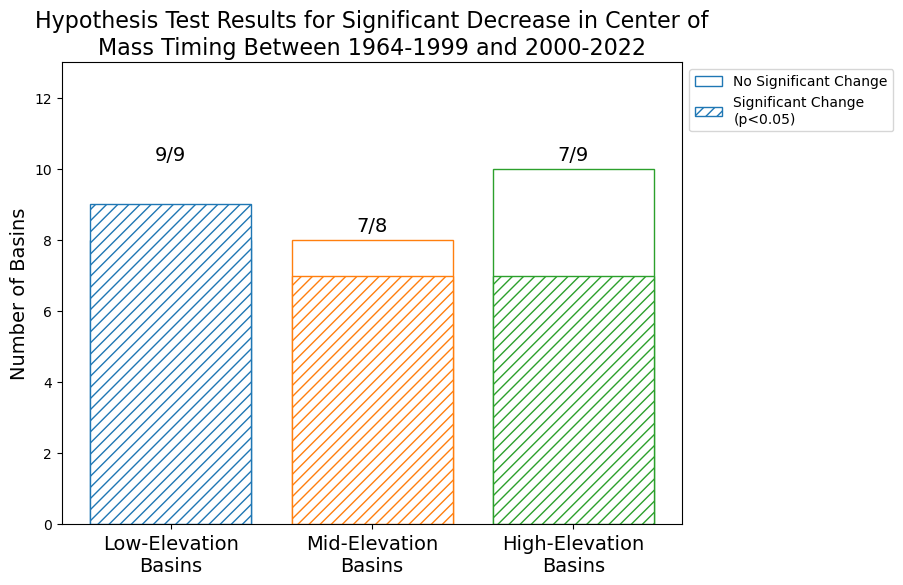

In [21]:
# create a dataframe with the results
low_rejected = len(low_com_ttest_results[(low_com_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (low_com_ttest_results['mannwhitney p']<=0.05)])
mid_rejected = len(mid_com_ttest_results[(mid_com_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (mid_com_ttest_results['mannwhitney p']<=0.05)])
high_rejected = len(high_com_ttest_results[(high_com_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (high_com_ttest_results['mannwhitney p']<=0.05)])
# create a stacked bar chart with low, mid, and high elevation sites
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(x=['Low-Elevation\nBasins','Mid-Elevation\nBasins','High-Elevation\nBasins'], 
       height=[8, 8, 10], 
       ec=['#1f77b4','#ff7f0e','#2ca02c'], 
       color=['white','white','white'])
ax.bar(x=['Low-Elevation\nBasins','Mid-Elevation\nBasins','High-Elevation\nBasins'], 
       height=[(low_rejected), (mid_rejected), (high_rejected)], 
       ec=['#1f77b4','#ff7f0e','#2ca02c'], 
       color=['white','white','white'], 
       hatch='///')
# add a legend with the hatch pattern
ax.legend(['No Significant Change','Significant Change\n(p<0.05)'], loc='upper left', bbox_to_anchor=(1,1))
# add y-label for number of basins
ax.set_ylabel('Number of Basins', fontsize=14)
# add title
ax.set_title(f'Hypothesis Test Results for Significant Decrease in Center of\nMass Timing Between {test_start_year}-1999 and 2000-2022', fontsize=16)
# increase the font-size of the x-aixs tick labels
ax.tick_params(axis='x', labelsize=14)
# add text to the bars with the number of rejected values in each category over the number of basins in each category
ax.text(x=0, y=10.25, s=f'{low_rejected}/9', fontsize=14, ha='center')
ax.text(x=1, y=8.25, s=f'{mid_rejected}/8', fontsize=14, ha='center')
ax.text(x=2, y=10.25, s=f'{high_rejected}/9', fontsize=14, ha='center')
ax.set_ylim(0,13)

# <a id='toc3_'></a>[Change in annual mean streamflow between pre- and post-2000 periods](#toc0_)

### <a id='toc3_1_1_'></a>[High Elevation Basins](#toc0_)

In [22]:
high_meanq_ttest_results = pd.DataFrame(index=high_elevation_annual_q.site_no.values, columns=['Shapiro-Wilke p',
                                                                                    'Shapiro-Wilke Result',
                                                                                    't-test p',
                                                                                    't-test Result',
                                                                                    'mannwhitney p',
                                                                                    'mannwhitney Result',
                                                                                    'percent change',
                                                                                    'value difference [mm]'])
for site in high_elevation_annual_q.site_no.values:
    single_site_pre = high_elevation_annual_q.sel(site_no=site)['wy_q_mm'].to_pandas().dropna().loc[1964:1999]
    single_site_post = high_elevation_annual_q.sel(site_no=site)['wy_q_mm'].to_pandas().dropna().loc[2000:]
    # Example of the Shapiro-Wilk Normality Test
    stat, p = stats.shapiro(single_site_pre)
    high_meanq_ttest_results.loc[site,'Shapiro-Wilke p'] = p
    if p > 100:
        high_meanq_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably Gaussian'
        
        z_alpha = stats.norm.ppf(conf)
        # print("z_alpha = {}".format(z_alpha)) 

        s_pooled = np.sqrt((single_site_pre.std(ddof=1)**2)/len(single_site_pre) +
                        (single_site_post.std(ddof=1)**2)/len(single_site_post))
        # print('Pooled standard deviation is {} mm'.format(str(s_pooled)))

        # null hypothesis: no change in sample means
        delta = 0*single_site_pre.mean()
        # compute test statistic
        z_test = ((single_site_post.mean()-single_site_pre.mean())-
                delta)/s_pooled
        # print("z-score = {}".format(np.round(z_test,2))) 
        # compute p value
        pvalue = stats.norm.cdf(z_test)
        high_meanq_ttest_results.loc[site,'t-test p'] = np.round(pvalue,3)
        if pvalue < conf:
            high_meanq_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Rejected'
        else: 
            high_meanq_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Accepted'
       
    else:
        high_meanq_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably Gaussian''Probably not Gaussian, consider a non-parametric test'
        stat, p_value = stats.mannwhitneyu(single_site_post,single_site_pre, alternative='less')
        high_meanq_ttest_results.loc[site,'mannwhitney p'] = np.round(p_value,3)
        if p_value < conf:
            high_meanq_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Rejected'
        else: 
            high_meanq_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Accepted'
     # calculate the percent change between the two periods
    high_meanq_ttest_results.loc[site,'percent change'] = np.round((single_site_post.mean()-single_site_pre.mean())/single_site_pre.mean()*100,1)
    # calculate the difference in the mean values between the two periods
    high_meanq_ttest_results.loc[site,'value difference [mm]'] = np.round(single_site_post.mean()-single_site_pre.mean(),1)

In [23]:
high_meanq_ttest_results

Shapiro-Wilke p                               Shapiro-Wilke Result  \
09026500         0.00084  Probably GaussianProbably not Gaussian, consid...   
09035700        0.140971  Probably GaussianProbably not Gaussian, consid...   
09035900        0.062464  Probably GaussianProbably not Gaussian, consid...   
09036000        0.169225  Probably GaussianProbably not Gaussian, consid...   
09109000        0.344373  Probably GaussianProbably not Gaussian, consid...   
09110000        0.328978  Probably GaussianProbably not Gaussian, consid...   
09124500        0.804693  Probably GaussianProbably not Gaussian, consid...   
09289500        0.503171  Probably GaussianProbably not Gaussian, consid...   
09352900        0.242741  Probably GaussianProbably not Gaussian, consid...   

         t-test p t-test Result mannwhitney p        mannwhitney Result  \
09026500      NaN           NaN         0.503  Null Hypothesis Accepted   
09035700      NaN           NaN          0.31  Null Hypothesis Accepted   
09035900      NaN           NaN          0.51  Null Hypothesis Accepted   
09036000      NaN           NaN         0.375  Null Hypothesis Accepted   
09109000      NaN           NaN         0.018  Null Hypothesis Rejected   
09110000      NaN           NaN         0.004  Null Hypothesis Rejected   
09124500      NaN           NaN         0.089  Null Hypothesis Accepted   
09289500      NaN           NaN         0.007  Null Hypothesis Rejected   
09352900      NaN           NaN         0.026  Null Hypothesis Rejected   

         percent change value difference [mm]  
09026500            0.1                   0.3  
09035700           -6.2                 -24.2  
09035900           -2.3                  -9.4  
09036000           -4.9                 -19.2  
09109000          -15.3                 -42.8  
09110000          -19.0                 -45.8  
09124500          -10.7                 -25.4  
09289500          -16.6                 -88.4  
09352900          -15.6                -111.9

### <a id='toc3_1_2_'></a>[Mid Elevation Basins](#toc0_)

In [24]:
mid_meanq_ttest_results = pd.DataFrame(index=mid_elevation_annual_q.site_no.values, columns=['Shapiro-Wilke p',
                                                                                    'Shapiro-Wilke Result',
                                                                                    't-test p',
                                                                                    't-test Result',
                                                                                    'mannwhitney p',
                                                                                    'mannwhitney Result',
                                                                                    'percent change',
                                                                                    'value difference [mm]'])
for site in mid_elevation_annual_q.site_no.values:
    single_site_pre = mid_elevation_annual_q.sel(site_no=site)['wy_q_mm'].to_pandas().dropna().loc[test_start_year:1999]
    single_site_post = mid_elevation_annual_q.sel(site_no=site)['wy_q_mm'].to_pandas().dropna().loc[2000:]
    # Example of the Shapiro-Wilk Normality Test
    stat, p = stats.shapiro(single_site_pre)
    mid_meanq_ttest_results.loc[site,'Shapiro-Wilke p'] = p

    if p > 100:
        mid_meanq_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably Gaussian'
        
        z_alpha = stats.norm.ppf(conf)
        # print("z_alpha = {}".format(z_alpha)) 

        s_pooled = np.sqrt((single_site_pre.std(ddof=1)**2)/len(single_site_pre) +
                        (single_site_post.std(ddof=1)**2)/len(single_site_post))
        # print('Pooled standard deviation is {} mm'.format(str(s_pooled)))

        # null hypothesis: no change in sample means
        delta = 0*single_site_pre.mean()
        # compute test statistic
        z_test = ((single_site_post.mean()-single_site_pre.mean())-
                delta)/s_pooled
        # print("z-score = {}".format(np.round(z_test,2))) 
        # compute p value
        pvalue = stats.norm.cdf(z_test)
        mid_meanq_ttest_results.loc[site,'t-test p'] = np.round(pvalue,3)
        if pvalue < conf:
            mid_meanq_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Rejected'
        else: 
            mid_meanq_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Accepted'
    else:
        mid_meanq_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably Gaussian''Probably not Gaussian, consider a non-parametric test'
        stat, p_value = stats.mannwhitneyu(single_site_post,single_site_pre, alternative='less')
        mid_meanq_ttest_results.loc[site,'mannwhitney p'] = np.round(p_value,3)
        if p_value < conf:
            mid_meanq_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Rejected'
        else: 
            mid_meanq_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Accepted'
    # calculate the percent change between the two periods
    mid_meanq_ttest_results.loc[site,'percent change'] = np.round((single_site_post.mean()-single_site_pre.mean())/single_site_pre.mean()*100,1)
    mid_meanq_ttest_results.loc[site,'value difference [mm]'] = np.round((single_site_post.mean()-single_site_pre.mean()),1)

In [25]:
mid_meanq_ttest_results

Shapiro-Wilke p                               Shapiro-Wilke Result  \
09010500        0.546842  Probably GaussianProbably not Gaussian, consid...   
09032000        0.004783  Probably GaussianProbably not Gaussian, consid...   
09081600        0.454771  Probably GaussianProbably not Gaussian, consid...   
09112500        0.996541  Probably GaussianProbably not Gaussian, consid...   
09165000        0.040168  Probably GaussianProbably not Gaussian, consid...   
09196500        0.696656  Probably GaussianProbably not Gaussian, consid...   
09361500         0.06976  Probably GaussianProbably not Gaussian, consid...   
09365500        0.220101  Probably GaussianProbably not Gaussian, consid...   

         t-test p t-test Result mannwhitney p        mannwhitney Result  \
09010500      NaN           NaN         0.265  Null Hypothesis Accepted   
09032000      NaN           NaN          0.77  Null Hypothesis Accepted   
09081600      NaN           NaN         0.046  Null Hypothesis Rejected   
09112500      NaN           NaN         0.023  Null Hypothesis Rejected   
09165000      NaN           NaN         0.014  Null Hypothesis Rejected   
09196500      NaN           NaN          0.04  Null Hypothesis Rejected   
09361500      NaN           NaN         0.016  Null Hypothesis Rejected   
09365500      NaN           NaN         0.013  Null Hypothesis Rejected   

         percent change value difference [mm]  
09010500           -0.3                  -1.2  
09032000            9.1                  19.3  
09081600          -12.8                 -80.8  
09112500          -16.4                 -66.1  
09165000          -20.6                 -93.3  
09196500           -8.2                 -67.9  
09361500          -19.5                 -79.7  
09365500          -28.2                -131.7

### <a id='toc3_1_3_'></a>[Low Elevation Basins](#toc0_)

In [26]:
low_meanq_ttest_results = pd.DataFrame(index=low_elevation_annual_q.site_no.values, columns=['Shapiro-Wilke p',
                                                                                    'Shapiro-Wilke Result',
                                                                                    't-test p',
                                                                                    't-test Result',
                                                                                    'mannwhitney p',
                                                                                    'mannwhitney Result',
                                                                                    'percent change',
                                                                                    'value difference [mm]'])
for site in low_elevation_annual_q.site_no.values:
    single_site_pre = low_elevation_annual_q.sel(site_no=site)['wy_q_mm'].to_pandas().dropna().loc[test_start_year:1999]
    single_site_post = low_elevation_annual_q.sel(site_no=site)['wy_q_mm'].to_pandas().dropna().loc[2000:]
    # Example of the Shapiro-Wilk Normality Test
    stat, p = stats.shapiro(single_site_pre)
    low_meanq_ttest_results.loc[site,'Shapiro-Wilke p'] = p

    if p > 100:
        low_meanq_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably Gaussian'
        
        z_alpha = stats.norm.ppf(conf)
        # print("z_alpha = {}".format(z_alpha)) 

        s_pooled = np.sqrt((single_site_pre.std(ddof=1)**2)/len(single_site_pre) +
                        (single_site_post.std(ddof=1)**2)/len(single_site_post))
        # print('Pooled standard deviation is {} mm'.format(str(s_pooled)))

        # null hypothesis: no change in sample means
        delta = 0*single_site_pre.mean()
        # compute test statistic
        z_test = ((single_site_post.mean()-single_site_pre.mean())-
                delta)/s_pooled
        # print("z-score = {}".format(np.round(z_test,2))) 
        # compute p value
        pvalue = stats.norm.cdf(z_test)
        low_meanq_ttest_results.loc[site,'t-test p'] = np.round(pvalue,3)
        if pvalue < conf:
            low_meanq_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Rejected'
        else: 
            low_meanq_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Accepted'
    else:
        low_meanq_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably Gaussian''Probably not Gaussian, consider a non-parametric test'
        stat, p_value = stats.mannwhitneyu(single_site_post,single_site_pre, alternative='less')
        low_meanq_ttest_results.loc[site,'mannwhitney p'] = np.round(p_value,3)
        if p_value < conf:
            low_meanq_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Rejected'
        else: 
            low_meanq_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Accepted'
    # calculate the percent change between the two periods
    low_meanq_ttest_results.loc[site,'percent change'] = np.round((single_site_post.mean()-single_site_pre.mean())/single_site_pre.mean()*100,1)
    low_meanq_ttest_results.loc[site,'value difference [mm]'] = np.round((single_site_post.mean()-single_site_pre.mean()),1)

In [27]:
low_meanq_ttest_results

Shapiro-Wilke p                               Shapiro-Wilke Result  \
09059500        0.584776  Probably GaussianProbably not Gaussian, consid...   
09166500        0.096332  Probably GaussianProbably not Gaussian, consid...   
09188500        0.682539  Probably GaussianProbably not Gaussian, consid...   
09210500        0.254057  Probably GaussianProbably not Gaussian, consid...   
09223000        0.857539  Probably GaussianProbably not Gaussian, consid...   
09253000        0.480924  Probably GaussianProbably not Gaussian, consid...   
09255000        0.592863  Probably GaussianProbably not Gaussian, consid...   
09277500         0.47808  Probably GaussianProbably not Gaussian, consid...   
09310500        0.260599  Probably GaussianProbably not Gaussian, consid...   

         t-test p t-test Result mannwhitney p        mannwhitney Result  \
09059500      NaN           NaN         0.285  Null Hypothesis Accepted   
09166500      NaN           NaN         0.005  Null Hypothesis Rejected   
09188500      NaN           NaN         0.017  Null Hypothesis Rejected   
09210500      NaN           NaN         0.078  Null Hypothesis Accepted   
09223000      NaN           NaN          0.01  Null Hypothesis Rejected   
09253000      NaN           NaN         0.091  Null Hypothesis Accepted   
09255000      NaN           NaN         0.043  Null Hypothesis Rejected   
09277500      NaN           NaN           0.0  Null Hypothesis Rejected   
09310500      NaN           NaN         0.001  Null Hypothesis Rejected   

         percent change value difference [mm]  
09059500           -3.8                 -11.1  
09166500          -27.0                 -81.7  
09188500          -13.3                 -50.7  
09210500          -13.7                 -23.5  
09223000          -24.5                 -68.9  
09253000          -10.0                 -33.1  
09255000          -14.3                 -28.5  
09277500          -35.7                 -63.9  
09310500          -31.0                 -98.9

In [28]:
combined = pd.concat([low_meanq_ttest_results, mid_meanq_ttest_results, high_meanq_ttest_results], keys=['low','mid','high'])
combined['percent change'] = combined['percent change']/100
# save the results to a csv
combined.to_csv('../data/streamflow_ttest_results.csv')

### <a id='toc3_1_4_'></a>[Upper Colorado River Basin](#toc0_)

In [29]:
ucrb_meanq_ttest_results = pd.DataFrame(index=['UCRB'], columns=['Shapiro-Wilke p',
                                                                                    'Shapiro-Wilke Result',
                                                                                    't-test p',
                                                                                    't-test Result',
                                                                                    'mannwhitney p',
                                                                                    'mannwhitney Result',
                                                                                    'percent difference',
                                                                                    'value difference'])

single_site_pre = ucrb_naturalized_streamflow['q_mm_day'].loc[test_start_year:1999]
single_site_post = ucrb_naturalized_streamflow['q_mm_day'].loc[2000:2022]
# Example of the Shapiro-Wilk Normality Test
stat, p = stats.shapiro(single_site_pre)
ucrb_meanq_ttest_results.loc['UCRB','Shapiro-Wilke p'] = p

if p > conf:
    ucrb_meanq_ttest_results.loc['UCRB','Shapiro-Wilke Result'] = 'Probably Gaussian'
    
    z_alpha = stats.norm.ppf(conf)
    # print("z_alpha = {}".format(z_alpha)) 

    s_pooled = np.sqrt((single_site_pre.std(ddof=1)**2)/len(single_site_pre) +
                    (single_site_post.std(ddof=1)**2)/len(single_site_post))
    # print('Pooled standard deviation is {} mm'.format(str(s_pooled)))

    # null hypothesis: no change in sample means
    delta = 0*single_site_pre.mean()
    # compute test statistic
    z_test = ((single_site_post.mean()-single_site_pre.mean())-
            delta)/s_pooled
    # print("z-score = {}".format(np.round(z_test,2))) 
    # compute p value
    pvalue = stats.norm.cdf(z_test)
    ucrb_meanq_ttest_results.loc['UCRB','t-test p'] = np.round(pvalue,3)
    if pvalue < conf:
        ucrb_meanq_ttest_results.loc['UCRB','t-test Result'] = 'Null Hypothesis Rejected'
    else: 
        ucrb_meanq_ttest_results.loc['UCRB','t-test Result'] = 'Null Hypothesis Accepted'
else:
    ucrb_meanq_ttest_results.loc['UCRB','Shapiro-Wilke Result'] = 'Probably Gaussian''Probably not Gaussian, consider a non-parametric test'
    stat, p_value = stats.mannwhitneyu(single_site_post,single_site_pre, alternative='less')
    ucrb_meanq_ttest_results.loc['UCRB','mannwhitney p'] = np.round(p_value,3)
    if p_value < conf:
        ucrb_meanq_ttest_results.loc['UCRB','mannwhitney Result'] = 'Null Hypothesis Rejected'
    else: 
        ucrb_meanq_ttest_results.loc['UCRB','mannwhitney Result'] = 'Null Hypothesis Accepted'
ucrb_meanq_ttest_results.loc['UCRB','percent difference'] = np.round((single_site_post.mean()-single_site_pre.mean())/single_site_pre.mean()*100,1)
ucrb_meanq_ttest_results.loc['UCRB','value difference'] = np.round(single_site_post.mean()-single_site_pre.mean())

In [30]:
low_meanq_ttest_results

Shapiro-Wilke p                               Shapiro-Wilke Result  \
09059500        0.584776  Probably GaussianProbably not Gaussian, consid...   
09166500        0.096332  Probably GaussianProbably not Gaussian, consid...   
09188500        0.682539  Probably GaussianProbably not Gaussian, consid...   
09210500        0.254057  Probably GaussianProbably not Gaussian, consid...   
09223000        0.857539  Probably GaussianProbably not Gaussian, consid...   
09253000        0.480924  Probably GaussianProbably not Gaussian, consid...   
09255000        0.592863  Probably GaussianProbably not Gaussian, consid...   
09277500         0.47808  Probably GaussianProbably not Gaussian, consid...   
09310500        0.260599  Probably GaussianProbably not Gaussian, consid...   

         t-test p t-test Result mannwhitney p        mannwhitney Result  \
09059500      NaN           NaN         0.285  Null Hypothesis Accepted   
09166500      NaN           NaN         0.005  Null Hypothesis Rejected   
09188500      NaN           NaN         0.017  Null Hypothesis Rejected   
09210500      NaN           NaN         0.078  Null Hypothesis Accepted   
09223000      NaN           NaN          0.01  Null Hypothesis Rejected   
09253000      NaN           NaN         0.091  Null Hypothesis Accepted   
09255000      NaN           NaN         0.043  Null Hypothesis Rejected   
09277500      NaN           NaN           0.0  Null Hypothesis Rejected   
09310500      NaN           NaN         0.001  Null Hypothesis Rejected   

         percent change value difference [mm]  
09059500           -3.8                 -11.1  
09166500          -27.0                 -81.7  
09188500          -13.3                 -50.7  
09210500          -13.7                 -23.5  
09223000          -24.5                 -68.9  
09253000          -10.0                 -33.1  
09255000          -14.3                 -28.5  
09277500          -35.7                 -63.9  
09310500          -31.0                 -98.9

## <a id='toc3_2_'></a>[Annual Mean Flow Change Plots](#toc0_)

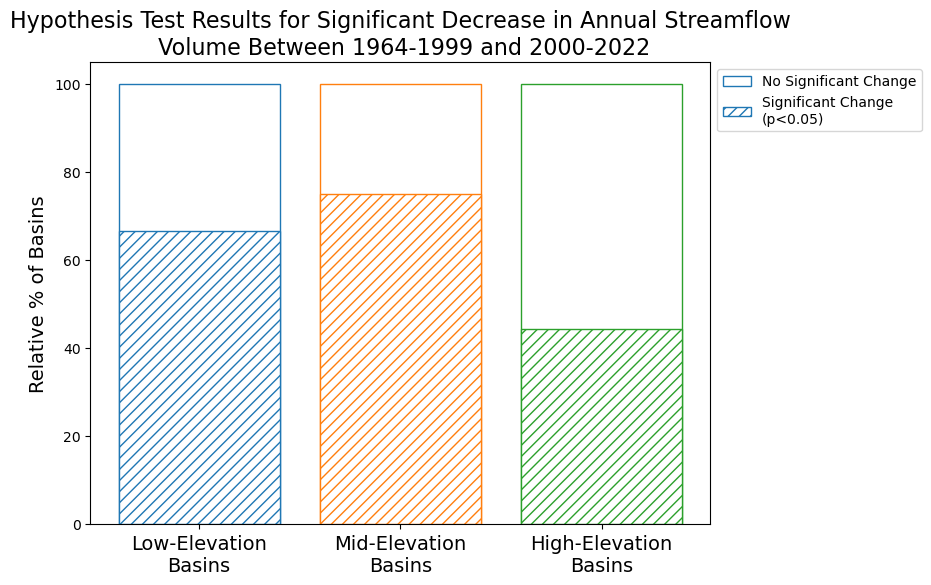

In [31]:

# create a dataframe with the results
low_rejected = len(low_meanq_ttest_results[(low_meanq_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (low_meanq_ttest_results['mannwhitney p']<=0.05)])
mid_rejected = len(mid_meanq_ttest_results[(mid_meanq_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (mid_meanq_ttest_results['mannwhitney p']<=0.05)])
high_rejected = len(high_meanq_ttest_results[(high_meanq_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (high_meanq_ttest_results['mannwhitney p']<=0.05)])
# create a stacked bar chart with low, mid, and high elevation sites
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(x=['Low-Elevation\nBasins','Mid-Elevation\nBasins','High-Elevation\nBasins'], 
       height=[100, 100, 100], 
       ec=['#1f77b4','#ff7f0e','#2ca02c'], 
       color=['white','white','white'])
ax.bar(x=['Low-Elevation\nBasins','Mid-Elevation\nBasins','High-Elevation\nBasins'], 
       height=[100*(low_rejected/9), 100*(mid_rejected/8), 100*(high_rejected/9)], 
       ec=['#1f77b4','#ff7f0e','#2ca02c'], 
       color=['white','white','white'], 
       hatch='///')
# add a legend with the hatch pattern
ax.legend(['No Significant Change','Significant Change\n(p<0.05)'], loc='upper left', bbox_to_anchor=(1,1))
# add y-label for number of basins
ax.set_ylabel('Relative % of Basins', fontsize=14)
# add title
ax.set_title(f'Hypothesis Test Results for Significant Decrease in Annual Streamflow\n Volume Between {test_start_year}-1999 and 2000-2022', fontsize=16)
# increase the font-size of the x-aixs tick labels
ax.tick_params(axis='x', labelsize=14)



(0.0, 13.0)

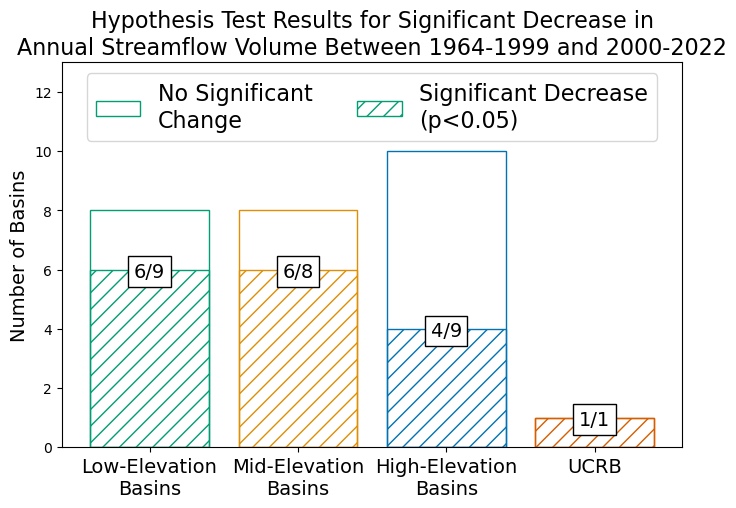

In [32]:
# create a dataframe with the results
low_rejected = len(low_meanq_ttest_results[(low_meanq_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (low_meanq_ttest_results['mannwhitney p']<=0.05)])
mid_rejected = len(mid_meanq_ttest_results[(mid_meanq_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (mid_meanq_ttest_results['mannwhitney p']<=0.05)])
high_rejected = len(high_meanq_ttest_results[(high_meanq_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (high_meanq_ttest_results['mannwhitney p']<=0.05)])
# calculate the same values but with 0.10 as the threshold
low_rejected_10 = len(low_meanq_ttest_results[(low_meanq_ttest_results['t-test p']<=0.10) |
                                               (low_meanq_ttest_results['mannwhitney p']<=0.10)])                                         
mid_rejected_10 = len(mid_meanq_ttest_results[(mid_meanq_ttest_results['t-test p']<=0.10) |
                                                   (mid_meanq_ttest_results['mannwhitney p']<=0.10)])    
high_rejected_10 = len(high_meanq_ttest_results[(high_meanq_ttest_results['t-test p']<=0.10) |
                                                         (high_meanq_ttest_results['mannwhitney p']<=0.10)])

ucrb_rejected = len(ucrb_meanq_ttest_results[(ucrb_meanq_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (ucrb_meanq_ttest_results['mannwhitney p']<0.05)])
# create a stacked bar chart with low, mid, and high elevation sites
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x=['Low-Elevation\nBasins','Mid-Elevation\nBasins','High-Elevation\nBasins', 'UCRB'], 
       height=[8, 8, 10, 1], 
       ec=[(0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
           (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),  
           (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),  
           (0.8352941176470589, 0.3686274509803922, 0.0)], 
       color=['white','white','white', 'white'])
# ax.bar(x=['Low-Elevation\nBasins','Mid-Elevation\nBasins','High-Elevation\nBasins','UCRB'],
#        height=[(low_rejected_10), (mid_rejected_10), (high_rejected_10),1],
#        ec=[(0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
#            (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),  
#            (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
#            (0.8352941176470589, 0.3686274509803922, 0.0)],
#        color=['white','white','white','white'],
#        hatch='\\\\')

ax.bar(x=['Low-Elevation\nBasins','Mid-Elevation\nBasins','High-Elevation\nBasins','UCRB'], 
       height=[(low_rejected), (mid_rejected), (high_rejected), (ucrb_rejected)], 
       ec=[(0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
           (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),  
           (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),  
           (0.8352941176470589, 0.3686274509803922, 0.0)], 
       color=['none','none','none', 'none'], 
       hatch='//')
# add a legend with the hatch pattern
ax.legend(['No Significant\nChange','Significant Decrease\n(p<0.05)'], ncols=3, loc='upper center', fontsize=16)
# add y-label for number of basins
ax.set_ylabel('Number of Basins', fontsize=14)
# add title
ax.set_title(f'Hypothesis Test Results for Significant Decrease in\nAnnual Streamflow Volume Between {test_start_year}-1999 and 2000-2022', fontsize=16)
# increase the font-size of the x-aixs tick labels
ax.tick_params(axis='x', labelsize=14)
# add text to the bars with the number of rejected values in each category over the number of basins in each category
ax.text(x=0, y=low_rejected-0.25, s=f'{low_rejected}/9', fontsize=14, ha='center', bbox=dict(facecolor='white', alpha=1.0, ec='k'))
ax.text(x=1, y=mid_rejected-0.25, s=f'{mid_rejected}/8', fontsize=14, ha='center', bbox=dict(facecolor='white', alpha=1.0, ec='k'))
ax.text(x=2, y=high_rejected-0.25, s=f'{high_rejected}/9', fontsize=14, ha='center', bbox=dict(facecolor='white', alpha=1.0, ec='k'))
ax.text(x=3, y=ucrb_rejected-0.25, s=f'{ucrb_rejected}/1', fontsize=14, ha='center', bbox=dict(facecolor='white', alpha=1.0, ec='k'))
ax.set_ylim(0,13)

# <a id='toc4_'></a>[Change in the amount of annual precipitation in pre- and post-2000 periods](#toc0_)

### <a id='toc4_1_1_'></a>[High Elevation Basins](#toc0_)

In [33]:
high_annualp_ttest_results = pd.DataFrame(index=high_elevation_annual_q.site_no.values, columns=['Shapiro-Wilke p',
                                                                                    'Shapiro-Wilke Result',
                                                                                    't-test p',
                                                                                    't-test Result',
                                                                                    'mannwhitney p',
                                                                                    'mannwhitney Result',
                                                                                    'percent change',
                                                                                    'value difference'])
for site in high_elevation_annual_q.site_no.values:
    minyear = high_elevation_annual_q['wy_ppt'].sel(site_no=site).to_pandas().dropna().index.min()
    single_site_pre = (high_elevation_annual_q.sel(site_no=site)['wy_ppt'].to_pandas().dropna().loc[test_start_year:1999])
    single_site_post = (high_elevation_annual_q.sel(site_no=site)['wy_ppt'].to_pandas().dropna().loc[2000:])
    # Example of the Shapiro-Wilk Normality Test
    stat, p = stats.shapiro(single_site_pre)
    high_annualp_ttest_results.loc[site,'Shapiro-Wilke p'] = p
    if p > conf:
        high_annualp_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably Gaussian'
        
        z_alpha = stats.norm.ppf(conf)
        # print("z_alpha = {}".format(z_alpha)) 

        s_pooled = np.sqrt((single_site_pre.std(ddof=1)**2)/len(single_site_pre) +
                        (single_site_post.std(ddof=1)**2)/len(single_site_post))
        # print('Pooled standard deviation is {} mm'.format(str(s_pooled)))

        # null hypothesis: no change in sample means
        delta = 0*single_site_pre.mean()
        # compute test statistic
        z_test = ((single_site_post.mean()-single_site_pre.mean())-
                delta)/s_pooled
        # print("z-score = {}".format(np.round(z_test,2))) 
        # compute p value
        pvalue = stats.norm.cdf(z_test)
        high_annualp_ttest_results.loc[site,'t-test p'] = np.round(pvalue,3)
        if pvalue < conf:
            high_annualp_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Rejected'
        else: 
            high_annualp_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Accepted'
    else:
        high_annualp_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably not Gaussian, consider a non-parametric test'
        stat, p_value = stats.mannwhitneyu(single_site_post,single_site_pre, alternative='greater')
        high_annualp_ttest_results.loc[site,'mannwhitney p'] = np.round(p_value,3)
        if p_value < conf:
            high_annualp_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Rejected'
        else: 
            high_annualp_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Accepted'
    # Calculate the percent change between the two periods
    high_annualp_ttest_results.loc[site,'percent change'] = np.round(100*(single_site_post.mean()-single_site_pre.mean())/single_site_pre.mean(),2)
    # Calculate the difference in the mean values between the two periods
    high_annualp_ttest_results.loc[site,'value difference'] = np.round(single_site_post.mean()-single_site_pre.mean(),2)

In [34]:
high_annualp_ttest_results

Shapiro-Wilke p Shapiro-Wilke Result t-test p  \
09026500        0.693131    Probably Gaussian    0.517   
09035700        0.649531    Probably Gaussian     0.47   
09035900        0.536102    Probably Gaussian     0.55   
09036000          0.5441    Probably Gaussian    0.512   
09109000        0.271373    Probably Gaussian    0.009   
09110000        0.231895    Probably Gaussian    0.016   
09124500        0.106198    Probably Gaussian    0.008   
09289500        0.247587    Probably Gaussian    0.013   
09352900        0.274882    Probably Gaussian    0.001   

                     t-test Result mannwhitney p mannwhitney Result  \
09026500  Null Hypothesis Accepted           NaN                NaN   
09035700  Null Hypothesis Accepted           NaN                NaN   
09035900  Null Hypothesis Accepted           NaN                NaN   
09036000  Null Hypothesis Accepted           NaN                NaN   
09109000  Null Hypothesis Rejected           NaN                NaN   
09110000  Null Hypothesis Rejected           NaN                NaN   
09124500  Null Hypothesis Rejected           NaN                NaN   
09289500  Null Hypothesis Rejected           NaN                NaN   
09352900  Null Hypothesis Rejected           NaN                NaN   

         percent change value difference  
09026500           0.16             1.08  
09035700          -0.29            -2.08  
09035900           0.51             3.57  
09036000           0.11              0.8  
09109000          -9.55       -72.199997  
09110000          -8.65       -62.259998  
09124500         -10.13       -75.190002  
09289500          -10.2       -95.019997  
09352900         -15.11      -164.960007

### <a id='toc4_1_2_'></a>[Mid Elevation Basins](#toc0_)

In [35]:
mid_annualp_ttest_results = pd.DataFrame(index=mid_elevation_annual_q.site_no.values, columns=['Shapiro-Wilke p',
                                                                                    'Shapiro-Wilke Result',
                                                                                    't-test p',
                                                                                    't-test Result',
                                                                                    'mannwhitney p',
                                                                                    'mannwhitney Result',
                                                                                    'percent change',
                                                                                    'value difference'])
for site in mid_elevation_annual_q.site_no.values:
    minyear = mid_elevation_annual_q['wy_ppt'].sel(site_no=site).to_pandas().dropna().index.min()
    single_site_pre = (mid_elevation_annual_q.sel(site_no=site)['wy_ppt'].to_pandas().dropna().loc[test_start_year:1999])
    single_site_post = (mid_elevation_annual_q.sel(site_no=site)['wy_ppt'].to_pandas().dropna().loc[2000:])
    # Example of the Shapiro-Wilk Normality Test
    stat, p = stats.shapiro(single_site_pre)
    mid_annualp_ttest_results.loc[site,'Shapiro-Wilke p'] = p
    if p > conf:
        mid_annualp_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably Gaussian'
        
        z_alpha = stats.norm.ppf(conf)
        # print("z_alpha = {}".format(z_alpha)) 

        s_pooled = np.sqrt((single_site_pre.std(ddof=1)**2)/len(single_site_pre) +
                        (single_site_post.std(ddof=1)**2)/len(single_site_post))
        # print('Pooled standard deviation is {} mm'.format(str(s_pooled)))

        # null hypothesis: no change in sample means
        delta = 0*single_site_pre.mean()
        # compute test statistic
        z_test = ((single_site_post.mean()-single_site_pre.mean())-
                delta)/s_pooled
        # print("z-score = {}".format(np.round(z_test,2))) 
        # compute p value
        pvalue = stats.norm.cdf(z_test)
        mid_annualp_ttest_results.loc[site,'t-test p'] = np.round(pvalue,3)
        if pvalue < conf:
            mid_annualp_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Rejected'
        else: 
            mid_annualp_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Accepted'
    else:
        mid_annualp_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably not Gaussian, consider a non-parametric test'
        stat, p_value = stats.mannwhitneyu(single_site_post,single_site_pre, alternative='greater')
        mid_annualp_ttest_results.loc[site,'mannwhitney p'] = np.round(p_value,3)
        if p_value < conf:
            mid_annualp_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Rejected'
        else: 
            mid_annualp_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Accepted'
    # Calculate the percent change between the two periods
    mid_annualp_ttest_results.loc[site,'percent change'] = np.round(100*(single_site_post.mean()-single_site_pre.mean())/single_site_pre.mean(),2)
    # Calculate the difference in the mean values between the two periods
    mid_annualp_ttest_results.loc[site,'value difference'] = np.round(single_site_post.mean()-single_site_pre.mean(),2)

In [36]:
mid_annualp_ttest_results

Shapiro-Wilke p                               Shapiro-Wilke Result  \
09010500         0.65414                                  Probably Gaussian   
09032000        0.632026                                  Probably Gaussian   
09081600         0.89901                                  Probably Gaussian   
09112500        0.367555                                  Probably Gaussian   
09165000        0.031524  Probably not Gaussian, consider a non-parametr...   
09196500        0.878375                                  Probably Gaussian   
09361500        0.086279                                  Probably Gaussian   
09365500        0.351325                                  Probably Gaussian   

         t-test p             t-test Result mannwhitney p  \
09010500    0.186  Null Hypothesis Accepted           NaN   
09032000    0.082  Null Hypothesis Accepted           NaN   
09081600    0.004  Null Hypothesis Rejected           NaN   
09112500    0.001  Null Hypothesis Rejected           NaN   
09165000      NaN                       NaN         0.989   
09196500    0.013  Null Hypothesis Rejected           NaN   
09361500    0.002  Null Hypothesis Rejected           NaN   
09365500      0.0  Null Hypothesis Rejected           NaN   

                mannwhitney Result percent change value difference  
09010500                       NaN           -3.9       -34.459999  
09032000                       NaN          -4.54       -36.860001  
09081600                       NaN         -11.63      -125.769997  
09112500                       NaN         -13.55      -131.580002  
09165000  Null Hypothesis Accepted         -13.14      -131.580002  
09196500                       NaN         -10.08      -108.839996  
09361500                       NaN         -13.08      -126.300003  
09365500                       NaN         -18.41      -189.100006

### <a id='toc4_1_3_'></a>[Low Elevation Basins](#toc0_)

In [37]:
low_annualp_ttest_results = pd.DataFrame(index=low_elevation_annual_q.site_no.values, columns=['Shapiro-Wilke p',
                                                                                    'Shapiro-Wilke Result',
                                                                                    't-test p',
                                                                                    't-test Result',
                                                                                    'mannwhitney p',
                                                                                    'mannwhitney Result',
                                                                                    'percent change',
                                                                                    'value difference'])
for site in low_elevation_annual_q.site_no.values:
    minyear = low_elevation_annual_q['wy_ppt'].sel(site_no=site).to_pandas().dropna().index.min()
    single_site_pre = (low_elevation_annual_q.sel(site_no=site)['wy_ppt'].to_pandas().dropna().loc[test_start_year:1999])
    single_site_post = (low_elevation_annual_q.sel(site_no=site)['wy_ppt'].to_pandas().dropna().loc[2000:])
    # Example of the Shapiro-Wilk Normality Test
    stat, p = stats.shapiro(single_site_pre)
    low_annualp_ttest_results.loc[site,'Shapiro-Wilke p'] = p
    if p > conf:
        low_annualp_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably Gaussian'
        
        z_alpha = stats.norm.ppf(conf)
        # print("z_alpha = {}".format(z_alpha)) 

        s_pooled = np.sqrt((single_site_pre.std(ddof=1)**2)/len(single_site_pre) +
                        (single_site_post.std(ddof=1)**2)/len(single_site_post))
        # print('Pooled standard deviation is {} mm'.format(str(s_pooled)))

        # null hypothesis: no change in sample means
        delta = 0*single_site_pre.mean()
        # compute test statistic
        z_test = ((single_site_post.mean()-single_site_pre.mean())-
                delta)/s_pooled
        # print("z-score = {}".format(np.round(z_test,2))) 
        # compute p value
        pvalue = stats.norm.cdf(z_test)
        low_annualp_ttest_results.loc[site,'t-test p'] = np.round(pvalue,3)
        if pvalue < conf:
            low_annualp_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Rejected'
        else: 
            low_annualp_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Accepted'
    else:
        low_annualp_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably not Gaussian, consider a non-parametric test'
        stat, p_value = stats.mannwhitneyu(single_site_post,single_site_pre, alternative='greater')
        low_annualp_ttest_results.loc[site,'mannwhitney p'] = np.round(p_value,3)
        if p_value < conf:
            low_annualp_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Rejected'
        else: 
            low_annualp_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Accepted'
    # Calculate the percent change between the two periods
    low_annualp_ttest_results.loc[site,'percent change'] = np.round(100*(single_site_post.mean()-single_site_pre.mean())/single_site_pre.mean(),2)
    # Calculate the difference in the mean values between the two periods
    low_annualp_ttest_results.loc[site,'value difference'] = np.round(single_site_post.mean()-single_site_pre.mean(),2)

In [38]:
low_annualp_ttest_results

Shapiro-Wilke p Shapiro-Wilke Result t-test p  \
09059500        0.599599    Probably Gaussian    0.695   
09166500        0.102484    Probably Gaussian    0.002   
09188500        0.698026    Probably Gaussian    0.078   
09210500        0.373439    Probably Gaussian    0.043   
09223000        0.437048    Probably Gaussian    0.047   
09253000        0.198607    Probably Gaussian     0.04   
09255000        0.545913    Probably Gaussian    0.033   
09277500        0.538321    Probably Gaussian    0.021   
09310500        0.169594    Probably Gaussian     0.11   

                     t-test Result mannwhitney p mannwhitney Result  \
09059500  Null Hypothesis Accepted           NaN                NaN   
09166500  Null Hypothesis Rejected           NaN                NaN   
09188500  Null Hypothesis Accepted           NaN                NaN   
09210500  Null Hypothesis Rejected           NaN                NaN   
09223000  Null Hypothesis Rejected           NaN                NaN   
09253000  Null Hypothesis Rejected           NaN                NaN   
09255000  Null Hypothesis Rejected           NaN                NaN   
09277500  Null Hypothesis Rejected           NaN                NaN   
09310500  Null Hypothesis Accepted           NaN                NaN   

         percent change value difference  
09059500           2.08            13.82  
09166500          -13.1      -110.230003  
09188500          -6.77           -48.93  
09210500          -9.09       -56.509998  
09223000          -8.75       -65.370003  
09253000          -8.23           -71.93  
09255000          -8.52       -68.580002  
09277500         -10.44       -75.699997  
09310500          -6.66       -44.330002

### <a id='toc4_1_4_'></a>[Upper Colorado River Basin](#toc0_)

In [39]:
ucrb_annual_ppt = annual_p_sum
ucrb_annual_ppt_ttest_results = pd.DataFrame(index=['UCRB'], columns=['Shapiro-Wilke p',
                                                                                    'Shapiro-Wilke Result',
                                                                                    't-test p',
                                                                                    't-test Result',
                                                                                    'mannwhitney p',
                                                                                    'percent change',
                                                                                    'value difference'
                                                                                    ])
single_site_pre = (ucrb_annual_ppt['ppt'].to_pandas().loc[1964:1999])
# for single site take remove the bottom and top 5% of values
single_site_post = (ucrb_annual_ppt['ppt'].to_pandas().loc[2000:])
# Example of the Shapiro-Wilk Normality Test
stat, p = stats.shapiro(single_site_pre)
ucrb_annual_ppt_ttest_results.loc['UCRB','Shapiro-Wilke p'] = p

if p > conf:
    ucrb_annual_ppt_ttest_results.loc['UCRB','Shapiro-Wilke Result'] = 'Probably Gaussian'
    
    z_alpha = stats.norm.ppf(conf)
    # print("z_alpha = {}".format(z_alpha)) 

    s_pooled = np.sqrt((single_site_pre.std(ddof=1)**2)/len(single_site_pre) +
                    (single_site_post.std(ddof=1)**2)/len(single_site_post))
    # print('Pooled standard deviation is {} mm'.format(str(s_pooled)))

    # null hypothesis: no change in sample means
    delta = 0*single_site_pre.mean()
    # compute test statistic
    z_test = ((single_site_post.mean()-single_site_pre.mean())-
            delta)/s_pooled
    # print("z-score = {}".format(np.round(z_test,2))) 
    # compute p value
    pvalue = stats.norm.cdf(z_test)
    ucrb_annual_ppt_ttest_results.loc['UCRB','t-test p'] = np.round(pvalue,3)
    if pvalue < conf:
        ucrb_annual_ppt_ttest_results.loc['UCRB','t-test Result'] = 'Null Hypothesis Rejected'
    else: 
        ucrb_annual_ppt_ttest_results.loc['UCRB','t-test Result'] = 'Null Hypothesis Accepted'
else:
    ucrb_annual_ppt_ttest_results.loc['UCRB','Shapiro-Wilke Result'] = 'Probably not Gaussian, consider a non-parametric test'
    stat, p_value = stats.mannwhitneyu(single_site_post,single_site_pre, alternative='less')
    ucrb_annual_ppt_ttest_results.loc['UCRB','mannwhitney p'] = np.round(p_value,3)
    if p_value < conf:
        ucrb_annual_ppt_ttest_results.loc['UCRB','mannwhitney Result'] = 'Null Hypothesis Rejected'
    else: 
        ucrb_annual_ppt_ttest_results.loc['UCRB','mannwhitney Result'] = 'Null Hypothesis Accepted'
ucrb_annual_ppt_ttest_results.loc['UCRB','percent change'] = np.round((single_site_post.mean()-single_site_pre.mean())/single_site_pre.mean()*100,2)
ucrb_annual_ppt_ttest_results.loc['UCRB','value difference'] = np.round(single_site_post.mean()-single_site_pre.mean(),2)

In [40]:
ucrb_annual_ppt_ttest_results

Shapiro-Wilke p Shapiro-Wilke Result t-test p             t-test Result  \
UCRB        0.664077    Probably Gaussian    0.021  Null Hypothesis Rejected   

     mannwhitney p percent change value difference  
UCRB           NaN          -8.73       -34.939999

## <a id='toc4_2_'></a>[Annual Precipitation Change Plots](#toc0_)

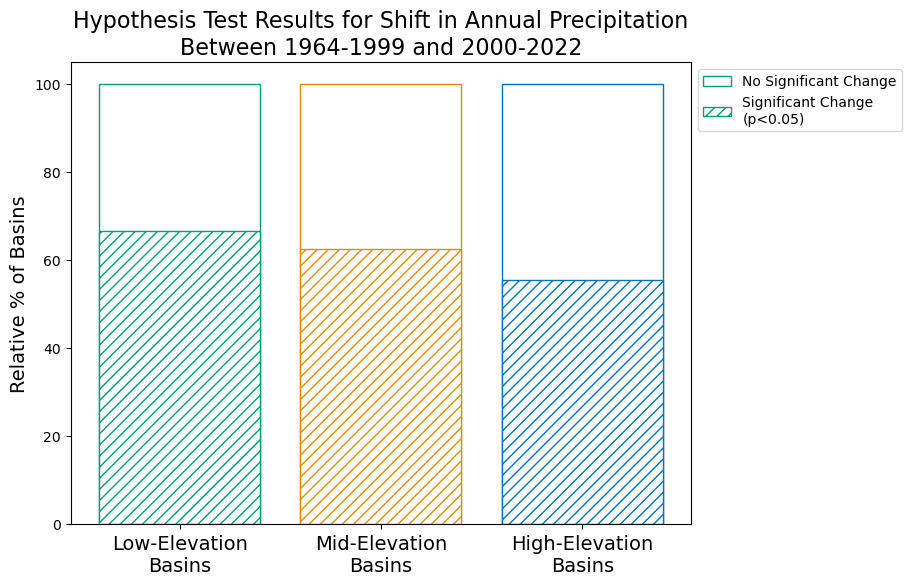

In [41]:

# create a dataframe with the results
low_rejected = len(low_annualp_ttest_results[(low_annualp_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (low_annualp_ttest_results['mannwhitney p']<0.05)])
mid_rejected = len(mid_annualp_ttest_results[(mid_annualp_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (mid_annualp_ttest_results['mannwhitney p']<0.05)])
high_rejected = len(high_annualp_ttest_results[(high_annualp_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (high_annualp_ttest_results['mannwhitney p']<0.05)])
# create a stacked bar chart with low, mid, and high elevation sites
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(x=['Low-Elevation\nBasins','Mid-Elevation\nBasins','High-Elevation\nBasins'], 
       height=[100, 100, 100], 
       ec=sns.color_palette("colorblind", 3)[::-1], 
       color=['white','white','white'])
ax.bar(x=['Low-Elevation\nBasins','Mid-Elevation\nBasins','High-Elevation\nBasins'], 
       height=[100*(low_rejected/9), 100*(mid_rejected/8), 100*(high_rejected/9)], 
       ec=sns.color_palette("colorblind", 3)[::-1], 
       color=['white','white','white'], 
       hatch='///')
# add a legend with the hatch pattern
ax.legend(['No Significant Change','Significant Change\n(p<0.05)'], loc='upper left', bbox_to_anchor=(1,1))
# add y-label for number of basins
ax.set_ylabel('Relative % of Basins', fontsize=14)
# add title
ax.set_title(f'Hypothesis Test Results for Shift in Annual Precipitation\nBetween {test_start_year}-1999 and 2000-2022', fontsize=16)
# increase the font-size of the x-aixs tick labels
ax.tick_params(axis='x', labelsize=14)

(0.0, 13.0)

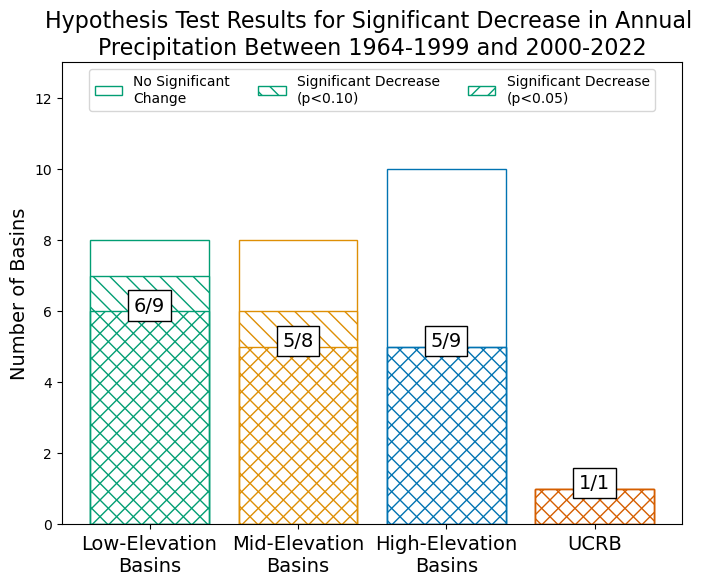

In [42]:

# create a dataframe with the results
low_rejected = len(low_annualp_ttest_results[(low_annualp_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (low_annualp_ttest_results['mannwhitney p']<0.05)])
mid_rejected = len(mid_annualp_ttest_results[(mid_annualp_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (mid_annualp_ttest_results['mannwhitney p']<0.05)])
high_rejected = len(high_annualp_ttest_results[(high_annualp_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (high_annualp_ttest_results['mannwhitney p']<0.05)])
ucrb_rejected = len(ucrb_annual_ppt_ttest_results[(ucrb_annual_ppt_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (ucrb_annual_ppt_ttest_results['mannwhitney p']<0.05)])
# calculate the same values but with 0.10 as the threshold
low_rejected_10 = len(low_annualp_ttest_results[(low_annualp_ttest_results['t-test p']<=0.10) |
                                               (low_annualp_ttest_results['mannwhitney p']<=0.10)])                                         
mid_rejected_10 = len(mid_annualp_ttest_results[(mid_annualp_ttest_results['t-test p']<=0.10) |
                                                   (mid_annualp_ttest_results['mannwhitney p']<=0.10)])    
high_rejected_10 = len(high_annualp_ttest_results[(high_annualp_ttest_results['t-test p']<=0.10) |
                                                         (high_annualp_ttest_results['mannwhitney p']<=0.10)])
# create a stacked bar chart with low, mid, and high elevation sites
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(x=['Low-Elevation\nBasins','Mid-Elevation\nBasins','High-Elevation\nBasins', 'UCRB'], 
       height=[8, 8, 10, 1], 
       ec=[(0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
           (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),  
           (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),  
           (0.8352941176470589, 0.3686274509803922, 0.0)], 
       color=['white','white','white', 'white'])
ax.bar(x=['Low-Elevation\nBasins','Mid-Elevation\nBasins','High-Elevation\nBasins','UCRB'],
       height=[(low_rejected_10), (mid_rejected_10), (high_rejected_10),1],
       ec=[(0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
           (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),  
           (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
           (0.8352941176470589, 0.3686274509803922, 0.0)],
       color=['white','white','white','white'],
       hatch='\\\\')

ax.bar(x=['Low-Elevation\nBasins','Mid-Elevation\nBasins','High-Elevation\nBasins','UCRB'], 
       height=[(low_rejected), (mid_rejected), (high_rejected), (ucrb_rejected)], 
       ec=[(0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
           (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),  
           (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),  
           (0.8352941176470589, 0.3686274509803922, 0.0)], 
       color=['none','none','none', 'none'], 
       hatch='//')
# add a legend with the hatch pattern to be below the plot
ax.legend(['No Significant\nChange', 'Significant Decrease\n(p<0.10)','Significant Decrease\n(p<0.05)'], ncols=3, loc='upper center', fontsize=10)
# add y-label for number of basins
ax.set_ylabel('Number of Basins', fontsize=14)
# add title
ax.set_title(f'Hypothesis Test Results for Significant Decrease in Annual \nPrecipitation Between {test_start_year}-1999 and 2000-2022', fontsize=16)
# increase the font-size of the x-aixs tick labels
ax.tick_params(axis='x', labelsize=14)
# add text to the bars with the number of rejected values in each category over the number of basins in each category
ax.text(x=0, y=low_rejected, s=f'{low_rejected}/9', fontsize=14, ha='center', bbox=dict(facecolor='white', alpha=1.0, ec='k'))
ax.text(x=1, y=mid_rejected, s=f'{mid_rejected}/8', fontsize=14, ha='center', bbox=dict(facecolor='white', alpha=1.0, ec='k'))
ax.text(x=2, y=high_rejected, s=f'{high_rejected}/9', fontsize=14, ha='center', bbox=dict(facecolor='white', alpha=1.0, ec='k'))
ax.text(x=3, y=ucrb_rejected, s=f'{ucrb_rejected}/1', fontsize=14, ha='center', bbox=dict(facecolor='white', alpha=1.0, ec='k'))
ax.set_ylim(0,13)

In [46]:
combined = pd.concat([low_annualp_ttest_results,mid_annualp_ttest_results,high_annualp_ttest_results],axis=0)
combined = combined.loc[order]#[['t-test Result','mannwhitney Result','percent change','value difference']]
# # divide percent change by 100
# combined['percent change'] = combined['percent change']/100
# combined.to_csv('../data/annual_ppt_ttest_results.csv')

# <a id='toc5_'></a>[Change in the distribution of seasonal precipitation in pre- and post-2000 periods](#toc0_)

## <a id='toc5_1_'></a>[High Elevation Basins](#toc0_)

### <a id='toc5_1_1_'></a>[Change in Fall](#toc0_)

In [47]:
high_elevation_annual_q

<xarray.Dataset>
Dimensions:             (water_year: 59, site_no: 9, year: 59)
Coordinates:
  * site_no             (site_no) <U8 '09026500' '09035700' ... '09352900'
  * water_year          (water_year) int64 1964 1965 1966 ... 2020 2021 2022
    spatial_ref         int64 0
    dim_1               <U9 'dayofyear'
  * year                (year) int64 1964 1965 1966 1967 ... 2019 2020 2021 2022
Data variables:
    wy_q_mm             (water_year, site_no) float64 116.3 nan ... 373.1 510.8
    wy_ppt              (site_no, water_year) float32 497.7 821.5 ... 951.8
    winter_ppt          (site_no, water_year) float32 114.0 205.6 ... 339.0
    spring_ppt          (site_no, water_year) float32 203.3 284.1 ... 224.3
    summer_ppt          (site_no, water_year) float32 98.73 200.3 ... 204.9
    fall_ppt            (site_no, water_year) float32 91.3 154.2 ... 155.9 74.62
    mean_elevation      (site_no) float64 3.275e+03 3.373e+03 ... 3.447e+03
    elevation_range     (site_no) float64 1.136e+03 1.327e+03 ... 1.74e+03
    elevation_category  (site_no) object 'high' 'high' 'high' ... 'high' 'high'
    AREA                (site_no) float64 8.535e+07 9.151e+07 ... 1.882e+08
    flow_com            (year, site_no) float64 181.0 nan nan ... 146.0 136.0

In [48]:
high_fallp_ttest_results = pd.DataFrame(index=high_elevation_annual_q.site_no.values, columns=['Shapiro-Wilke p',
                                                                                    'Shapiro-Wilke Result',
                                                                                    't-test p',
                                                                                    't-test Result',
                                                                                    'mannwhitney p',
                                                                                    'mannwhitney Result',
                                                                                    'percent change',
                                                                                    'value difference'])
for site in high_elevation_annual_q.site_no.values:
    single_site_pre = high_elevation_annual_q.sel(site_no=site,water_year=slice(1964,1999))['fall_ppt'].values
    single_site_post = high_elevation_annual_q.sel(site_no=site,water_year=slice(2000,2022))['fall_ppt'].values
    # Example of the Shapiro-Wilk Normality Test
    stat, p = stats.shapiro(single_site_pre)
    high_fallp_ttest_results.loc[site,'Shapiro-Wilke p'] = p
    if p > conf:
        high_fallp_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably Gaussian'
        
        z_alpha = stats.norm.ppf(conf)
        # print("z_alpha = {}".format(z_alpha)) 

        s_pooled = np.sqrt((single_site_pre.std(ddof=1)**2)/len(single_site_pre) +
                        (single_site_post.std(ddof=1)**2)/len(single_site_post))
        # print('Pooled standard deviation is {} mm'.format(str(s_pooled)))

        # null hypothesis: no change in sample means
        delta = 0*single_site_pre.mean()
        # compute test statistic
        z_test = ((single_site_post.mean()-single_site_pre.mean())-
                delta)/s_pooled
        # print("z-score = {}".format(np.round(z_test,2))) 
        # compute p value
        pvalue = stats.norm.cdf(z_test)
        high_fallp_ttest_results.loc[site,'t-test p'] = np.round(pvalue,3)
        if pvalue < conf:
            high_fallp_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Rejected'
        else: 
            high_fallp_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Accepted'
    else:
        high_fallp_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably not Gaussian, consider a non-parametric test'
        stat, p_value = stats.mannwhitneyu(single_site_post,single_site_pre, alternative='less')
        high_fallp_ttest_results.loc[site,'mannwhitney p'] = np.round(p_value,3)
        if p_value < conf:
            high_fallp_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Rejected'
        else: 
            high_fallp_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Accepted'
    high_fallp_ttest_results.loc[site,'percent change'] = np.round((single_site_post.mean()-single_site_pre.mean())/single_site_pre.mean()*100,0)
    high_fallp_ttest_results.loc[site,'value difference'] = np.round(single_site_post.mean()-single_site_pre.mean(),0)

In [49]:
high_fallp_ttest_results

Shapiro-Wilke p Shapiro-Wilke Result t-test p  \
09026500        0.200397    Probably Gaussian    0.357   
09035700        0.476445    Probably Gaussian    0.331   
09035900        0.628564    Probably Gaussian    0.391   
09036000        0.396885    Probably Gaussian    0.377   
09109000        0.074404    Probably Gaussian    0.086   
09110000         0.07308    Probably Gaussian    0.098   
09124500         0.11514    Probably Gaussian    0.099   
09289500        0.782742    Probably Gaussian    0.315   
09352900        0.269542    Probably Gaussian     0.07   

                     t-test Result mannwhitney p mannwhitney Result  \
09026500  Null Hypothesis Accepted           NaN                NaN   
09035700  Null Hypothesis Accepted           NaN                NaN   
09035900  Null Hypothesis Accepted           NaN                NaN   
09036000  Null Hypothesis Accepted           NaN                NaN   
09109000  Null Hypothesis Accepted           NaN                NaN   
09110000  Null Hypothesis Accepted           NaN                NaN   
09124500  Null Hypothesis Accepted           NaN                NaN   
09289500  Null Hypothesis Accepted           NaN                NaN   
09352900  Null Hypothesis Accepted           NaN                NaN   

         percent change value difference  
09026500           -3.0             -4.0  
09035700           -3.0             -5.0  
09035900           -2.0             -3.0  
09036000           -2.0             -4.0  
09109000          -11.0            -18.0  
09110000          -10.0            -17.0  
09124500          -13.0            -25.0  
09289500           -4.0             -9.0  
09352900          -15.0            -42.0

### <a id='toc5_1_2_'></a>[Change in Winter](#toc0_)

In [50]:
high_winterp_ttest_results = pd.DataFrame(index=high_elevation_annual_q.site_no.values, columns=['Shapiro-Wilke p',
                                                                                    'Shapiro-Wilke Result',
                                                                                    't-test p',
                                                                                    't-test Result',
                                                                                    'mannwhitney p',
                                                                                    'mannwhitney Result',
                                                                                    'percent change',
                                                                                    'value difference'])
for site in high_elevation_annual_q.site_no.values:
    single_site_pre = high_elevation_annual_q.sel(site_no=site,water_year=slice(1964,1999))['winter_ppt'].values
    single_site_post = high_elevation_annual_q.sel(site_no=site,water_year=slice(2000,2022))['winter_ppt'].values
    # Example of the Shapiro-Wilk Normality Test
    stat, p = stats.shapiro(single_site_pre)
    high_winterp_ttest_results.loc[site,'Shapiro-Wilke p'] = p
    if p > conf:
        high_winterp_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably Gaussian'
        
        z_alpha = stats.norm.ppf(conf)
        # print("z_alpha = {}".format(z_alpha)) 

        s_pooled = np.sqrt((single_site_pre.std(ddof=1)**2)/len(single_site_pre) +
                        (single_site_post.std(ddof=1)**2)/len(single_site_post))
        # print('Pooled standard deviation is {} mm'.format(str(s_pooled)))

        # null hypothesis: no change in sample means
        delta = 0*single_site_pre.mean()
        # compute test statistic
        z_test = ((single_site_post.mean()-single_site_pre.mean())-
                delta)/s_pooled
        # print("z-score = {}".format(np.round(z_test,2))) 
        # compute p value
        pvalue = stats.norm.cdf(z_test)
        high_winterp_ttest_results.loc[site,'t-test p'] = np.round(pvalue,3)
        if pvalue < conf:
            high_winterp_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Rejected'
        else: 
            high_winterp_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Accepted'
    else:
        high_winterp_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably not Gaussian, consider a non-parametric test'
        stat, p_value = stats.mannwhitneyu(single_site_post,single_site_pre, alternative='less')
        high_winterp_ttest_results.loc[site,'mannwhitney p'] = np.round(p_value,3)
        if p_value < conf:
            high_winterp_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Rejected'
        else: 
            high_winterp_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Accepted'
    high_winterp_ttest_results.loc[site,'percent change'] = np.round((single_site_post.mean()-single_site_pre.mean())/single_site_pre.mean()*100,0)
    high_winterp_ttest_results.loc[site,'value difference'] = np.round(single_site_post.mean()-single_site_pre.mean(),0)

In [51]:
high_winterp_ttest_results

Shapiro-Wilke p Shapiro-Wilke Result t-test p  \
09026500        0.412046    Probably Gaussian    0.886   
09035700        0.493482    Probably Gaussian    0.845   
09035900        0.526027    Probably Gaussian    0.849   
09036000        0.447177    Probably Gaussian    0.853   
09109000        0.639454    Probably Gaussian    0.332   
09110000        0.564795    Probably Gaussian    0.391   
09124500        0.818217    Probably Gaussian    0.584   
09289500        0.776523    Probably Gaussian    0.289   
09352900        0.379529    Probably Gaussian    0.405   

                     t-test Result mannwhitney p mannwhitney Result  \
09026500  Null Hypothesis Accepted           NaN                NaN   
09035700  Null Hypothesis Accepted           NaN                NaN   
09035900  Null Hypothesis Accepted           NaN                NaN   
09036000  Null Hypothesis Accepted           NaN                NaN   
09109000  Null Hypothesis Accepted           NaN                NaN   
09110000  Null Hypothesis Accepted           NaN                NaN   
09124500  Null Hypothesis Accepted           NaN                NaN   
09289500  Null Hypothesis Accepted           NaN                NaN   
09352900  Null Hypothesis Accepted           NaN                NaN   

         percent change value difference  
09026500           10.0             15.0  
09035700            8.0             14.0  
09035900            9.0             14.0  
09036000            8.0             14.0  
09109000           -4.0             -9.0  
09110000           -3.0             -6.0  
09124500            2.0              4.0  
09289500           -5.0            -13.0  
09352900           -3.0             -8.0

### <a id='toc5_1_3_'></a>[Change in Spring](#toc0_)

In [52]:
high_springp_ttest_results = pd.DataFrame(index=high_elevation_annual_q.site_no.values, columns=['Shapiro-Wilke p',
                                                                                    'Shapiro-Wilke Result',
                                                                                    't-test p',
                                                                                    't-test Result',
                                                                                    'mannwhitney p',
                                                                                    'mannwhitney Result',
                                                                                    'percent change',
                                                                                    'value difference'])
for site in high_elevation_annual_q.site_no.values:
    single_site_pre = high_elevation_annual_q.sel(site_no=site,water_year=slice(1964,1999))['spring_ppt'].values
    single_site_post = high_elevation_annual_q.sel(site_no=site,water_year=slice(2000,2022))['spring_ppt'].values
    # Example of the Shapiro-Wilk Normality Test
    stat, p = stats.shapiro(single_site_pre)
    high_springp_ttest_results.loc[site,'Shapiro-Wilke p'] = p
    if p > conf:
        high_springp_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably Gaussian'
        
        z_alpha = stats.norm.ppf(conf)
        # print("z_alpha = {}".format(z_alpha)) 

        s_pooled = np.sqrt((single_site_pre.std(ddof=1)**2)/len(single_site_pre) +
                        (single_site_post.std(ddof=1)**2)/len(single_site_post))
        # print('Pooled standard deviation is {} mm'.format(str(s_pooled)))

        # null hypothesis: no change in sample means
        delta = 0*single_site_pre.mean()
        # compute test statistic
        z_test = ((single_site_post.mean()-single_site_pre.mean())-
                delta)/s_pooled
        # print("z-score = {}".format(np.round(z_test,2))) 
        # compute p value
        pvalue = stats.norm.cdf(z_test)
        high_springp_ttest_results.loc[site,'t-test p'] = np.round(pvalue,3)
        if pvalue < conf:
            high_springp_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Rejected'
        else: 
            high_springp_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Accepted'
    else:
        high_springp_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably not Gaussian, consider a non-parametric test'
        stat, p_value = stats.mannwhitneyu(single_site_post,single_site_pre, alternative='less')
        high_springp_ttest_results.loc[site,'mannwhitney p'] = np.round(p_value,3)
        if p_value < conf:
            high_springp_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Rejected'
        else: 
            high_springp_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Accepted'
    high_springp_ttest_results.loc[site,'percent change'] = np.round((single_site_post.mean()-single_site_pre.mean())/single_site_pre.mean()*100,0)
    high_springp_ttest_results.loc[site,'value difference'] = np.round(single_site_post.mean()-single_site_pre.mean(),0)

In [53]:
high_springp_ttest_results

Shapiro-Wilke p                               Shapiro-Wilke Result  \
09026500        0.182149                                  Probably Gaussian   
09035700        0.181738                                  Probably Gaussian   
09035900        0.177036                                  Probably Gaussian   
09036000        0.216323                                  Probably Gaussian   
09109000        0.002691  Probably not Gaussian, consider a non-parametr...   
09110000        0.002672  Probably not Gaussian, consider a non-parametr...   
09124500        0.963163                                  Probably Gaussian   
09289500        0.093803                                  Probably Gaussian   
09352900        0.943869                                  Probably Gaussian   

         t-test p             t-test Result mannwhitney p  \
09026500    0.181  Null Hypothesis Accepted           NaN   
09035700    0.161  Null Hypothesis Accepted           NaN   
09035900    0.223  Null Hypothesis Accepted           NaN   
09036000    0.196  Null Hypothesis Accepted           NaN   
09109000      NaN                       NaN         0.007   
09110000      NaN                       NaN         0.008   
09124500    0.004  Null Hypothesis Rejected           NaN   
09289500    0.002  Null Hypothesis Rejected           NaN   
09352900      0.0  Null Hypothesis Rejected           NaN   

                mannwhitney Result percent change value difference  
09026500                       NaN           -6.0            -15.0  
09035700                       NaN           -6.0            -17.0  
09035900                       NaN           -5.0            -13.0  
09036000                       NaN           -5.0            -15.0  
09109000  Null Hypothesis Rejected          -18.0            -46.0  
09110000  Null Hypothesis Rejected          -17.0            -41.0  
09124500                       NaN          -19.0            -42.0  
09289500                       NaN          -19.0            -61.0  
09352900                       NaN          -24.0            -75.0

### <a id='toc5_1_4_'></a>[Change in Summer](#toc0_)

In [54]:
high_summerp_ttest_results = pd.DataFrame(index=high_elevation_annual_q.site_no.values, columns=['Shapiro-Wilke p',
                                                                                    'Shapiro-Wilke Result',
                                                                                    't-test p',
                                                                                    't-test Result',
                                                                                    'mannwhitney p',
                                                                                    'mannwhitney Result',
                                                                                    'percent change',
                                                                                    'value difference'])
for site in high_elevation_annual_q.site_no.values:
    single_site_pre = high_elevation_annual_q.sel(site_no=site,water_year=slice(1964,1999))['summer_ppt'].values
    single_site_post = high_elevation_annual_q.sel(site_no=site,water_year=slice(2000,2022))['summer_ppt'].values
    # Example of the Shapiro-Wilk Normality Test
    stat, p = stats.shapiro(single_site_pre)
    high_summerp_ttest_results.loc[site,'Shapiro-Wilke p'] = p
    if p > conf:
        high_summerp_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably Gaussian'
        
        z_alpha = stats.norm.ppf(conf)
        # print("z_alpha = {}".format(z_alpha)) 

        s_pooled = np.sqrt((single_site_pre.std(ddof=1)**2)/len(single_site_pre) +
                        (single_site_post.std(ddof=1)**2)/len(single_site_post))
        # print('Pooled standard deviation is {} mm'.format(str(s_pooled)))

        # null hypothesis: no change in sample means
        delta = 0*single_site_pre.mean()
        # compute test statistic
        z_test = ((single_site_post.mean()-single_site_pre.mean())-
                delta)/s_pooled
        # print("z-score = {}".format(np.round(z_test,2))) 
        # compute p value
        pvalue = stats.norm.cdf(z_test)
        high_summerp_ttest_results.loc[site,'t-test p'] = np.round(pvalue,3)
        if pvalue < conf:
            high_summerp_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Rejected'
        else: 
            high_summerp_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Accepted'
    else:
        high_summerp_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably not Gaussian, consider a non-parametric test'
        stat, p_value = stats.mannwhitneyu(single_site_post,single_site_pre, alternative='less')
        high_summerp_ttest_results.loc[site,'mannwhitney p'] = np.round(p_value,3)
        if p_value < conf:
            high_summerp_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Rejected'
        else: 
            high_summerp_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Accepted'
    high_summerp_ttest_results.loc[site,'percent change'] = np.round((single_site_post.mean()-single_site_pre.mean())/single_site_pre.mean()*100,0)
    high_summerp_ttest_results.loc[site,'value difference'] = np.round(single_site_post.mean()-single_site_pre.mean(),0)

In [55]:
high_summerp_ttest_results

Shapiro-Wilke p                               Shapiro-Wilke Result  \
09026500        0.012058  Probably not Gaussian, consider a non-parametr...   
09035700        0.013209  Probably not Gaussian, consider a non-parametr...   
09035900        0.007624  Probably not Gaussian, consider a non-parametr...   
09036000        0.010866  Probably not Gaussian, consider a non-parametr...   
09109000        0.715787                                  Probably Gaussian   
09110000        0.687965                                  Probably Gaussian   
09124500        0.365117                                  Probably Gaussian   
09289500        0.675739                                  Probably Gaussian   
09352900        0.007846  Probably not Gaussian, consider a non-parametr...   

         t-test p             t-test Result mannwhitney p  \
09026500      NaN                       NaN         0.822   
09035700      NaN                       NaN         0.826   
09035900      NaN                       NaN          0.83   
09036000      NaN                       NaN         0.802   
09109000    0.471  Null Hypothesis Accepted           NaN   
09110000    0.507  Null Hypothesis Accepted           NaN   
09124500    0.139  Null Hypothesis Accepted           NaN   
09289500    0.161  Null Hypothesis Accepted           NaN   
09352900      NaN                       NaN         0.016   

                mannwhitney Result percent change value difference  
09026500  Null Hypothesis Accepted            2.0              2.0  
09035700  Null Hypothesis Accepted            3.0              3.0  
09035900  Null Hypothesis Accepted            3.0              3.0  
09036000  Null Hypothesis Accepted            2.0              2.0  
09109000                       NaN           -1.0             -1.0  
09110000                       NaN            0.0              0.0  
09124500                       NaN           -8.0            -11.0  
09289500                       NaN           -9.0            -12.0  
09352900  Null Hypothesis Rejected          -20.0            -38.0

## <a id='toc5_2_'></a>[Mid Elevation Basins](#toc0_)

### <a id='toc5_2_1_'></a>[Change in Fall](#toc0_)

In [56]:
mid_fallp_ttest_results = pd.DataFrame(index=mid_elevation_annual_q.site_no.values, columns=['Shapiro-Wilke p',
                                                                                    'Shapiro-Wilke Result',
                                                                                    't-test p',
                                                                                    't-test Result',
                                                                                    'mannwhitney p',
                                                                                    'mannwhitney Result',
                                                                                    'percent change',
                                                                                    'value difference'])
for site in mid_elevation_annual_q.site_no.values:
    single_site_pre = mid_elevation_annual_q.sel(site_no=site,water_year=slice(1964,1999))['fall_ppt'].values
    single_site_post = mid_elevation_annual_q.sel(site_no=site,water_year=slice(2000,2022))['fall_ppt'].values
    # Example of the Shapiro-Wilk Normality Test
    stat, p = stats.shapiro(single_site_pre)
    mid_fallp_ttest_results.loc[site,'Shapiro-Wilke p'] = p
    if p > conf:
        mid_fallp_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably Gaussian'
        
        z_alpha = stats.norm.ppf(conf)
        # print("z_alpha = {}".format(z_alpha)) 

        s_pooled = np.sqrt((single_site_pre.std(ddof=1)**2)/len(single_site_pre) +
                        (single_site_post.std(ddof=1)**2)/len(single_site_post))
        # print('Pooled standard deviation is {} mm'.format(str(s_pooled)))

        # null hypothesis: no change in sample means
        delta = 0*single_site_pre.mean()
        # compute test statistic
        z_test = ((single_site_post.mean()-single_site_pre.mean())-
                delta)/s_pooled
        # print("z-score = {}".format(np.round(z_test,2))) 
        # compute p value
        pvalue = stats.norm.cdf(z_test)
        mid_fallp_ttest_results.loc[site,'t-test p'] = np.round(pvalue,3)
        if pvalue < conf:
            mid_fallp_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Rejected'
        else: 
            mid_fallp_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Accepted'
    else:
        mid_fallp_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably not Gaussian, consider a non-parametric test'
        stat, p_value = stats.mannwhitneyu(single_site_post,single_site_pre, alternative='less')
        mid_fallp_ttest_results.loc[site,'mannwhitney p'] = np.round(p_value,3)
        if p_value < conf:
            mid_fallp_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Rejected'
        else: 
            mid_fallp_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Accepted'
    mid_fallp_ttest_results.loc[site,'percent change'] = np.round((single_site_post.mean()-single_site_pre.mean())/single_site_pre.mean()*100,0)
    mid_fallp_ttest_results.loc[site,'value difference'] = np.round(single_site_post.mean()-single_site_pre.mean(),0)

In [57]:
mid_fallp_ttest_results

Shapiro-Wilke p Shapiro-Wilke Result t-test p  \
09010500        0.884595    Probably Gaussian     0.16   
09032000        0.243322    Probably Gaussian    0.151   
09081600        0.092229    Probably Gaussian    0.052   
09112500        0.123306    Probably Gaussian    0.024   
09165000        0.231674    Probably Gaussian    0.071   
09196500        0.403781    Probably Gaussian    0.099   
09361500        0.251229    Probably Gaussian    0.074   
09365500        0.250861    Probably Gaussian    0.052   

                     t-test Result mannwhitney p mannwhitney Result  \
09010500  Null Hypothesis Accepted           NaN                NaN   
09032000  Null Hypothesis Accepted           NaN                NaN   
09081600  Null Hypothesis Accepted           NaN                NaN   
09112500  Null Hypothesis Rejected           NaN                NaN   
09165000  Null Hypothesis Accepted           NaN                NaN   
09196500  Null Hypothesis Accepted           NaN                NaN   
09361500  Null Hypothesis Accepted           NaN                NaN   
09365500  Null Hypothesis Accepted           NaN                NaN   

         percent change value difference  
09010500           -7.0            -15.0  
09032000           -8.0            -14.0  
09081600          -15.0            -40.0  
09112500          -17.0            -39.0  
09165000          -14.0            -34.0  
09196500           -9.0            -25.0  
09361500          -14.0            -35.0  
09365500          -16.0            -41.0

### <a id='toc5_2_2_'></a>[Change in Winter](#toc0_)

In [58]:
mid_winterp_ttest_results = pd.DataFrame(index=mid_elevation_annual_q.site_no.values, columns=['Shapiro-Wilke p',
                                                                                    'Shapiro-Wilke Result',
                                                                                    't-test p',
                                                                                    't-test Result',
                                                                                    'mannwhitney p',
                                                                                    'mannwhitney Result',
                                                                                    'percent change',
                                                                                    'value difference'])
for site in mid_elevation_annual_q.site_no.values:
    single_site_pre = mid_elevation_annual_q.sel(site_no=site,water_year=slice(1964,1999))['winter_ppt'].values
    single_site_post = mid_elevation_annual_q.sel(site_no=site,water_year=slice(2000,2022))['winter_ppt'].values
    # Example of the Shapiro-Wilk Normality Test
    stat, p = stats.shapiro(single_site_pre)
    mid_winterp_ttest_results.loc[site,'Shapiro-Wilke p'] = p
    if p > conf:
        mid_winterp_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably Gaussian'
        
        z_alpha = stats.norm.ppf(conf)
        # print("z_alpha = {}".format(z_alpha)) 

        s_pooled = np.sqrt((single_site_pre.std(ddof=1)**2)/len(single_site_pre) +
                        (single_site_post.std(ddof=1)**2)/len(single_site_post))
        # print('Pooled standard deviation is {} mm'.format(str(s_pooled)))

        # null hypothesis: no change in sample means
        delta = 0*single_site_pre.mean()
        # compute test statistic
        z_test = ((single_site_post.mean()-single_site_pre.mean())-
                delta)/s_pooled
        # print("z-score = {}".format(np.round(z_test,2))) 
        # compute p value
        pvalue = stats.norm.cdf(z_test)
        mid_winterp_ttest_results.loc[site,'t-test p'] = np.round(pvalue,3)
        if pvalue < conf:
            mid_winterp_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Rejected'
        else: 
            mid_winterp_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Accepted'
    else:
        mid_winterp_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably not Gaussian, consider a non-parametric test'
        stat, p_value = stats.mannwhitneyu(single_site_post,single_site_pre, alternative='less')
        mid_winterp_ttest_results.loc[site,'mannwhitney p'] = np.round(p_value,3)
        if p_value < conf:
            mid_winterp_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Rejected'
        else: 
            mid_winterp_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Accepted'
    mid_winterp_ttest_results.loc[site,'percent change'] = np.round((single_site_post.mean()-single_site_pre.mean())/single_site_pre.mean()*100,0)
    mid_winterp_ttest_results.loc[site,'value difference'] = np.round(single_site_post.mean()-single_site_pre.mean(),0)

In [59]:
mid_winterp_ttest_results

Shapiro-Wilke p Shapiro-Wilke Result t-test p  \
09010500        0.311763    Probably Gaussian    0.463   
09032000         0.25485    Probably Gaussian    0.628   
09081600        0.809599    Probably Gaussian    0.136   
09112500        0.687053    Probably Gaussian    0.128   
09165000        0.554934    Probably Gaussian    0.563   
09196500        0.556381    Probably Gaussian    0.327   
09361500        0.413239    Probably Gaussian    0.458   
09365500        0.193157    Probably Gaussian    0.208   

                     t-test Result mannwhitney p mannwhitney Result  \
09010500  Null Hypothesis Accepted           NaN                NaN   
09032000  Null Hypothesis Accepted           NaN                NaN   
09081600  Null Hypothesis Accepted           NaN                NaN   
09112500  Null Hypothesis Accepted           NaN                NaN   
09165000  Null Hypothesis Accepted           NaN                NaN   
09196500  Null Hypothesis Accepted           NaN                NaN   
09361500  Null Hypothesis Accepted           NaN                NaN   
09365500  Null Hypothesis Accepted           NaN                NaN   

         percent change value difference  
09010500           -1.0             -2.0  
09032000            2.0              5.0  
09081600          -10.0            -34.0  
09112500          -11.0            -34.0  
09165000            2.0              4.0  
09196500           -4.0            -12.0  
09361500           -1.0             -3.0  
09365500           -9.0            -27.0

### <a id='toc5_2_3_'></a>[Change in Spring](#toc0_)

In [60]:
mid_springp_ttest_results = pd.DataFrame(index=mid_elevation_annual_q.site_no.values, columns=['Shapiro-Wilke p',
                                                                                    'Shapiro-Wilke Result',
                                                                                    't-test p',
                                                                                    't-test Result',
                                                                                    'mannwhitney p',
                                                                                    'mannwhitney Result',
                                                                                    'percent change',
                                                                                    'value difference'])
for site in mid_elevation_annual_q.site_no.values:
    single_site_pre = mid_elevation_annual_q.sel(site_no=site,water_year=slice(1964,1999))['spring_ppt'].values
    single_site_post = mid_elevation_annual_q.sel(site_no=site,water_year=slice(2000,2022))['spring_ppt'].values
    # Example of the Shapiro-Wilk Normality Test
    stat, p = stats.shapiro(single_site_pre)
    mid_springp_ttest_results.loc[site,'Shapiro-Wilke p'] = p
    if p > conf:
        mid_springp_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably Gaussian'
        
        z_alpha = stats.norm.ppf(conf)
        # print("z_alpha = {}".format(z_alpha)) 

        s_pooled = np.sqrt((single_site_pre.std(ddof=1)**2)/len(single_site_pre) +
                        (single_site_post.std(ddof=1)**2)/len(single_site_post))
        # print('Pooled standard deviation is {} mm'.format(str(s_pooled)))

        # null hypothesis: no change in sample means
        delta = 0*single_site_pre.mean()
        # compute test statistic
        z_test = ((single_site_post.mean()-single_site_pre.mean())-
                delta)/s_pooled
        # print("z-score = {}".format(np.round(z_test,2))) 
        # compute p value
        pvalue = stats.norm.cdf(z_test)
        mid_springp_ttest_results.loc[site,'t-test p'] = np.round(pvalue,3)
        if pvalue < conf:
            mid_springp_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Rejected'
        else: 
            mid_springp_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Accepted'
    else:
        mid_springp_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably not Gaussian, consider a non-parametric test'
        stat, p_value = stats.mannwhitneyu(single_site_post,single_site_pre, alternative='less')
        mid_springp_ttest_results.loc[site,'mannwhitney p'] = np.round(p_value,3)
        if p_value < conf:
            mid_springp_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Rejected'
        else: 
            mid_springp_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Accepted'
    mid_springp_ttest_results.loc[site,'percent change'] = np.round((single_site_post.mean()-single_site_pre.mean())/single_site_pre.mean()*100,0)
    mid_springp_ttest_results.loc[site,'value difference'] = np.round(single_site_post.mean()-single_site_pre.mean(),0)

In [61]:
mid_springp_ttest_results

Shapiro-Wilke p                               Shapiro-Wilke Result  \
09010500        0.079571                                  Probably Gaussian   
09032000        0.028963  Probably not Gaussian, consider a non-parametr...   
09081600        0.010886  Probably not Gaussian, consider a non-parametr...   
09112500        0.008786  Probably not Gaussian, consider a non-parametr...   
09165000        0.583505                                  Probably Gaussian   
09196500        0.312333                                  Probably Gaussian   
09361500        0.938813                                  Probably Gaussian   
09365500        0.714944                                  Probably Gaussian   

         t-test p             t-test Result mannwhitney p  \
09010500    0.209  Null Hypothesis Accepted           NaN   
09032000      NaN                       NaN         0.154   
09081600      NaN                       NaN          0.01   
09112500      NaN                       NaN         0.003   
09165000    0.001  Null Hypothesis Rejected           NaN   
09196500    0.016  Null Hypothesis Rejected           NaN   
09361500    0.001  Null Hypothesis Rejected           NaN   
09365500      0.0  Null Hypothesis Rejected           NaN   

                mannwhitney Result percent change value difference  
09010500                       NaN           -6.0            -18.0  
09032000  Null Hypothesis Accepted          -10.0            -31.0  
09081600  Null Hypothesis Rejected          -17.0            -59.0  
09112500  Null Hypothesis Rejected          -20.0            -63.0  
09165000                       NaN          -22.0            -70.0  
09196500                       NaN          -12.0            -54.0  
09361500                       NaN          -22.0            -61.0  
09365500                       NaN          -29.0            -84.0

### <a id='toc5_2_4_'></a>[Change in Summer](#toc0_)

In [62]:
mid_summerp_ttest_results = pd.DataFrame(index=mid_elevation_annual_q.site_no.values, columns=['Shapiro-Wilke p',
                                                                                    'Shapiro-Wilke Result',
                                                                                    't-test p',
                                                                                    't-test Result',
                                                                                    'mannwhitney p',
                                                                                    'mannwhitney Result',
                                                                                    'percent change',
                                                                                    'value difference'])
for site in mid_elevation_annual_q.site_no.values:
    single_site_pre = mid_elevation_annual_q.sel(site_no=site,water_year=slice(1964,1999))['summer_ppt'].values
    single_site_post = mid_elevation_annual_q.sel(site_no=site,water_year=slice(2000,2022))['summer_ppt'].values
    # Example of the Shapiro-Wilk Normality Test
    stat, p = stats.shapiro(single_site_pre)
    mid_summerp_ttest_results.loc[site,'Shapiro-Wilke p'] = p
    if p > conf:
        mid_summerp_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably Gaussian'
        
        z_alpha = stats.norm.ppf(conf)
        # print("z_alpha = {}".format(z_alpha)) 

        s_pooled = np.sqrt((single_site_pre.std(ddof=1)**2)/len(single_site_pre) +
                        (single_site_post.std(ddof=1)**2)/len(single_site_post))
        # print('Pooled standard deviation is {} mm'.format(str(s_pooled)))

        # null hypothesis: no change in sample means
        delta = 0*single_site_pre.mean()
        # compute test statistic
        z_test = ((single_site_post.mean()-single_site_pre.mean())-
                delta)/s_pooled
        # print("z-score = {}".format(np.round(z_test,2))) 
        # compute p value
        pvalue = stats.norm.cdf(z_test)
        mid_summerp_ttest_results.loc[site,'t-test p'] = np.round(pvalue,3)
        if pvalue < conf:
            mid_summerp_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Rejected'
        else: 
            mid_summerp_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Accepted'
    else:
        mid_summerp_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably not Gaussian, consider a non-parametric test'
        stat, p_value = stats.mannwhitneyu(single_site_post,single_site_pre, alternative='less')
        mid_summerp_ttest_results.loc[site,'mannwhitney p'] = np.round(p_value,3)
        if p_value < conf:
            mid_summerp_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Rejected'
        else: 
            mid_summerp_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Accepted'
    mid_summerp_ttest_results.loc[site,'percent change'] = np.round((single_site_post.mean()-single_site_pre.mean())/single_site_pre.mean()*100,0)
    mid_summerp_ttest_results.loc[site,'value difference'] = np.round(single_site_post.mean()-single_site_pre.mean(),0)

In [63]:
mid_summerp_ttest_results

Shapiro-Wilke p                               Shapiro-Wilke Result  \
09010500        0.033731  Probably not Gaussian, consider a non-parametr...   
09032000         0.02156  Probably not Gaussian, consider a non-parametr...   
09081600        0.438801                                  Probably Gaussian   
09112500        0.733453                                  Probably Gaussian   
09165000        0.992955                                  Probably Gaussian   
09196500        0.077446                                  Probably Gaussian   
09361500        0.126101                                  Probably Gaussian   
09365500        0.392088                                  Probably Gaussian   

         t-test p             t-test Result mannwhitney p  \
09010500      NaN                       NaN         0.497   
09032000      NaN                       NaN         0.725   
09081600    0.779  Null Hypothesis Accepted           NaN   
09112500    0.626  Null Hypothesis Accepted           NaN   
09165000     0.01  Null Hypothesis Rejected           NaN   
09196500    0.021  Null Hypothesis Rejected           NaN   
09361500    0.016  Null Hypothesis Rejected           NaN   
09365500    0.005  Null Hypothesis Rejected           NaN   

                mannwhitney Result percent change value difference  
09010500  Null Hypothesis Accepted           -3.0             -3.0  
09032000  Null Hypothesis Accepted            1.0              1.0  
09081600                       NaN            7.0              8.0  
09112500                       NaN            3.0              3.0  
09165000                       NaN          -16.0            -30.0  
09196500                       NaN          -21.0            -20.0  
09361500                       NaN          -16.0            -26.0  
09365500                       NaN          -18.0            -34.0

## <a id='toc5_3_'></a>[Low Elevation Basins](#toc0_)

### <a id='toc5_3_1_'></a>[Change in Fall](#toc0_)

In [64]:
low_fallp_ttest_results = pd.DataFrame(index=low_elevation_annual_q.site_no.values, columns=['Shapiro-Wilke p',
                                                                                    'Shapiro-Wilke Result',
                                                                                    't-test p',
                                                                                    't-test Result',
                                                                                    'mannwhitney p',
                                                                                    'mannwhitney Result',
                                                                                    'percent change',
                                                                                    'value difference'])
for site in low_elevation_annual_q.site_no.values:
    single_site_pre = low_elevation_annual_q.sel(site_no=site,water_year=slice(1964,1999))['fall_ppt'].values
    single_site_post = low_elevation_annual_q.sel(site_no=site,water_year=slice(2000,2022))['fall_ppt'].values
    # Example of the Shapiro-Wilk Normality Test
    stat, p = stats.shapiro(single_site_pre)
    low_fallp_ttest_results.loc[site,'Shapiro-Wilke p'] = p
    if p > conf:
        low_fallp_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably Gaussian'
        
        z_alpha = stats.norm.ppf(conf)
        # print("z_alpha = {}".format(z_alpha)) 

        s_pooled = np.sqrt((single_site_pre.std(ddof=1)**2)/len(single_site_pre) +
                        (single_site_post.std(ddof=1)**2)/len(single_site_post))
        # print('Pooled standard deviation is {} mm'.format(str(s_pooled)))

        # null hypothesis: no change in sample means
        delta = 0*single_site_pre.mean()
        # compute test statistic
        z_test = ((single_site_post.mean()-single_site_pre.mean())-
                delta)/s_pooled
        # print("z-score = {}".format(np.round(z_test,2))) 
        # compute p value
        pvalue = stats.norm.cdf(z_test)
        low_fallp_ttest_results.loc[site,'t-test p'] = np.round(pvalue,3)
        if pvalue < conf:
            low_fallp_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Rejected'
        else: 
            low_fallp_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Accepted'
    else:
        low_fallp_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably not Gaussian, consider a non-parametric test'
        stat, p_value = stats.mannwhitneyu(single_site_post,single_site_pre, alternative='less')
        low_fallp_ttest_results.loc[site,'mannwhitney p'] = np.round(p_value,3)
        if p_value < conf:
            low_fallp_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Rejected'
        else: 
            low_fallp_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Accepted'
    low_fallp_ttest_results.loc[site,'percent change'] = np.round((single_site_post.mean()-single_site_pre.mean())/single_site_pre.mean()*100,0)
    low_fallp_ttest_results.loc[site,'value difference'] = np.round(single_site_post.mean()-single_site_pre.mean(),0)

In [65]:
low_fallp_ttest_results

Shapiro-Wilke p Shapiro-Wilke Result t-test p  \
09059500        0.643268    Probably Gaussian    0.606   
09166500        0.260779    Probably Gaussian    0.075   
09188500        0.240966    Probably Gaussian    0.367   
09210500        0.660902    Probably Gaussian    0.276   
09223000        0.688004    Probably Gaussian    0.245   
09253000        0.276512    Probably Gaussian    0.217   
09255000        0.230992    Probably Gaussian    0.236   
09277500        0.469863    Probably Gaussian    0.273   
09310500        0.241262    Probably Gaussian    0.192   

                     t-test Result mannwhitney p mannwhitney Result  \
09059500  Null Hypothesis Accepted           NaN                NaN   
09166500  Null Hypothesis Accepted           NaN                NaN   
09188500  Null Hypothesis Accepted           NaN                NaN   
09210500  Null Hypothesis Accepted           NaN                NaN   
09223000  Null Hypothesis Accepted           NaN                NaN   
09253000  Null Hypothesis Accepted           NaN                NaN   
09255000  Null Hypothesis Accepted           NaN                NaN   
09277500  Null Hypothesis Accepted           NaN                NaN   
09310500  Null Hypothesis Accepted           NaN                NaN   

         percent change value difference  
09059500            2.0              3.0  
09166500          -14.0            -30.0  
09188500           -3.0             -4.0  
09210500           -5.0             -7.0  
09223000           -6.0             -9.0  
09253000           -6.0            -12.0  
09255000           -6.0            -10.0  
09277500           -5.0             -9.0  
09310500           -7.0            -12.0

In [66]:
combined = pd.concat([low_fallp_ttest_results,mid_fallp_ttest_results,high_fallp_ttest_results],axis=0)
combined = combined.loc[order][['t-test Result','mannwhitney Result','percent change','value difference']]
# divide percent change by 100
combined['percent change'] = combined['percent change']/100
combined.to_csv('../data/fall_ppt_ttest_results.csv')

### <a id='toc5_3_2_'></a>[Change in Winter](#toc0_)

In [67]:
low_winterp_ttest_results = pd.DataFrame(index=low_elevation_annual_q.site_no.values, columns=['Shapiro-Wilke p',
                                                                                    'Shapiro-Wilke Result',
                                                                                    't-test p',
                                                                                    't-test Result',
                                                                                    'mannwhitney p',
                                                                                    'mannwhitney Result',
                                                                                    'percent change',
                                                                                    'value difference'])
for site in low_elevation_annual_q.site_no.values:
    single_site_pre = low_elevation_annual_q.sel(site_no=site,water_year=slice(1964,1999))['winter_ppt'].values
    single_site_post = low_elevation_annual_q.sel(site_no=site,water_year=slice(2000,2022))['winter_ppt'].values
    # Example of the Shapiro-Wilk Normality Test
    stat, p = stats.shapiro(single_site_pre)
    low_winterp_ttest_results.loc[site,'Shapiro-Wilke p'] = p
    if p > conf:
        low_winterp_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably Gaussian'
        
        z_alpha = stats.norm.ppf(conf)
        # print("z_alpha = {}".format(z_alpha)) 

        s_pooled = np.sqrt((single_site_pre.std(ddof=1)**2)/len(single_site_pre) +
                        (single_site_post.std(ddof=1)**2)/len(single_site_post))
        # print('Pooled standard deviation is {} mm'.format(str(s_pooled)))

        # null hypothesis: no change in sample means
        delta = 0*single_site_pre.mean()
        # compute test statistic
        z_test = ((single_site_post.mean()-single_site_pre.mean())-
                delta)/s_pooled
        # print("z-score = {}".format(np.round(z_test,2))) 
        # compute p value
        pvalue = stats.norm.cdf(z_test)
        low_winterp_ttest_results.loc[site,'t-test p'] = np.round(pvalue,3)
        if pvalue < conf:
            low_winterp_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Rejected'
        else: 
            low_winterp_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Accepted'
    else:
        low_winterp_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably not Gaussian, consider a non-parametric test'
        stat, p_value = stats.mannwhitneyu(single_site_post,single_site_pre, alternative='less')
        low_winterp_ttest_results.loc[site,'mannwhitney p'] = np.round(p_value,3)
        if p_value < conf:
            low_winterp_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Rejected'
        else: 
            low_winterp_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Accepted'
    low_winterp_ttest_results.loc[site,'percent change'] = np.round((single_site_post.mean()-single_site_pre.mean())/single_site_pre.mean()*100,0)
    low_winterp_ttest_results.loc[site,'value difference'] = np.round(single_site_post.mean()-single_site_pre.mean(),0)

In [68]:
low_winterp_ttest_results

Shapiro-Wilke p Shapiro-Wilke Result t-test p  \
09059500        0.636078    Probably Gaussian    0.748   
09166500        0.271409    Probably Gaussian    0.554   
09188500        0.517206    Probably Gaussian    0.447   
09210500         0.82111    Probably Gaussian    0.219   
09223000        0.723884    Probably Gaussian    0.186   
09253000        0.453784    Probably Gaussian     0.16   
09255000        0.547924    Probably Gaussian    0.166   
09277500        0.488287    Probably Gaussian    0.234   
09310500        0.488124    Probably Gaussian    0.506   

                     t-test Result mannwhitney p mannwhitney Result  \
09059500  Null Hypothesis Accepted           NaN                NaN   
09166500  Null Hypothesis Accepted           NaN                NaN   
09188500  Null Hypothesis Accepted           NaN                NaN   
09210500  Null Hypothesis Accepted           NaN                NaN   
09223000  Null Hypothesis Accepted           NaN                NaN   
09253000  Null Hypothesis Accepted           NaN                NaN   
09255000  Null Hypothesis Accepted           NaN                NaN   
09277500  Null Hypothesis Accepted           NaN                NaN   
09310500  Null Hypothesis Accepted           NaN                NaN   

         percent change value difference  
09059500            5.0              9.0  
09166500            1.0              3.0  
09188500           -1.0             -2.0  
09210500           -7.0            -14.0  
09223000           -7.0            -19.0  
09253000           -8.0            -23.0  
09255000           -7.0            -20.0  
09277500           -7.0            -15.0  
09310500            0.0              0.0

In [69]:
combined = pd.concat([low_winterp_ttest_results,mid_winterp_ttest_results,high_winterp_ttest_results],axis=0)
combined = combined.loc[order][['t-test Result','mannwhitney Result','percent change','value difference']]
# divide percent change by 100
combined['percent change'] = combined['percent change']/100
combined.to_csv('../data/winter_ppt_ttest_results.csv')

### <a id='toc5_3_3_'></a>[Change in Spring](#toc0_)

In [70]:
low_springp_ttest_results = pd.DataFrame(index=low_elevation_annual_q.site_no.values, columns=['Shapiro-Wilke p',
                                                                                    'Shapiro-Wilke Result',
                                                                                    't-test p',
                                                                                    't-test Result',
                                                                                    'mannwhitney p',
                                                                                    'mannwhitney Result',
                                                                                    'percent change',
                                                                                    'value difference'])
for site in low_elevation_annual_q.site_no.values:
    single_site_pre = low_elevation_annual_q.sel(site_no=site,water_year=slice(1964,1999))['spring_ppt'].values
    single_site_post = low_elevation_annual_q.sel(site_no=site,water_year=slice(2000,2022))['spring_ppt'].values
    # Example of the Shapiro-Wilk Normality Test
    stat, p = stats.shapiro(single_site_pre)
    low_springp_ttest_results.loc[site,'Shapiro-Wilke p'] = p
    if p > conf:
        low_springp_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably Gaussian'
        
        z_alpha = stats.norm.ppf(conf)
        # print("z_alpha = {}".format(z_alpha)) 

        s_pooled = np.sqrt((single_site_pre.std(ddof=1)**2)/len(single_site_pre) +
                        (single_site_post.std(ddof=1)**2)/len(single_site_post))
        # print('Pooled standard deviation is {} mm'.format(str(s_pooled)))

        # null hypothesis: no change in sample means
        delta = 0*single_site_pre.mean()
        # compute test statistic
        z_test = ((single_site_post.mean()-single_site_pre.mean())-
                delta)/s_pooled
        # print("z-score = {}".format(np.round(z_test,2))) 
        # compute p value
        pvalue = stats.norm.cdf(z_test)
        low_springp_ttest_results.loc[site,'t-test p'] = np.round(pvalue,3)
        if pvalue < conf:
            low_springp_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Rejected'
        else: 
            low_springp_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Accepted'
    else:
        low_springp_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably not Gaussian, consider a non-parametric test'
        stat, p_value = stats.mannwhitneyu(single_site_post,single_site_pre, alternative='less')
        low_springp_ttest_results.loc[site,'mannwhitney p'] = np.round(p_value,3)
        if p_value < conf:
            low_springp_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Rejected'
        else: 
            low_springp_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Accepted'
    low_springp_ttest_results.loc[site,'percent change'] = np.round((single_site_post.mean()-single_site_pre.mean())/single_site_pre.mean()*100,0)
    low_springp_ttest_results.loc[site,'value difference'] = np.round(single_site_post.mean()-single_site_pre.mean(),0)

In [71]:
low_springp_ttest_results

Shapiro-Wilke p                               Shapiro-Wilke Result  \
09059500        0.024523  Probably not Gaussian, consider a non-parametr...   
09166500        0.869088                                  Probably Gaussian   
09188500        0.324054                                  Probably Gaussian   
09210500        0.274365                                  Probably Gaussian   
09223000        0.078725                                  Probably Gaussian   
09253000        0.071241                                  Probably Gaussian   
09255000        0.028743  Probably not Gaussian, consider a non-parametr...   
09277500        0.280397                                  Probably Gaussian   
09310500        0.403047                                  Probably Gaussian   

         t-test p             t-test Result mannwhitney p  \
09059500      NaN                       NaN          0.66   
09166500      0.0  Null Hypothesis Rejected           NaN   
09188500    0.058  Null Hypothesis Accepted           NaN   
09210500     0.08  Null Hypothesis Accepted           NaN   
09223000    0.105  Null Hypothesis Accepted           NaN   
09253000    0.082  Null Hypothesis Accepted           NaN   
09255000      NaN                       NaN         0.049   
09277500    0.004  Null Hypothesis Rejected           NaN   
09310500     0.04  Null Hypothesis Rejected           NaN   

                mannwhitney Result percent change value difference  
09059500  Null Hypothesis Accepted            1.0              1.0  
09166500                       NaN          -24.0            -61.0  
09188500                       NaN          -10.0            -27.0  
09210500                       NaN          -10.0            -22.0  
09223000                       NaN           -8.0            -23.0  
09253000                       NaN          -10.0            -30.0  
09255000  Null Hypothesis Rejected          -11.0            -30.0  
09277500                       NaN          -19.0            -47.0  
09310500                       NaN          -13.0            -28.0

In [72]:
combined = pd.concat([low_springp_ttest_results,mid_springp_ttest_results,high_springp_ttest_results],axis=0)
combined = combined.loc[order][['t-test Result','mannwhitney Result','percent change','value difference']]
# divide percent change by 100
combined['percent change'] = combined['percent change']/100
combined.to_csv('../data/spring_ppt_ttest_results.csv')

### <a id='toc5_3_4_'></a>[Change in Summer](#toc0_)

In [73]:
low_summerp_ttest_results = pd.DataFrame(index=low_elevation_annual_q.site_no.values, columns=['Shapiro-Wilke p',
                                                                                    'Shapiro-Wilke Result',
                                                                                    't-test p',
                                                                                    't-test Result',
                                                                                    'mannwhitney p',
                                                                                    'mannwhitney Result',
                                                                                    'percent change',
                                                                                    'value difference'])
for site in low_elevation_annual_q.site_no.values:
    single_site_pre = low_elevation_annual_q.sel(site_no=site,water_year=slice(1964,1999))['summer_ppt'].values
    single_site_post = low_elevation_annual_q.sel(site_no=site,water_year=slice(2000,2022))['summer_ppt'].values
    # Example of the Shapiro-Wilk Normality Test
    stat, p = stats.shapiro(single_site_pre)
    low_summerp_ttest_results.loc[site,'Shapiro-Wilke p'] = p
    if p > conf:
        low_summerp_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably Gaussian'
        
        z_alpha = stats.norm.ppf(conf)
        # print("z_alpha = {}".format(z_alpha)) 

        s_pooled = np.sqrt((single_site_pre.std(ddof=1)**2)/len(single_site_pre) +
                        (single_site_post.std(ddof=1)**2)/len(single_site_post))
        # print('Pooled standard deviation is {} mm'.format(str(s_pooled)))

        # null hypothesis: no change in sample means
        delta = 0*single_site_pre.mean()
        # compute test statistic
        z_test = ((single_site_post.mean()-single_site_pre.mean())-
                delta)/s_pooled
        # print("z-score = {}".format(np.round(z_test,2))) 
        # compute p value
        pvalue = stats.norm.cdf(z_test)
        low_summerp_ttest_results.loc[site,'t-test p'] = np.round(pvalue,3)
        if pvalue < conf:
            low_summerp_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Rejected'
        else: 
            low_summerp_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Accepted'
    else:
        low_summerp_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably not Gaussian, consider a non-parametric test'
        stat, p_value = stats.mannwhitneyu(single_site_post,single_site_pre, alternative='less')
        low_summerp_ttest_results.loc[site,'mannwhitney p'] = np.round(p_value,3)
        if p_value < conf:
            low_summerp_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Rejected'
        else: 
            low_summerp_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Accepted'
    low_summerp_ttest_results.loc[site,'percent change'] = np.round((single_site_post.mean()-single_site_pre.mean())/single_site_pre.mean()*100,0)
    low_summerp_ttest_results.loc[site,'value difference'] = np.round(single_site_post.mean()-single_site_pre.mean(),0)

In [74]:
low_summerp_ttest_results

Shapiro-Wilke p                               Shapiro-Wilke Result  \
09059500        0.197699                                  Probably Gaussian   
09166500        0.978878                                  Probably Gaussian   
09188500         0.19519                                  Probably Gaussian   
09210500         0.01255  Probably not Gaussian, consider a non-parametr...   
09223000        0.010133  Probably not Gaussian, consider a non-parametr...   
09253000        0.972226                                  Probably Gaussian   
09255000        0.418918                                  Probably Gaussian   
09277500        0.247732                                  Probably Gaussian   
09310500        0.770751                                  Probably Gaussian   

         t-test p             t-test Result mannwhitney p  \
09059500    0.392  Null Hypothesis Accepted           NaN   
09166500    0.035  Null Hypothesis Rejected           NaN   
09188500     0.02  Null Hypothesis Rejected           NaN   
09210500      NaN                       NaN         0.017   
09223000      NaN                       NaN         0.038   
09253000    0.071  Null Hypothesis Accepted           NaN   
09255000    0.045  Null Hypothesis Rejected           NaN   
09277500    0.347  Null Hypothesis Accepted           NaN   
09310500    0.344  Null Hypothesis Accepted           NaN   

                mannwhitney Result percent change value difference  
09059500                       NaN           -2.0             -2.0  
09166500                       NaN          -13.0            -20.0  
09188500                       NaN          -21.0            -16.0  
09210500  Null Hypothesis Rejected          -25.0            -13.0  
09223000  Null Hypothesis Rejected          -23.0            -13.0  
09253000                       NaN          -13.0             -9.0  
09255000                       NaN          -14.0            -10.0  
09277500                       NaN           -4.0             -4.0  
09310500                       NaN           -4.0             -3.0

In [75]:
combined = pd.concat([low_summerp_ttest_results,mid_summerp_ttest_results,high_summerp_ttest_results],axis=0)
combined = combined.loc[order][['t-test Result','mannwhitney Result','percent change','value difference']]
# divide percent change by 100
combined['percent change'] = combined['percent change']/100
combined.to_csv('../data/summer_ppt_ttest_results.csv')

## <a id='toc5_4_'></a>[Upper Colorado River Basin](#toc0_)

In [77]:
# Seasonal Precipitation Plot
def season_mean(ds, calendar="standard"):
    # Make a DataArray with the number of days in each month, size = len(XTIME)
    month_length = ds.month.dt.days_in_month

    # Calculate the weighted average
    return (ds).resample(month='QS-DEC').sum()

In [202]:
# pull in DEM
ucrb_dem = rxr.open_rasterio('../data/geodata/ucrb_dem_32613_150m.tif')
# set crs to 32613
ucrb_dem = ucrb_dem.rio.write_crs(32613)


# prism data 
prism_4km_rasterio = prism_4km_all_ds.where(prism_4km_all_ds>0)
# set crs to 32613
prism_4km_rasterio = prism_4km_rasterio.rio.write_crs(32613)
# resample to the same resolution as the prism_4km_all_ds
ucrb_dem = ucrb_dem.rio.reproject_match(prism_4km_rasterio)
# apply the mask to prism_4km_rasterio
prism_4km_rasterio_ma = prism_4km_rasterio.where(ucrb_dem>2286)
# get the mean of the prism_4km_rasterio_ma
p_mean = prism_4km_all_ds.mean(dim=['x','y'])
# add water year to p_mean
p_mean['WY'] = p_mean.month.dt.year.where(p_mean.month.dt.month<10, p_mean.month.dt.year+1)

In [175]:
from matplotlib.cbook import get_sample_data
from matplotlib.colors import LightSource
src_4km = rxr.open_rasterio('../data/geodata/ucrb_dem_32613_150m.tif')
# mask values less than 0
src_4km = src_4km.where(src_4km > 0)
# downsample to 800m
src_4km = src_4km.rio.reproject(dst_crs='EPSG:32613', resolution=3945.843241747955)
# mask values less than 0
src_4km = src_4km.where(src_4km > 0)
ls = LightSource(azdeg=315, altdeg=45)
dx, dy =3945.843241747955,3945.843241747955

In [176]:
ucrb_stream_traces = gpd.read_file('../data/geodata/Colorado_River_Basin_Rivers.geojson')
ucrb_stream_traces = ucrb_stream_traces.to_crs(32613)
# clip to UCRB boundary
ucrb_stream_traces = gpd.clip(ucrb_stream_traces, ucrb_basin_boundary)



Text(0.5, 0.92, 'Change in Mean Monthly Precipitation 2000-2022 vs 1964-1999')

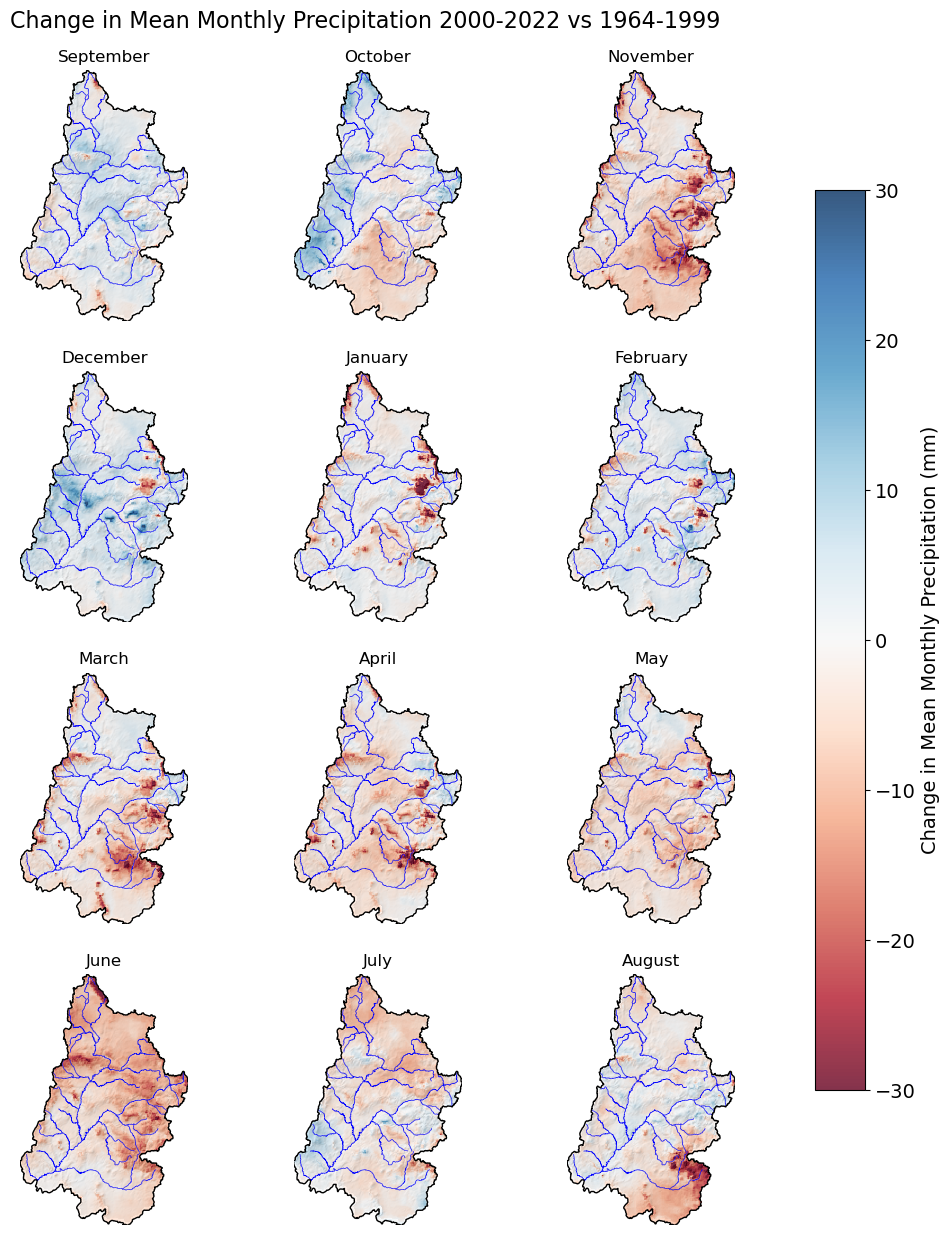

In [192]:
prism_pre = prism_4km_all_ds.where((prism_4km_all_ds['month.year']<2000) & (prism_4km_all_ds['month.year']>1963), drop=True)
prism_post = prism_4km_all_ds.where(prism_4km_all_ds['month.year']>=2000, drop=True)
# plot the difference in mean precipitation for each month of the year
fig, axs = plt.subplots(ncols = 3, nrows=4, figsize=(10, 15))
axs = axs.flatten()
months = {9:'September',10:'October',11:'November',12:'December',1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August'}
for i, ax in enumerate(axs):
    month = list(months.keys())[i]
    ax.imshow(ls.hillshade(src_4km.squeeze().values, vert_exag=10, dx=dx, dy=dy), cmap='gray',extent=[ucrb_basin_boundary.bounds.loc[0]['minx'], 
                                                                                                    ucrb_basin_boundary.bounds.loc[0]['maxx'], 
                                                                                                            ucrb_basin_boundary.bounds.loc[0]['miny'], 
                                                                                                            ucrb_basin_boundary.bounds.loc[0]['maxy']])        
 
    # plot the hcdn basins
    monthly_prism_pre = prism_pre.where(prism_pre['month.month']==month,drop=True).mean(dim='month')
    monthly_prism_post = prism_post.where(prism_post['month.month']==month,drop=True).mean(dim='month')
    monthly_prism_diff = monthly_prism_post.ppt - monthly_prism_pre.ppt
    cax = monthly_prism_diff.plot(ax=ax, cmap='RdBu', add_colorbar=False, vmin=-30, vmax=30,alpha=0.8)
    ucrb_stream_traces.plot(ax=ax, color='blue', linewidth=0.5, zorder=1)   
    # add the ucrb boundary as a black outline
    ucrb_basin_boundary.boundary.plot(ax=ax, edgecolor='black', linewidth=1)
    # name the plot the month as the full month name
    ax.set_title(months[month])
    ax.axis('off')
# add a colorbar on the right side of the figure
cbar_ax = fig.add_axes([0.95, 0.2, 0.05, 0.6])
cbar = fig.colorbar(cax, cax=cbar_ax)
cbar.set_label('Change in Mean Monthly Precipitation (mm)', size=14)
# increase the size of the ticklabels on the cbar
cbar.ax.tick_params(labelsize=14)
# add title
fig.suptitle('Change in Mean Monthly Precipitation 2000-2022 vs 1964-1999', 
             fontsize=16,
             # move the title down a bit,
             y=0.92)


In [126]:
# Load ERA5 data
era5land_9km_ds = rxr.open_rasterio('../data/precipdata/ERA5-land-monthly-1963-2022-UCRB.nc')     
# add crs as 4326
era5land_9km_ds.rio.write_crs(4326, inplace=True)
# convert to 32613
era5land_9km_ds = era5land_9km_ds.rio.reproject(32613)
# clip to ucrb boundary
era5land_9km_ds = era5land_9km_ds.rio.clip(ucrb_basin_boundary.geometry, crs=32613)
# start date for all datasets
start_date = '1963-10-01'
end_date = '2022-09-30'

# for era5 rename the variable to prcp
if not 'prcp' in list(era5land_9km_ds.variables):
    era5land_9km_ds = era5land_9km_ds.rename({'tp':'prcp'})

# clip all data to start and end dates
era5land_9km_ds = era5land_9km_ds.sel(time=slice(start_date,end_date))

# fill values below 0 with nan
era5land_9km_ds = era5land_9km_ds.where(era5land_9km_ds >= 0, np.nan)

# add water year
era5land_9km_ds['water_year'] = era5land_9km_ds.time.dt.year.where(era5land_9km_ds.time.dt.month < 10,
                                                                era5land_9km_ds.time.dt.year+1)

In [205]:
ucrb_ppt_winter = p_mean.where(p_mean['month'].dt.month.isin([12,1,2]),drop=True).groupby('WY').sum(dim='month')
ucrb_ppt_spring = p_mean.where(p_mean['month'].dt.month.isin([3,4,5]),drop=True).groupby('WY').sum(dim='month')
ucrb_ppt_summer = p_mean.where(p_mean['month'].dt.month.isin([6,7,8]),drop=True).groupby('WY').sum(dim='month')
ucrb_ppt_fall = p_mean.where(p_mean['month'].dt.month.isin([9,10,11]),drop=True).groupby('WY').sum(dim='month')

Text(0.5, 1.0, 'Fall')

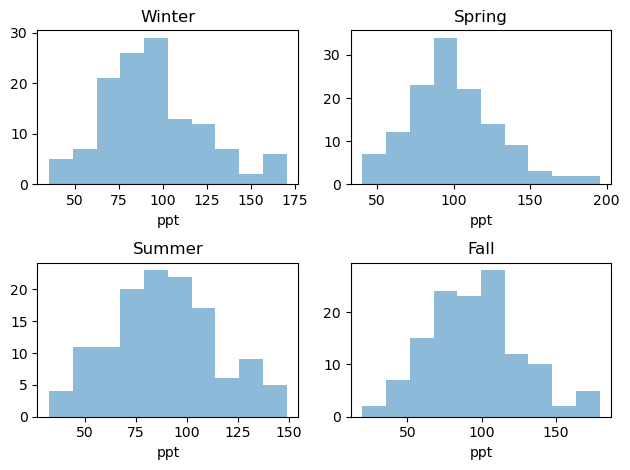

In [206]:
fig, axs = plt.subplots(2,2, tight_layout=True)
axs = axs.ravel()

ucrb_ppt_winter['ppt'].plot.hist(ax=axs[0], alpha=0.5)
ucrb_ppt_spring['ppt'].plot.hist(ax=axs[1], alpha=0.5)
ucrb_ppt_summer['ppt'].plot.hist(ax=axs[2], alpha=0.5)
ucrb_ppt_fall['ppt'].plot.hist(ax=axs[3], alpha=0.5)

axs[0].set_title('Winter')
axs[1].set_title('Spring')
axs[2].set_title('Summer')
axs[3].set_title('Fall')

### <a id='toc5_4_1_'></a>[UCRB Seasonal Change](#toc0_)

In [208]:
season_list = ['winter','spring','summer','fall']
ucrb_seasonalppt_ttest_results = pd.DataFrame(index=season_list, columns=['Shapiro-Wilke p',
                                                                                    'Shapiro-Wilke Result',
                                                                                    't-test p',
                                                                                    't-test Result',
                                                                                    'mannwhitney p',
                                                                                    'mannwhitney Result',
                                                                                    'percent change (spring)',
                                                                                    'value difference (spring)'])
seasons = [ucrb_ppt_winter['ppt'].to_pandas(),
            ucrb_ppt_spring['ppt'].to_pandas(),
            ucrb_ppt_summer['ppt'].to_pandas(),
            ucrb_ppt_fall['ppt'].to_pandas()]
for i,ds_seas in enumerate(seasons):
    single_site_pre = (ds_seas.loc[1964:1999].values)
    single_site_post = (ds_seas.loc[2000:].values)
    # Example of the Shapiro-Wilk Normality Test
    stat, p = stats.shapiro(single_site_pre)
    ucrb_seasonalppt_ttest_results.loc[season_list[i],'Shapiro-Wilke p'] = p

    if p > 100:
        ucrb_seasonalppt_ttest_results.loc[season_list[i],'Shapiro-Wilke Result'] = 'Probably Gaussian'
        if season_list[i] =='summer':
            # run the test for 1-conf
            z_alpha = stats.norm.ppf(conf)
        else:
            z_alpha = stats.norm.ppf(conf)
        # print("z_alpha = {}".format(z_alpha)) 

        s_pooled = np.sqrt((single_site_pre.std(ddof=1)**2)/len(single_site_pre) +
                        (single_site_post.std(ddof=1)**2)/len(single_site_post))
        # print('Pooled standard deviation is {} mm'.format(str(s_pooled)))

        # null hypothesis: no change in sample means
        delta = 0*single_site_pre.mean()
        # compute test statistic
        z_test = ((single_site_post.mean()-single_site_pre.mean())-
                delta)/s_pooled
        # print("z-score = {}".format(np.round(z_test,2))) 
        # compute p value
        if season_list[i] =='summer':
            # run the test for 1-conf
            pvalue = 1-stats.norm.cdf(z_test)
            ucrb_seasonalppt_ttest_results.loc[season_list[i],'t-test p'] = np.round(pvalue,3)
            if pvalue > 1-conf:
                ucrb_seasonalppt_ttest_results.loc[season_list[i],'t-test Result'] = 'Null Hypothesis Rejected'
            else: 
                ucrb_seasonalppt_ttest_results.loc[season_list[i],'t-test Result'] = 'Null Hypothesis Accepted'
        else:
            pvalue = stats.norm.cdf(z_test)
        
            ucrb_seasonalppt_ttest_results.loc[season_list[i],'t-test p'] = np.round(pvalue,3)
            if pvalue < conf:
                ucrb_seasonalppt_ttest_results.loc[season_list[i],'t-test Result'] = 'Null Hypothesis Rejected'
            else: 
                ucrb_seasonalppt_ttest_results.loc[season_list[i],'t-test Result'] = 'Null Hypothesis Accepted'
    else:
        ucrb_seasonalppt_ttest_results.loc[season_list[i],'Shapiro-Wilke Result'] = 'Probably not Gaussian, consider a non-parametric test'
        if season_list[i] =='summer':
            stat, p_value = stats.mannwhitneyu(single_site_post,single_site_pre, alternative='less')
        else:
            stat, p_value = stats.mannwhitneyu(single_site_post,single_site_pre, alternative='less')
        ucrb_seasonalppt_ttest_results.loc[season_list[i],'mannwhitney p'] = np.round(p_value,3)
        if p_value < conf:
            ucrb_seasonalppt_ttest_results.loc[season_list[i],'mannwhitney Result'] = 'Null Hypothesis Rejected'
        else: 
            ucrb_seasonalppt_ttest_results.loc[season_list[i],'mannwhitney Result'] = 'Null Hypothesis Accepted'
    # calculate the percent change between the two periods
    ucrb_seasonalppt_ttest_results.loc[season_list[i],'percent change'] = np.round((single_site_post.mean()-single_site_pre.mean())/single_site_pre.mean()*100,1)
    # calculate the difference in the mean values between the two periods
    ucrb_seasonalppt_ttest_results.loc[season_list[i],'value difference'] = np.round(single_site_post.mean()-single_site_pre.mean(),1)

In [209]:
ucrb_seasonalppt_ttest_results

Shapiro-Wilke p                               Shapiro-Wilke Result  \
winter        0.277526  Probably not Gaussian, consider a non-parametr...   
spring        0.402423  Probably not Gaussian, consider a non-parametr...   
summer        0.897738  Probably not Gaussian, consider a non-parametr...   
fall          0.071387  Probably not Gaussian, consider a non-parametr...   

       t-test p t-test Result mannwhitney p        mannwhitney Result  \
winter      NaN           NaN         0.589  Null Hypothesis Accepted   
spring      NaN           NaN         0.039  Null Hypothesis Rejected   
summer      NaN           NaN         0.018  Null Hypothesis Rejected   
fall        NaN           NaN         0.245  Null Hypothesis Accepted   

       percent change (spring) value difference (spring)  percent change  \
winter                     NaN                       NaN             1.5   
spring                     NaN                       NaN           -12.6   
summer                     NaN                       NaN           -15.6   
fall                       NaN                       NaN            -8.5   

        value difference  
winter               1.4  
spring             -13.2  
summer             -14.5  
fall                -8.9

## <a id='toc5_5_'></a>[Seasonal Precipitation Change Plots](#toc0_)

### <a id='toc5_5_1_'></a>[Winter Precipitation Shift Results](#toc0_)

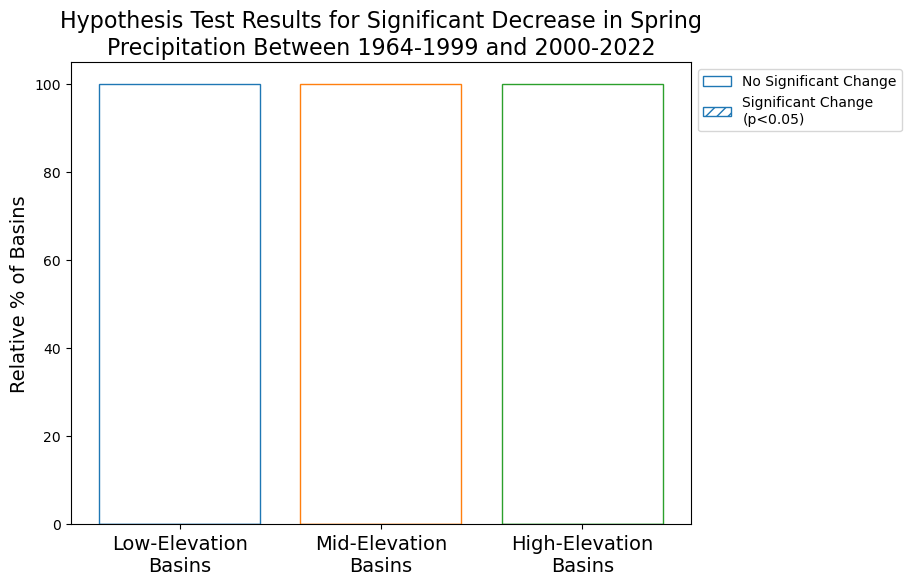

In [183]:

# create a dataframe with the results
low_rejected = len(low_winterp_ttest_results[(low_winterp_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (low_winterp_ttest_results['mannwhitney p']<=0.05)])
mid_rejected = len(mid_winterp_ttest_results[(mid_winterp_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (mid_winterp_ttest_results['mannwhitney p']<=0.05)])
high_rejected = len(high_winterp_ttest_results[(high_winterp_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (high_winterp_ttest_results['mannwhitney p']<=0.05)])
# create a stacked bar chart with low, mid, and high elevation sites
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(x=['Low-Elevation\nBasins','Mid-Elevation\nBasins','High-Elevation\nBasins'], 
       height=[100, 100, 100], 
       ec=['#1f77b4','#ff7f0e','#2ca02c'], 
       color=['white','white','white'])
ax.bar(x=['Low-Elevation\nBasins','Mid-Elevation\nBasins','High-Elevation\nBasins'], 
       height=[100*(low_rejected/10), 100*(mid_rejected/9), 100*(high_rejected/9)], 
       ec=['#1f77b4','#ff7f0e','#2ca02c'], 
       color=['white','white','white'], 
       hatch='///')
# add a legend with the hatch pattern
ax.legend(['No Significant Change','Significant Change\n(p<0.05)'], loc='upper left', bbox_to_anchor=(1,1))
# add y-label for number of basins
ax.set_ylabel('Relative % of Basins', fontsize=14)
# add title
ax.set_title(f'Hypothesis Test Results for Significant Decrease in Spring\nPrecipitation Between {test_start_year}-1999 and 2000-2022', fontsize=16)
# increase the font-size of the x-aixs tick labels
ax.tick_params(axis='x', labelsize=14)



(0.0, 13.0)

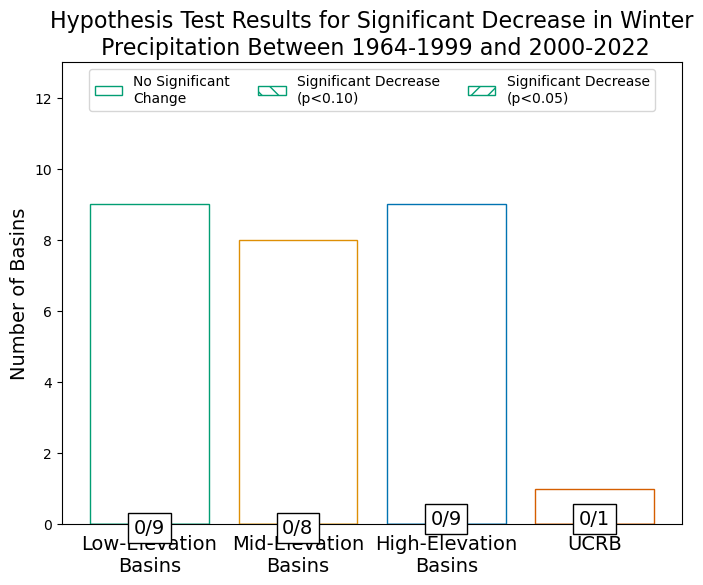

In [184]:
# create a dataframe with the results
low_rejected = len(low_winterp_ttest_results[(low_winterp_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (low_winterp_ttest_results['mannwhitney p']<=0.05)])
mid_rejected = len(mid_winterp_ttest_results[(mid_winterp_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (mid_winterp_ttest_results['mannwhitney p']<=0.05)])
high_rejected = len(high_winterp_ttest_results[(high_winterp_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (high_winterp_ttest_results['mannwhitney p']<=0.05)])
summer_result = ucrb_seasonalppt_ttest_results[ucrb_seasonalppt_ttest_results.index=='winter']
ucrb_rejected = len(summer_result[(summer_result['t-test Result']=='Null Hypothesis Rejected') | 
                                         (summer_result['mannwhitney p']<0.05)])
# calculate the same values but with 0.10 as the threshold
low_rejected_10 = len(low_winterp_ttest_results[(low_winterp_ttest_results['t-test p']<=0.10) |
                                               (low_winterp_ttest_results['mannwhitney p']<=0.10)])                                         
mid_rejected_10 = len(mid_winterp_ttest_results[(mid_winterp_ttest_results['t-test p']<=0.10) |
                                                   (mid_winterp_ttest_results['mannwhitney p']<=0.10)])    
high_rejected_10 = len(high_winterp_ttest_results[(high_winterp_ttest_results['t-test p']<=0.10) |
                                                         (high_winterp_ttest_results['mannwhitney p']<=0.10)])
# create a stacked bar chart with low, mid, and high elevation sites
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(x=['Low-Elevation\nBasins','Mid-Elevation\nBasins','High-Elevation\nBasins', 'UCRB'], 
       height=[9, 8, 9, 1], 
       ec=[(0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
           (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),  
           (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),  
           (0.8352941176470589, 0.3686274509803922, 0.0)], 
       color=['white','white','white', 'white'])
ax.bar(x=['Low-Elevation\nBasins','Mid-Elevation\nBasins','High-Elevation\nBasins','UCRB'],
       height=[(low_rejected_10), (mid_rejected_10), (high_rejected_10),0],
       ec=[(0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
           (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),  
           (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
           (0.8352941176470589, 0.3686274509803922, 0.0)],
       color=['white','white','white','white'],
       hatch='\\\\')

ax.bar(x=['Low-Elevation\nBasins','Mid-Elevation\nBasins','High-Elevation\nBasins','UCRB'], 
       height=[(low_rejected), (mid_rejected), (high_rejected), (ucrb_rejected)], 
       ec=[(0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
           (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),  
           (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),  
           (0.8352941176470589, 0.3686274509803922, 0.0)], 
       color=['none','none','none', 'none'], 
       hatch='//')
# add a legend with the hatch pattern
ax.legend(['No Significant\nChange', 'Significant Decrease\n(p<0.10)','Significant Decrease\n(p<0.05)'], ncols=3, loc='upper center', fontsize=10)
# add y-label for number of basins
ax.set_ylabel('Number of Basins', fontsize=14)
# add title
ax.set_title(f'Hypothesis Test Results for Significant Decrease in Winter\n Precipitation Between {test_start_year}-1999 and 2000-2022', fontsize=16)
# increase the font-size of the x-aixs tick labels
ax.tick_params(axis='x', labelsize=14)
# add text to the bars with the number of rejected values in each category over the number of basins in each category
ax.text(x=0, y=low_rejected-0.25, s=f'{low_rejected}/9', fontsize=14, ha='center', bbox=dict(facecolor='white', alpha=1.0, ec='k'))
ax.text(x=1, y=mid_rejected-0.25, s=f'{mid_rejected}/8', fontsize=14, ha='center', bbox=dict(facecolor='white', alpha=1.0, ec='k'))
ax.text(x=2, y=high_rejected, s=f'{high_rejected}/9', fontsize=14, ha='center', bbox=dict(facecolor='white', alpha=1.0, ec='k'))
ax.text(x=3, y=ucrb_rejected, s=f'{ucrb_rejected}/1', fontsize=14, ha='center', bbox=dict(facecolor='white', alpha=1.0, ec='k'))
ax.set_ylim(0,13)

### <a id='toc5_5_2_'></a>[Spring Precipitation Shift Results](#toc0_)

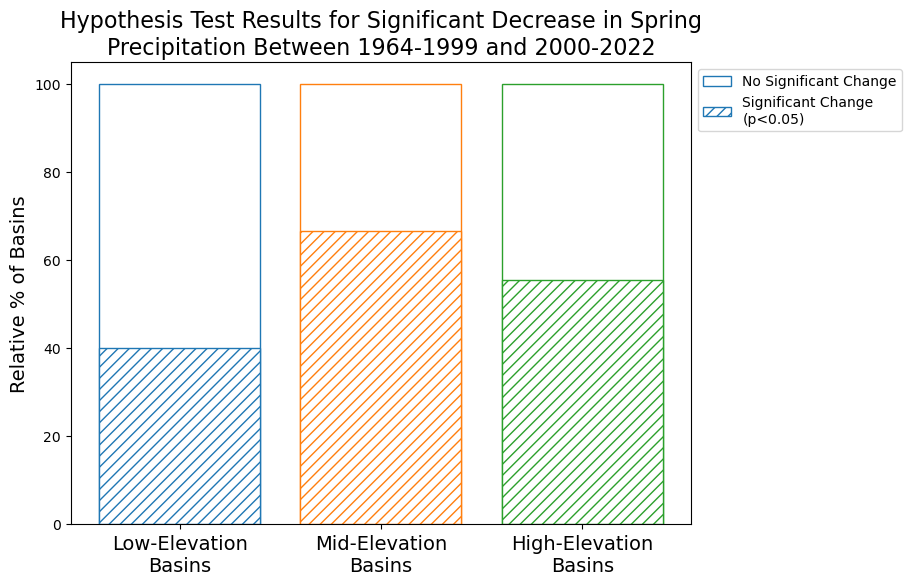

In [185]:

# create a dataframe with the results
low_rejected = len(low_springp_ttest_results[(low_springp_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (low_springp_ttest_results['mannwhitney p']<=0.05)])
mid_rejected = len(mid_springp_ttest_results[(mid_springp_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (mid_springp_ttest_results['mannwhitney p']<=0.05)])
high_rejected = len(high_springp_ttest_results[(high_springp_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (high_springp_ttest_results['mannwhitney p']<=0.05)])
# create a stacked bar chart with low, mid, and high elevation sites
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(x=['Low-Elevation\nBasins','Mid-Elevation\nBasins','High-Elevation\nBasins'], 
       height=[100, 100, 100], 
       ec=['#1f77b4','#ff7f0e','#2ca02c'], 
       color=['white','white','white'])
ax.bar(x=['Low-Elevation\nBasins','Mid-Elevation\nBasins','High-Elevation\nBasins'], 
       height=[100*(low_rejected/10), 100*(mid_rejected/9), 100*(high_rejected/9)], 
       ec=['#1f77b4','#ff7f0e','#2ca02c'], 
       color=['white','white','white'], 
       hatch='///')
# add a legend with the hatch pattern
ax.legend(['No Significant Change','Significant Change\n(p<0.05)'], loc='upper left', bbox_to_anchor=(1,1))
# add y-label for number of basins
ax.set_ylabel('Relative % of Basins', fontsize=14)
# add title
ax.set_title(f'Hypothesis Test Results for Significant Decrease in Spring\nPrecipitation Between {test_start_year}-1999 and 2000-2022', fontsize=16)
# increase the font-size of the x-aixs tick labels
ax.tick_params(axis='x', labelsize=14)



(0.0, 13.0)

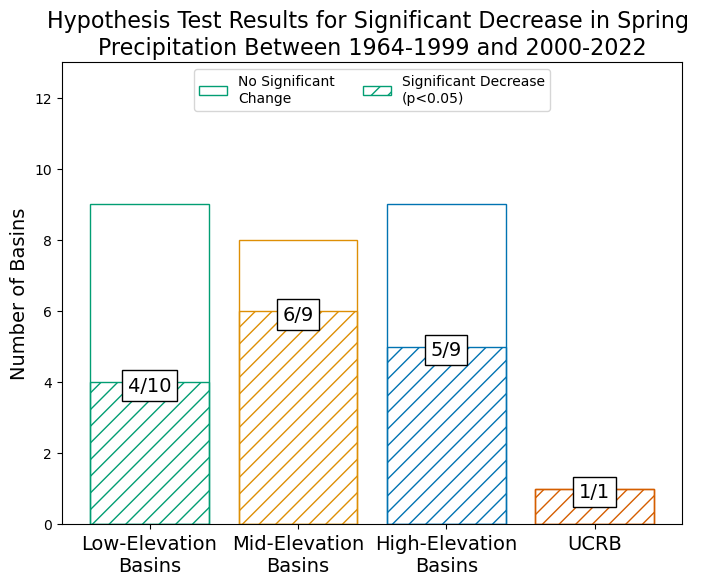

In [186]:
# create a dataframe with the results
low_rejected = len(low_springp_ttest_results[(low_springp_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (low_springp_ttest_results['mannwhitney p']<=0.05)])
mid_rejected = len(mid_springp_ttest_results[(mid_springp_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (mid_springp_ttest_results['mannwhitney p']<=0.05)])
high_rejected = len(high_springp_ttest_results[(high_springp_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (high_springp_ttest_results['mannwhitney p']<=0.05)])
summer_result = ucrb_seasonalppt_ttest_results[ucrb_seasonalppt_ttest_results.index=='spring']
ucrb_rejected = len(summer_result[(summer_result['t-test Result']=='Null Hypothesis Rejected') | 
                                         (summer_result['mannwhitney p']<0.05)])
# # calculate the same values but with 0.10 as the threshold
# low_rejected_10 = len(low_springp_ttest_results[(low_springp_ttest_results['t-test p']<=0.10) |
#                                                (low_springp_ttest_results['mannwhitney p']<=0.10)])                                         
# mid_rejected_10 = len(mid_springp_ttest_results[(mid_springp_ttest_results['t-test p']<=0.10) |
#                                                    (mid_springp_ttest_results['mannwhitney p']<=0.10)])    
# high_rejected_10 = len(high_springp_ttest_results[(high_springp_ttest_results['t-test p']<=0.10) |
#                                                          (high_springp_ttest_results['mannwhitney p']<=0.10)])
# create a stacked bar chart with low, mid, and high elevation sites
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(x=['Low-Elevation\nBasins','Mid-Elevation\nBasins','High-Elevation\nBasins', 'UCRB'], 
       height=[9, 8, 9, 1], 
       ec=[(0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
           (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),  
           (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),  
           (0.8352941176470589, 0.3686274509803922, 0.0)], 
       color=['white','white','white', 'white'])
# ax.bar(x=['Low-Elevation\nBasins','Mid-Elevation\nBasins','High-Elevation\nBasins','UCRB'],
#        height=[(low_rejected_10), (mid_rejected_10), (high_rejected_10),1],
#        ec=[(0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
#            (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),  
#            (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
#            (0.8352941176470589, 0.3686274509803922, 0.0)],
#        color=['white','white','white','white'],
#        hatch='\\\\')

ax.bar(x=['Low-Elevation\nBasins','Mid-Elevation\nBasins','High-Elevation\nBasins','UCRB'], 
       height=[(low_rejected), (mid_rejected), (high_rejected), (ucrb_rejected)], 
       ec=[(0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
           (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),  
           (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),  
           (0.8352941176470589, 0.3686274509803922, 0.0)], 
       color=['none','none','none', 'none'], 
       hatch='//')
# add a legend with the hatch pattern
ax.legend(['No Significant\nChange', 'Significant Decrease\n(p<0.05)'], ncols=3, loc='upper center', fontsize=10)
# add y-label for number of basins
ax.set_ylabel('Number of Basins', fontsize=14)
# add title
ax.set_title(f'Hypothesis Test Results for Significant Decrease in Spring \nPrecipitation Between {test_start_year}-1999 and 2000-2022', fontsize=16)
# increase the font-size of the x-aixs tick labels
ax.tick_params(axis='x', labelsize=14)
# add text to the bars with the number of rejected values in each category over the number of basins in each category
ax.text(x=0, y=low_rejected-0.25, s=f'{low_rejected}/10', fontsize=14, ha='center', bbox=dict(facecolor='white', alpha=1.0, ec='k'))
ax.text(x=1, y=mid_rejected-0.25, s=f'{mid_rejected}/9', fontsize=14, ha='center', bbox=dict(facecolor='white', alpha=1.0, ec='k'))
ax.text(x=2, y=high_rejected-0.25, s=f'{high_rejected}/9', fontsize=14, ha='center', bbox=dict(facecolor='white', alpha=1.0, ec='k'))
ax.text(x=3, y=ucrb_rejected-0.25, s=f'{ucrb_rejected}/1', fontsize=14, ha='center', bbox=dict(facecolor='white', alpha=1.0, ec='k'))
ax.set_ylim(0,13)

### <a id='toc5_5_3_'></a>[Summer Precipitation Shift Results](#toc0_)

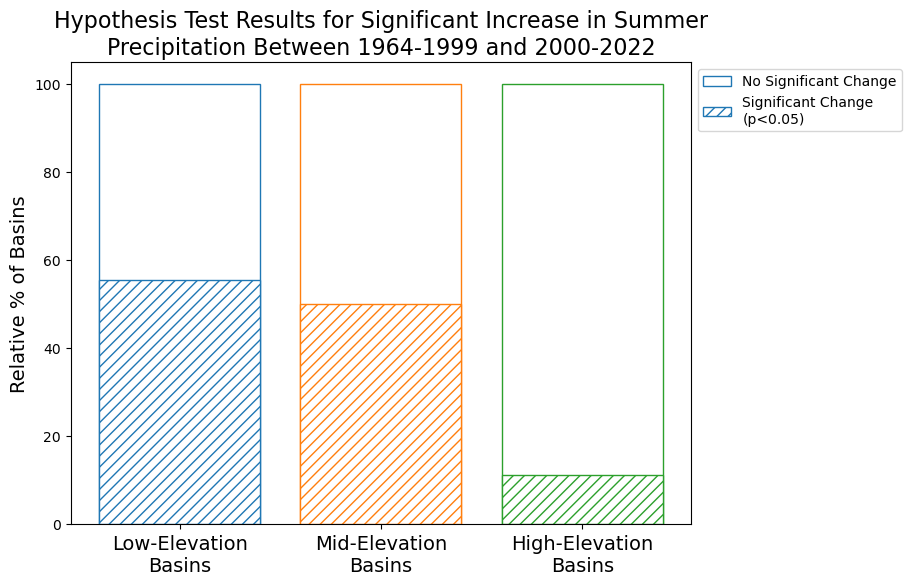

In [187]:

# create a dataframe with the results
low_rejected = len(low_summerp_ttest_results[(low_summerp_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (low_summerp_ttest_results['mannwhitney p']<0.05)])
mid_rejected = len(mid_summerp_ttest_results[(mid_summerp_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (mid_summerp_ttest_results['mannwhitney p']<0.05)])
high_rejected = len(high_summerp_ttest_results[(high_summerp_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (high_summerp_ttest_results['mannwhitney p']<0.05)])
# create a stacked bar chart with low, mid, and high elevation sites
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(x=['Low-Elevation\nBasins','Mid-Elevation\nBasins','High-Elevation\nBasins'], 
       height=[100, 100, 100], 
       ec=['#1f77b4','#ff7f0e','#2ca02c'], 
       color=['white','white','white'])
ax.bar(x=['Low-Elevation\nBasins','Mid-Elevation\nBasins','High-Elevation\nBasins'], 
       height=[100*(low_rejected/len(low_summerp_ttest_results)), 100*(mid_rejected/len(mid_summerp_ttest_results)), 100*(high_rejected/len(high_summerp_ttest_results))], 
       ec=['#1f77b4','#ff7f0e','#2ca02c'], 
       color=['white','white','white'], 
       hatch='///')
# add a legend with the hatch pattern
ax.legend(['No Significant Change','Significant Change\n(p<0.05)'], loc='upper left', bbox_to_anchor=(1,1))
# add y-label for number of basins
ax.set_ylabel('Relative % of Basins', fontsize=14)
# add title
ax.set_title(f'Hypothesis Test Results for Significant Increase in Summer\nPrecipitation Between {test_start_year}-1999 and 2000-2022', fontsize=16)
# increase the font-size of the x-aixs tick labels
ax.tick_params(axis='x', labelsize=14)



(0.0, 13.0)

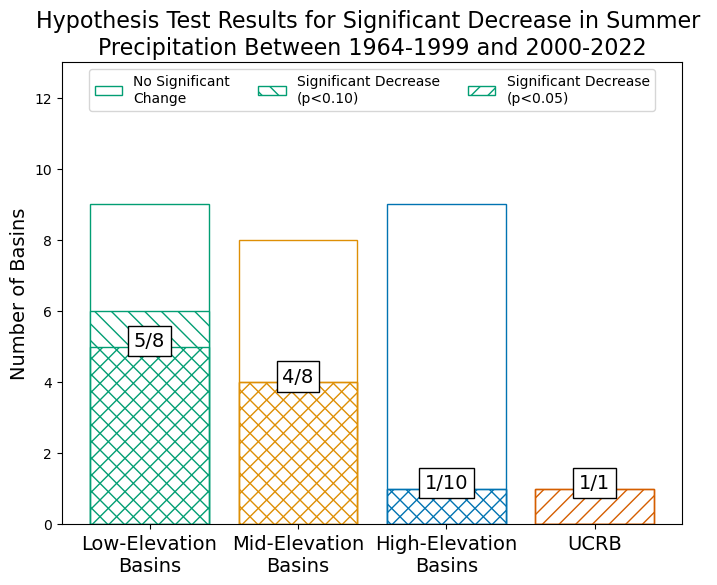

In [188]:
# create a dataframe with the results
low_rejected = len(low_summerp_ttest_results[(low_summerp_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (low_summerp_ttest_results['mannwhitney p']<0.05)])
mid_rejected = len(mid_summerp_ttest_results[(mid_summerp_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (mid_summerp_ttest_results['mannwhitney p']<0.05)])
high_rejected = len(high_summerp_ttest_results[(high_summerp_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (high_summerp_ttest_results['mannwhitney p']<0.05)])
summer_result = ucrb_seasonalppt_ttest_results[ucrb_seasonalppt_ttest_results.index=='summer']
ucrb_rejected = len(summer_result[(summer_result['t-test Result']=='Null Hypothesis Rejected') | 
                                         (summer_result['mannwhitney p']<0.05)])
# calculate the same values but with 0.10 as the threshold
low_rejected_10 = len(low_summerp_ttest_results[(low_summerp_ttest_results['t-test p']<=0.10) |
                                               (low_summerp_ttest_results['mannwhitney p']<=0.10)])                                         
mid_rejected_10 = len(mid_summerp_ttest_results[(mid_summerp_ttest_results['t-test p']<=0.10) |
                                                   (mid_summerp_ttest_results['mannwhitney p']<=0.10)])    
high_rejected_10 = len(high_summerp_ttest_results[(high_summerp_ttest_results['t-test p']<=0.10) |
                                                         (high_summerp_ttest_results['mannwhitney p']<=0.10)])
# create a stacked bar chart with low, mid, and high elevation sites
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(x=['Low-Elevation\nBasins','Mid-Elevation\nBasins','High-Elevation\nBasins', 'UCRB'], 
       height=[9,8,9, 1], 
       ec=[(0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
           (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),  
           (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),  
           (0.8352941176470589, 0.3686274509803922, 0.0)], 
       color=['white','white','white', 'white'])
ax.bar(x=['Low-Elevation\nBasins','Mid-Elevation\nBasins','High-Elevation\nBasins','UCRB'],
       height=[(low_rejected_10), (mid_rejected_10), (high_rejected_10),0],
       ec=[(0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
           (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),  
           (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
           (0.8352941176470589, 0.3686274509803922, 0.0)],
       color=['white','white','white','white'],
       hatch='\\\\')

ax.bar(x=['Low-Elevation\nBasins','Mid-Elevation\nBasins','High-Elevation\nBasins','UCRB'], 
       height=[(low_rejected), (mid_rejected), (high_rejected), (ucrb_rejected)], 
       ec=[(0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
           (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),  
           (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),  
           (0.8352941176470589, 0.3686274509803922, 0.0)], 
       color=['none','none','none', 'none'], 
       hatch='//')
# add a legend with the hatch pattern
ax.legend(['No Significant\nChange', 'Significant Decrease\n(p<0.10)','Significant Decrease\n(p<0.05)'], ncols=3, loc='upper center', fontsize=10)
# add y-label for number of basins
ax.set_ylabel('Number of Basins', fontsize=14)
# add title
ax.set_title(f'Hypothesis Test Results for Significant Decrease in Summer \nPrecipitation Between {test_start_year}-1999 and 2000-2022', fontsize=16)
# increase the font-size of the x-aixs tick labels
ax.tick_params(axis='x', labelsize=14)
# add text to the bars with the number of rejected values in each category over the number of basins in each category
ax.text(x=0, y=low_rejected, s=f'{low_rejected}/8', fontsize=14, ha='center', bbox=dict(facecolor='white', alpha=1.0, ec='k'))
ax.text(x=1, y=mid_rejected, s=f'{mid_rejected}/8', fontsize=14, ha='center', bbox=dict(facecolor='white', alpha=1.0, ec='k'))
ax.text(x=2, y=high_rejected, s=f'{high_rejected}/10', fontsize=14, ha='center', bbox=dict(facecolor='white', alpha=1.0, ec='k'))
ax.text(x=3, y=ucrb_rejected, s=f'{ucrb_rejected}/1', fontsize=14, ha='center', bbox=dict(facecolor='white', alpha=1.0, ec='k'))
ax.set_ylim(0,13)


(0.0, 13.0)

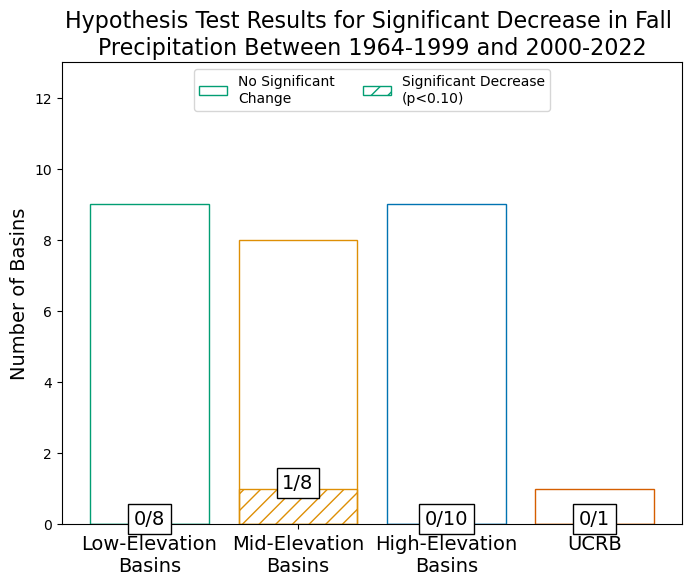

In [78]:
# create a dataframe with the results
low_rejected = len(low_fallp_ttest_results[(low_fallp_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (low_fallp_ttest_results['mannwhitney p']<0.05)])
mid_rejected = len(mid_fallp_ttest_results[(mid_fallp_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (mid_fallp_ttest_results['mannwhitney p']<0.05)])
high_rejected = len(high_fallp_ttest_results[(high_fallp_ttest_results['t-test Result']=='Null Hypothesis Rejected') | 
                                         (high_fallp_ttest_results['mannwhitney p']<0.05)])
fall_result = ucrb_seasonalppt_ttest_results[ucrb_seasonalppt_ttest_results.index=='fall']
ucrb_rejected = len(fall_result[(fall_result['t-test Result']=='Null Hypothesis Rejected') | 
                                         (fall_result['mannwhitney p']<0.05)])

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(x=['Low-Elevation\nBasins','Mid-Elevation\nBasins','High-Elevation\nBasins', 'UCRB'], 
       height=[9,8,9, 1], 
       ec=[(0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
           (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),  
           (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),  
           (0.8352941176470589, 0.3686274509803922, 0.0)], 
       color=['white','white','white', 'white'])

ax.bar(x=['Low-Elevation\nBasins','Mid-Elevation\nBasins','High-Elevation\nBasins','UCRB'], 
       height=[(low_rejected), (mid_rejected), (high_rejected), (ucrb_rejected)], 
       ec=[(0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
           (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),  
           (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),  
           (0.8352941176470589, 0.3686274509803922, 0.0)], 
       color=['none','none','none', 'none'], 
       hatch='//')
# add a legend with the hatch pattern
ax.legend(['No Significant\nChange', 'Significant Decrease\n(p<0.10)','Significant Decrease\n(p<0.05)'], ncols=3, loc='upper center', fontsize=10)
# add y-label for number of basins
ax.set_ylabel('Number of Basins', fontsize=14)
# add title
ax.set_title(f'Hypothesis Test Results for Significant Decrease in Fall \nPrecipitation Between {test_start_year}-1999 and 2000-2022', fontsize=16)
# increase the font-size of the x-aixs tick labels
ax.tick_params(axis='x', labelsize=14)
# add text to the bars with the number of rejected values in each category over the number of basins in each category
ax.text(x=0, y=low_rejected, s=f'{low_rejected}/8', fontsize=14, ha='center', bbox=dict(facecolor='white', alpha=1.0, ec='k'))
ax.text(x=1, y=mid_rejected, s=f'{mid_rejected}/8', fontsize=14, ha='center', bbox=dict(facecolor='white', alpha=1.0, ec='k'))
ax.text(x=2, y=high_rejected, s=f'{high_rejected}/10', fontsize=14, ha='center', bbox=dict(facecolor='white', alpha=1.0, ec='k'))
ax.text(x=3, y=ucrb_rejected, s=f'{ucrb_rejected}/1', fontsize=14, ha='center', bbox=dict(facecolor='white', alpha=1.0, ec='k'))
ax.set_ylim(0,13)


# <a id='toc6_'></a>[Compare Seasonal Precipitation Across Basins](#toc0_)

## <a id='toc6_1_'></a>[Compare winter and spring precipitation relationship](#toc0_)

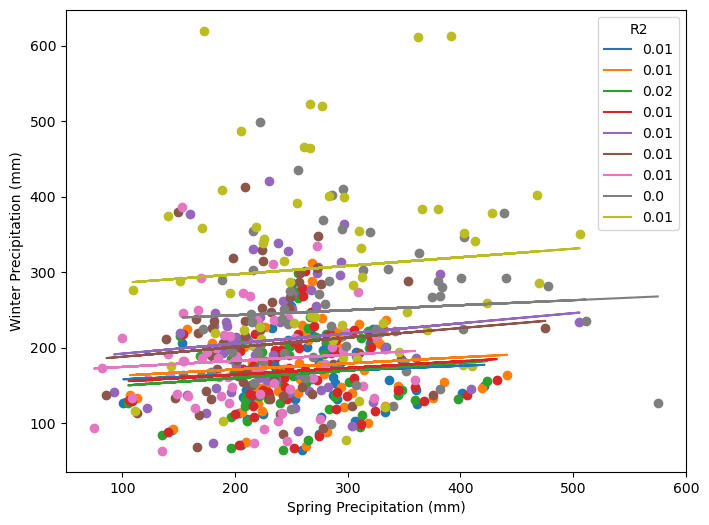

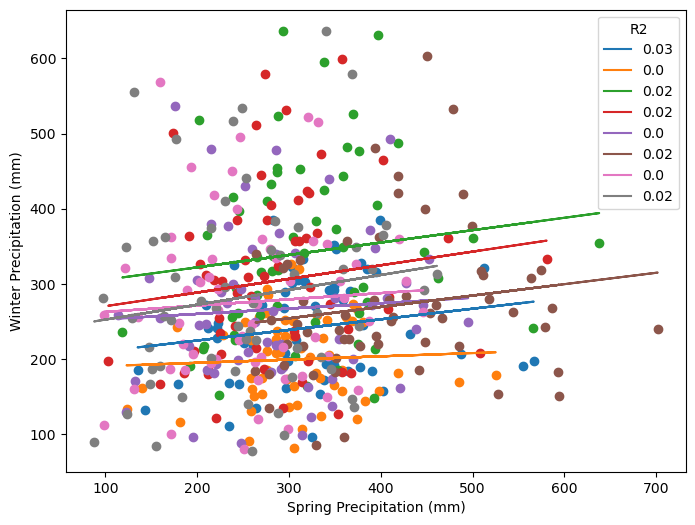

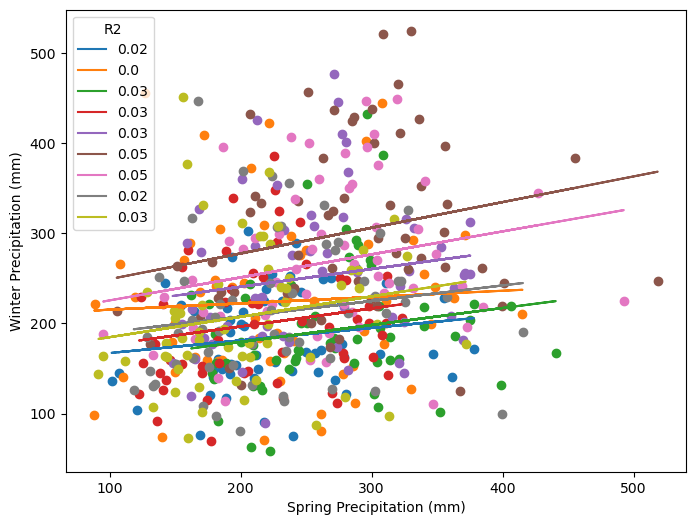

In [79]:
# plot high elevation seasonal precipitation for month = 4
# iterate through the site_no and plot the seasonal ppt vs annual q
# plot the seasonal ppt vs annual q for the site_no = 1
high_winter_spring_corr = []
fig, ax = plt.subplots(figsize=(8, 6))
for site in high_elevation_annual_q.site_no:
    winterp = high_elevation_annual_q.winter_ppt.sel(site_no=site)
    springp = high_elevation_annual_q.spring_ppt.sel(site_no=site)
    plt.scatter(springp,
                winterp)
    # add a best fit line using linregress
    slope, intercept, r_value, p_value, std_err = stats.linregress(springp, winterp)
    plt.plot(springp, intercept + slope * springp, label=f'{round(r_value**2,2)}')
    high_winter_spring_corr.append(round(stats.spearmanr(springp,winterp)[0],2))
plt.ylabel('Winter Precipitation (mm)')
plt.xlabel('Spring Precipitation (mm)')
plt.legend(title='R2')

mid_winter_spring_corr = []
fig, ax = plt.subplots(figsize=(8, 6))
for site in mid_elevation_annual_q.site_no:
    winterp = mid_elevation_annual_q.winter_ppt.sel(site_no=site)
    springp = mid_elevation_annual_q.spring_ppt.sel(site_no=site)
    plt.scatter(springp,
                winterp)
    # add a best fit line using linregress
    slope, intercept, r_value, p_value, std_err = stats.linregress(springp, winterp)
    plt.plot(springp, intercept + slope * springp, label=f'{round(r_value**2,2)}')
    mid_winter_spring_corr.append(round(stats.spearmanr(springp,winterp)[0],2))
plt.legend(title='R2')
plt.ylabel('Winter Precipitation (mm)')
plt.xlabel('Spring Precipitation (mm)')

# figure for low elevation basins
low_winter_spring_corr = []
fig, ax = plt.subplots(figsize=(8, 6))
for site in low_elevation_annual_q.site_no:
    winterp = low_elevation_annual_q.winter_ppt.sel(site_no=site)
    springp = low_elevation_annual_q.spring_ppt.sel(site_no=site)
    plt.scatter(springp,
                winterp)
    # add a best fit line using linregress
    slope, intercept, r_value, p_value, std_err = stats.linregress(springp, winterp)
    plt.plot(springp, intercept + slope * springp, label=f'{round(r_value**2,2)}')
    low_winter_spring_corr.append(round(stats.spearmanr(springp,winterp)[0],2))
plt.ylabel('Winter Precipitation (mm)')
plt.xlabel('Spring Precipitation (mm)')
plt.legend(title='R2')

We see very weak correaltion between these two

## <a id='toc6_2_'></a>[Look at the distribution of precipitation over the year in each HCDN basin](#toc0_)

### <a id='toc6_2_1_'></a>[High Elevation Basins](#toc0_)

(0.0, 70.0)

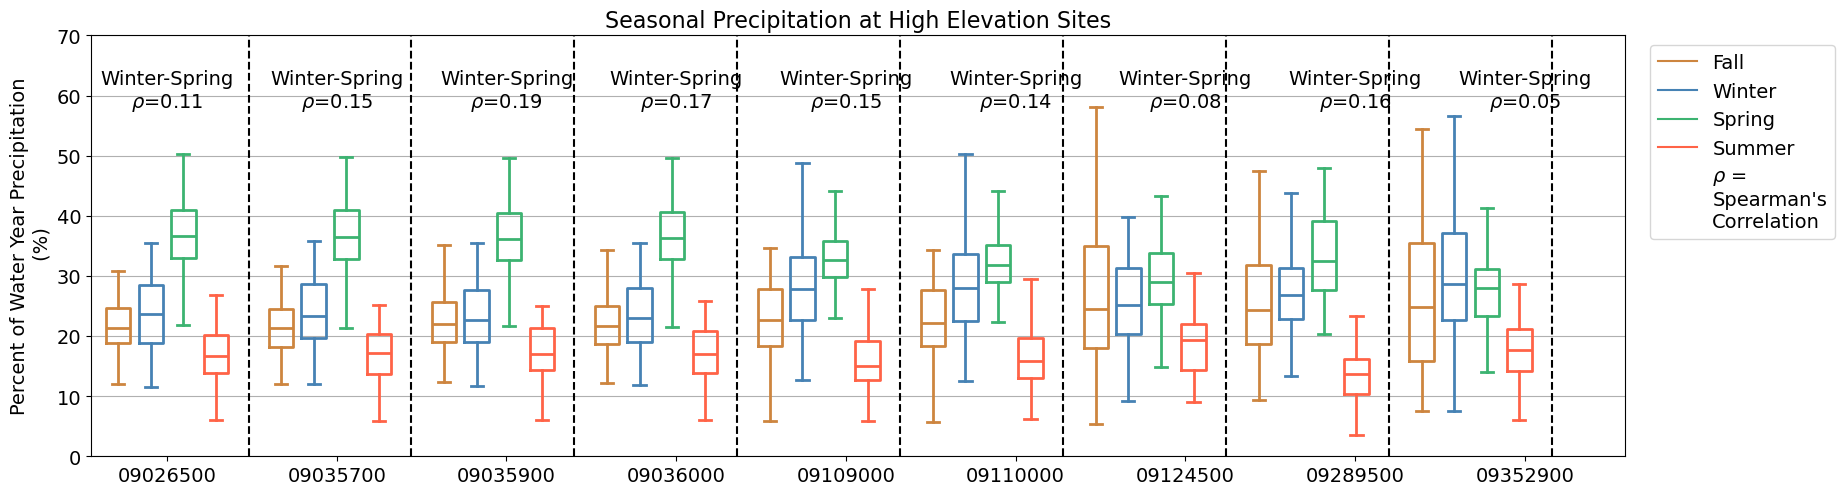

In [80]:
# create boxplot for high elevation data with a box
annual_ppt = high_elevation_annual_q.wy_ppt.values
fall = 100*(high_elevation_annual_q.fall_ppt.values/annual_ppt)
winter = 100*(high_elevation_annual_q.winter_ppt.values/annual_ppt)
spring = 100*(high_elevation_annual_q.spring_ppt.values/annual_ppt)
summer = 100*(high_elevation_annual_q.summer_ppt.values/annual_ppt)

ticks = high_elevation_annual_q.site_no.values

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color, linewidth=2)
    plt.setp(bp['whiskers'], color=color, linewidth=2)
    plt.setp(bp['caps'], color=color, linewidth=2)
    plt.setp(bp['medians'], color=color, linewidth=2)

plt.figure(figsize=(18,5))

fall_box = plt.boxplot(fall.T, positions=np.array(range(len(fall)))*3.-0.9, sym='', widths=0.45,)
winter_box = plt.boxplot(winter.T, positions=np.array(range(len(winter)))*3.-0.3, sym='', widths=0.45,)
spring_box = plt.boxplot(spring.T, positions=np.array(range(len(spring)))*3.+0.3, sym='', widths=0.45,)
summer_box = plt.boxplot(summer.T, positions=np.array(range(len(summer)))*3.+0.9, sym='', widths=0.45,)
# add vertical lines between each tick
for val in np.array(range(len(summer)))*3.+1.5:
    vertical_line = plt.axvline(x=val, color='k', linestyle='--')
# set box colors
set_box_color(fall_box, 'peru') # colors are from http://colorbrewer2.org/
set_box_color(winter_box, 'steelblue')
set_box_color(spring_box, 'mediumseagreen')
set_box_color(summer_box, 'tomato')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='peru', label='Fall')
plt.plot([], c='steelblue', label='Winter')
plt.plot([], c='mediumseagreen', label='Spring')
plt.plot([], c='tomato', label='Summer')
plt.plot([], color='white', label=fr"$\rho$"+ " =\nSpearman's\nCorrelation")
plt.legend(fontsize=14, bbox_to_anchor=(1.01, 1), loc='upper left')
# set x-ticks
tick_spacing = np.linspace(0,len(ticks)*2+7,len(ticks))
plt.xticks(np.linspace(0,len(ticks)*2+7,len(ticks)), ticks, size=14)
# add the high_winter_spring_corr to the plot as text above each tick
for i, val in enumerate(high_winter_spring_corr):
    plt.text(tick_spacing[i], 58, "Winter-Spring\n"+fr"$\rho$={val}", horizontalalignment='center', size=14)
# add horizontal grid lines
plt.grid(axis='y')
plt.tight_layout()
# increase y-axis label size 
plt.ylabel('Percent of Water Year Precipitation\n (%)', size=14)
# increase y-tick label size
plt.yticks(size=14)
plt.title('Seasonal Precipitation at High Elevation Sites', size=16)
plt.ylim(0,70)


### <a id='toc6_2_2_'></a>[Middle Elevation Basins](#toc0_)

(0.0, 70.0)

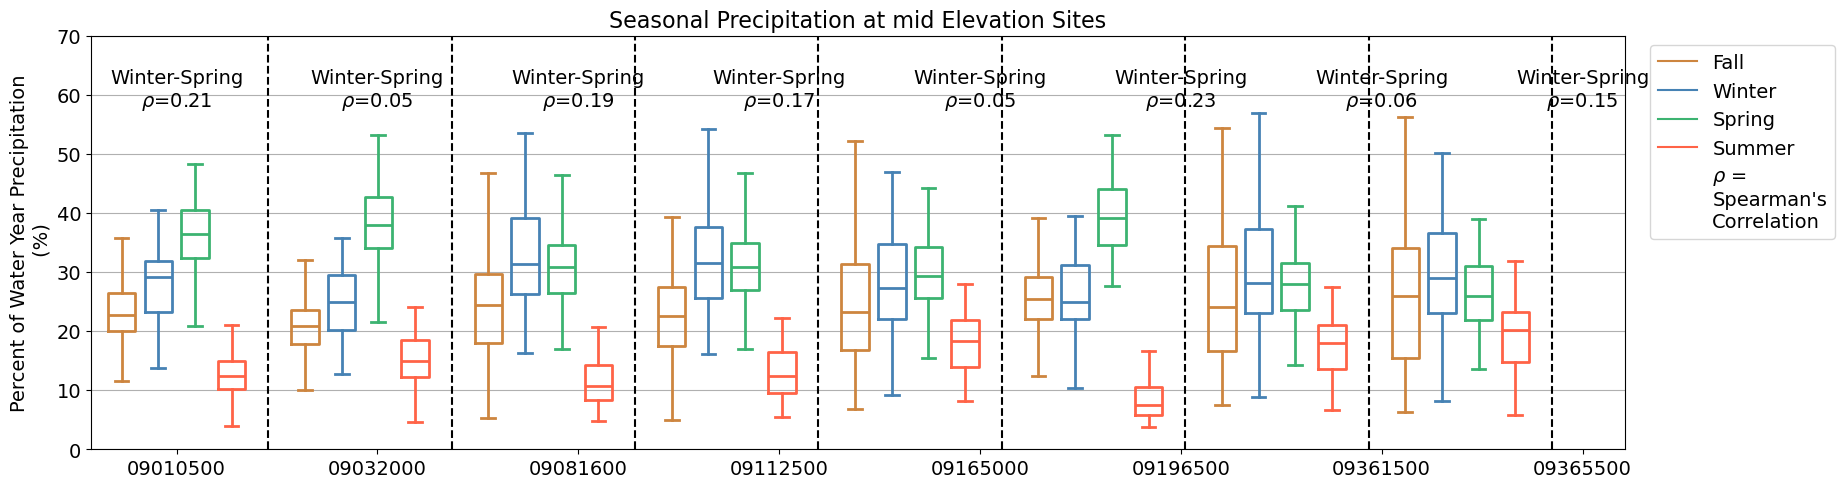

In [81]:
# create boxplot for mid elevation data with a box
annual_ppt = mid_elevation_annual_q.wy_ppt.values
fall = 100*(mid_elevation_annual_q.fall_ppt.values/annual_ppt)
winter = 100*(mid_elevation_annual_q.winter_ppt.values/annual_ppt)
spring = 100*(mid_elevation_annual_q.spring_ppt.values/annual_ppt)
summer = 100*(mid_elevation_annual_q.summer_ppt.values/annual_ppt)

ticks = mid_elevation_annual_q.site_no.values

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color, linewidth=2)
    plt.setp(bp['whiskers'], color=color, linewidth=2)
    plt.setp(bp['caps'], color=color, linewidth=2)
    plt.setp(bp['medians'], color=color, linewidth=2)

plt.figure(figsize=(18,5))

fall_box = plt.boxplot(fall.T, positions=np.array(range(len(fall)))*3.-0.9, sym='', widths=0.45,)
winter_box = plt.boxplot(winter.T, positions=np.array(range(len(winter)))*3.-0.3, sym='', widths=0.45,)
spring_box = plt.boxplot(spring.T, positions=np.array(range(len(spring)))*3.+0.3, sym='', widths=0.45,)
summer_box = plt.boxplot(summer.T, positions=np.array(range(len(summer)))*3.+0.9, sym='', widths=0.45,)
# add vertical lines between each tick
for val in np.array(range(len(summer)))*3.+1.5:
    vertical_line = plt.axvline(x=val, color='k', linestyle='--')
# set box colors
set_box_color(fall_box, 'peru') # colors are from http://colorbrewer2.org/
set_box_color(winter_box, 'steelblue')
set_box_color(spring_box, 'mediumseagreen')
set_box_color(summer_box, 'tomato')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='peru', label='Fall')
plt.plot([], c='steelblue', label='Winter')
plt.plot([], c='mediumseagreen', label='Spring')
plt.plot([], c='tomato', label='Summer')
plt.plot([], color='white', label=fr"$\rho$"+ " =\nSpearman's\nCorrelation")
plt.legend(fontsize=14, bbox_to_anchor=(1.01, 1), loc='upper left')
# set x-ticks
tick_spacing = np.linspace(0,len(ticks)*2+7,len(ticks))
plt.xticks(np.linspace(0,len(ticks)*2+7,len(ticks)), ticks, size=14)
# add the mid_winter_spring_corr to the plot as text above each tick
for i, val in enumerate(mid_winter_spring_corr):
    plt.text(tick_spacing[i], 58, "Winter-Spring\n"+fr"$\rho$={val}", horizontalalignment='center', size=14)
# add horizontal grid lines
plt.grid(axis='y')
plt.tight_layout()
# increase y-axis label size 
plt.ylabel('Percent of Water Year Precipitation\n (%)', size=14)
# increase y-tick label size
plt.yticks(size=14)
plt.title('Seasonal Precipitation at mid Elevation Sites', size=16)
plt.ylim(0,70)


### <a id='toc6_2_3_'></a>[Lower Elevation Basins](#toc0_)

(0.0, 70.0)

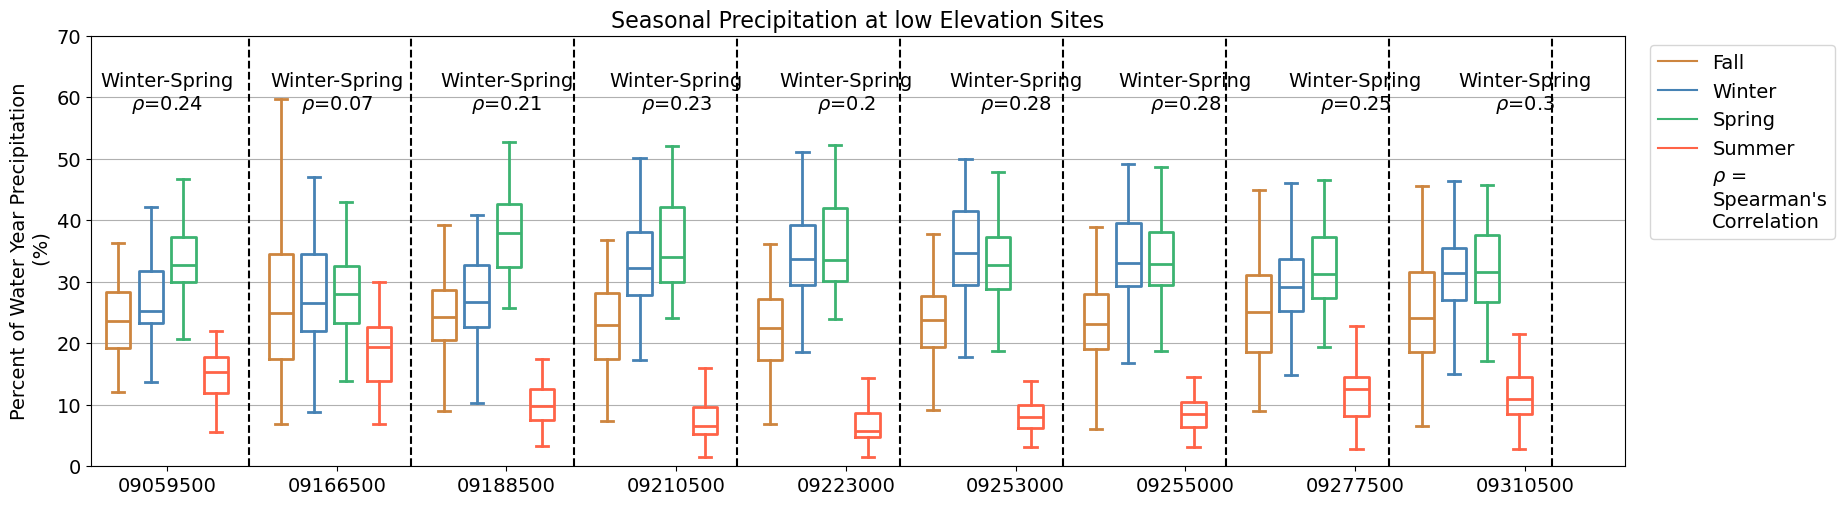

In [83]:
# create boxplot for low elevation data with a box
annual_ppt = low_elevation_annual_q.wy_ppt.values
fall = 100*(low_elevation_annual_q.fall_ppt.values/annual_ppt)
winter = 100*(low_elevation_annual_q.winter_ppt.values/annual_ppt)
spring = 100*(low_elevation_annual_q.spring_ppt.values/annual_ppt)
summer = 100*(low_elevation_annual_q.summer_ppt.values/annual_ppt)

ticks = low_elevation_annual_q.site_no.values

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color, linewidth=2)
    plt.setp(bp['whiskers'], color=color, linewidth=2)
    plt.setp(bp['caps'], color=color, linewidth=2)
    plt.setp(bp['medians'], color=color, linewidth=2)

plt.figure(figsize=(18,5))

fall_box = plt.boxplot(fall.T, positions=np.array(range(len(fall)))*3.-0.9, sym='', widths=0.45,)
winter_box = plt.boxplot(winter.T, positions=np.array(range(len(winter)))*3.-0.3, sym='', widths=0.45,)
spring_box = plt.boxplot(spring.T, positions=np.array(range(len(spring)))*3.+0.3, sym='', widths=0.45,)
summer_box = plt.boxplot(summer.T, positions=np.array(range(len(summer)))*3.+0.9, sym='', widths=0.45,)
# add vertical lines between each tick
for val in np.array(range(len(summer)))*3.+1.5:
    vertical_line = plt.axvline(x=val, color='k', linestyle='--')
# set box colors
set_box_color(fall_box, 'peru') # colors are from http://colorbrewer2.org/
set_box_color(winter_box, 'steelblue')
set_box_color(spring_box, 'mediumseagreen')
set_box_color(summer_box, 'tomato')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='peru', label='Fall')
plt.plot([], c='steelblue', label='Winter')
plt.plot([], c='mediumseagreen', label='Spring')
plt.plot([], c='tomato', label='Summer')
plt.plot([], color='white', label=fr"$\rho$"+ " =\nSpearman's\nCorrelation")
plt.legend(fontsize=14, bbox_to_anchor=(1.01, 1), loc='upper left')
# set x-ticks
tick_spacing = np.linspace(0,len(ticks)*2+7,len(ticks))
plt.xticks(np.linspace(0,len(ticks)*2+7,len(ticks)), ticks, size=14)
# add the low_winter_spring_corr to the plot as text above each tick
for i, val in enumerate(low_winter_spring_corr):
    plt.text(tick_spacing[i], 58, "Winter-Spring\n"+fr"$\rho$={val}", horizontalalignment='center', size=14)
# add horizontal grid lines
plt.grid(axis='y')
plt.tight_layout()
# increase y-axis label size 
plt.ylabel('Percent of Water Year Precipitation\n (%)', size=14)
# increase y-tick label size
plt.yticks(size=14)
plt.title('Seasonal Precipitation at low Elevation Sites', size=16)
plt.ylim(0,70)


## <a id='toc6_3_'></a>[Seasonal Precipitation Spearman Correlation Diagrams](#toc0_)

In [84]:
def spearman_dataframe(ds):
    # create a results dataframe
    results = pd.DataFrame(columns=['pre_springp_spearman', 'pre_winterp_spearman','post_springp_spearman', 'post_winterp_spearman', 
                                    'pre_summerp_spearman', 'pre_fallp_spearman', 'post_summerp_spearman', 'post_fallp_spearman',
                                    'pre_springp_winterp_spearman', 'post_springp_winterp_spearman'], 
                           index = ds.site_no.values)
    # loop through each site
    for site in ds.site_no.values:
        annualq = ds.wy_q_mm.sel(site_no=site).dropna(dim='water_year')
        springp = ds.spring_ppt.sel(site_no=site, water_year=annualq.water_year)
        winterp = ds.winter_ppt.sel(site_no=site, water_year=annualq.water_year)
        summerp = ds.summer_ppt.sel(site_no=site, water_year=annualq.water_year)
        fallp = ds.fall_ppt.sel(site_no=site, water_year=annualq.water_year)                                           
        # split annualq into pre-2000 and post-2000
        annualq_pre = annualq.where(annualq.water_year<2000,drop=True)
        annualq_post = annualq.where(annualq.water_year>=2000,drop=True)
        # split springp into pre-2000 and post-2000
        springp_pre = springp.where(springp.water_year<2000, drop=True)
        springp_post = springp.where(springp.water_year>=2000, drop=True)
        # split winterp into pre-2000 and post-2000
        winterp_pre = winterp.where(winterp.water_year<2000, drop=True)
        winterp_post = winterp.where(winterp.water_year>=2000, drop=True)
        # split summerp into pre-2000 and post-2000
        summerp_pre = summerp.where(summerp.water_year<2000, drop=True)
        summerp_post = summerp.where(summerp.water_year>=2000, drop=True)
        # split fallp into pre-2000 and post-2000
        fallp_pre = fallp.where(fallp.water_year<2000, drop=True)
        fallp_post = fallp.where((fallp.water_year>=2000), drop=True)
        # calculate spearmans correlation for pre-2000
        pre_springp_spearman = stats.spearmanr(annualq_pre, springp_pre)
        pre_winterp_spearman = stats.spearmanr(annualq_pre, winterp_pre)
        pre_summerp_spearman = stats.spearmanr(annualq_pre, summerp_pre)
        pre_fallp_spearman = stats.spearmanr(annualq_pre, fallp_pre)
        pre_springp_winterp_spearman = stats.spearmanr(springp_pre, winterp_pre)
        # calculate spearmans correlation for post-2000
        post_springp_spearman = stats.spearmanr(annualq_post, springp_post)
        post_winterp_spearman = stats.spearmanr(annualq_post, winterp_post)
        post_summerp_spearman = stats.spearmanr(annualq_post, summerp_post)
        post_fallp_spearman = stats.spearmanr(annualq_post, fallp_post)
        post_springp_winterp_spearman = stats.spearmanr(springp_post, winterp_post)
        # store results in spearman_df
        results.loc[site] = [pre_springp_spearman[0], pre_winterp_spearman[0], post_springp_spearman[0], post_winterp_spearman[0],
                             pre_summerp_spearman[0], pre_fallp_spearman[0], post_summerp_spearman[0], post_fallp_spearman[0],
                             pre_springp_winterp_spearman[0], post_springp_winterp_spearman[0]]
    return results

In [85]:
# Calculate spearman correlations for each elevation zone
high_spearman_with_periods = spearman_dataframe(high_elevation_annual_q)
mid_spearman_with_periods = spearman_dataframe(mid_elevation_annual_q)
low_spearman_with_periods = spearman_dataframe(low_elevation_annual_q)

In [86]:
def spearman_dataframe_full(ds):
    # create a results dataframe
    results_q = pd.DataFrame(columns=[ 'Winter P','Spring P',
                                    'Summer P', 'Antecedent\nFall P'], 
                           index = ds.site_no.values)
    # create ppt_results dataframe
    results_ppt = pd.DataFrame(columns=[ 'winter_fall','winter_spring',
                                        'spring_summer','summer_fall'],
                            index = ds.site_no.values)
    # loop through each site
    for site in ds.site_no.values:
        annualq = ds.wy_q_mm.sel(site_no=site).dropna(dim='water_year')
        springp = ds.spring_ppt.sel(site_no=site, water_year=annualq.water_year)
        winterp = ds.winter_ppt.sel(site_no=site, water_year=annualq.water_year)
        summerp = ds.summer_ppt.sel(site_no=site, water_year=annualq.water_year)
        fallp = ds.fall_ppt.sel(site_no=site, water_year=annualq.water_year)    
        # split annualq into pre-2000 and post-2000
        annualq = annualq.where(annualq.water_year>1963,drop=True).values
        # split springp into pre-2000 and post-2000
        springp = springp.where(springp.water_year>1963, drop=True)
        # split winterp into pre-2000 and post-2000
        winterp = winterp.where((winterp.water_year>1963), drop=True)
        # split summerp into pre-2000 and post-2000
        summerp = summerp.where(summerp.water_year>1963, drop=True)
        # split fallp into pre-2000 and post-2000
        fallp = fallp.where(fallp.water_year>1963, drop=True)
        # calculate spearmans correlation for entire record
        springp_spearman = stats.pearsonr(annualq, springp)
        winterp_spearman = stats.pearsonr(annualq, winterp)
        summerp_spearman = stats.pearsonr(annualq, summerp)
        fallp_spearman = stats.pearsonr(annualq, fallp)
        # calculate spearmans between seasonal precipitation
        fallp_winterp_spearman = stats.pearsonr(fallp, winterp)
        winterp_springp_spearman = stats.pearsonr(winterp, springp)
        springp_summerp_spearman = stats.pearsonr(springp, summerp)
        summerp_fallp_spearman = stats.pearsonr(summerp, fallp)
        # store results in spearman_df
        results_q.loc[site] = [springp_spearman[0], winterp_spearman[0],
                             summerp_spearman[0], fallp_spearman[0]]
        # store results in results2
        results_ppt.loc[site] = [fallp_winterp_spearman[0], winterp_springp_spearman[0],
                                 springp_summerp_spearman[0], summerp_fallp_spearman[0]]
    return results_q

In [87]:
high_spearman = spearman_dataframe_full(high_elevation_annual_q)
mid_spearman = spearman_dataframe_full(mid_elevation_annual_q)
low_spearman = spearman_dataframe_full(low_elevation_annual_q)

In [88]:
# concatenate with mid_spearman
all_spearman = pd.concat([high_spearman_with_periods, mid_spearman_with_periods,low_spearman_with_periods], axis=0)
# convert values to float
all_spearman = all_spearman.astype(float)
# get all columns that contain the word pre
pre_columns = [col for col in all_spearman.columns if 'pre' in col][:-1]
post_columns = [col for col in all_spearman.columns if 'post' in col][:-1]

This plot can be edited to show the seasonal precipitation correlations for:
1) the entire period (1964-2022) `all_spearman`
2) the baseline period (1964-1999) `all_spearman_pre`
3) the millennium drought period (2000-2022) `all_spearman_post`

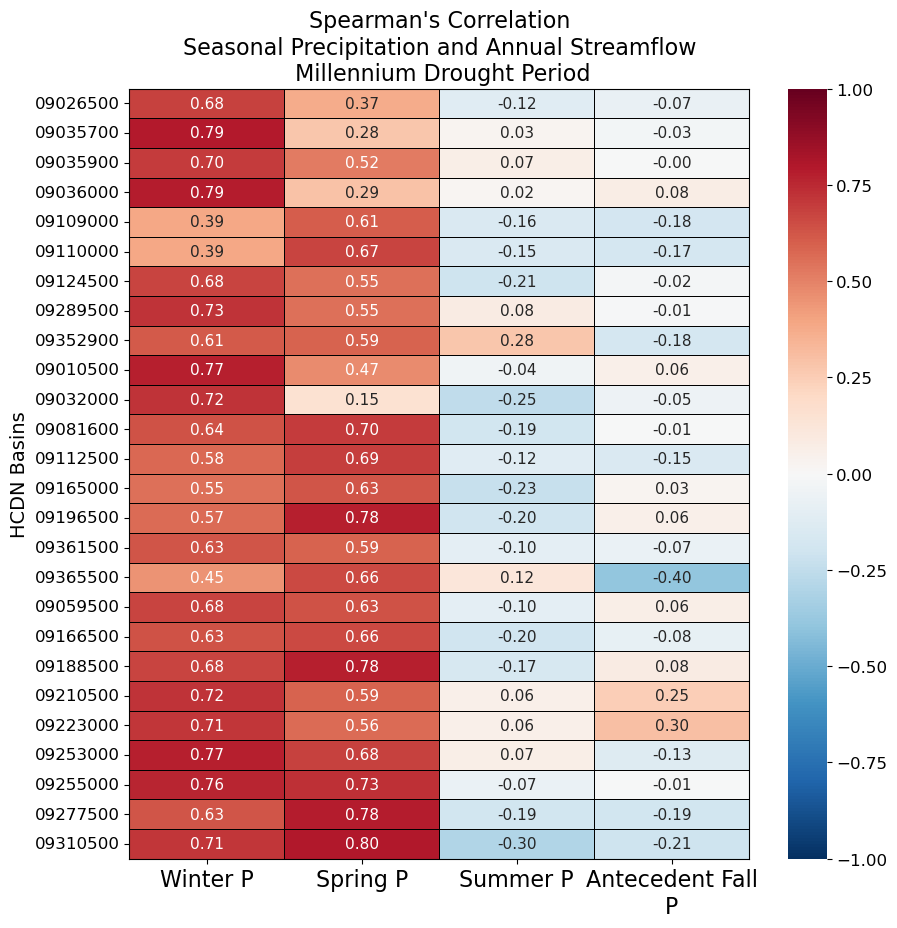

In [89]:
# concatenate with mid_spearman
# all_spearman = pd.concat([high_spearman, mid_spearman,low_spearman], axis=0)
# convert values to float
# all_spearman = all_spearman.astype(float)

# all_spearman_pre = all_spearman[pre_columns]
# # rename columns to be "Winter P", "Spring P", "Summer P", "Antecedent Fall P"
# all_spearman_pre = all_spearman_pre.rename(columns=dict(zip(all_spearman_pre.columns,["Winter P", "Spring P", "Summer P", "Antecedent Fall\nP"])))

all_spearman_post = all_spearman[post_columns]
# rename columns to be "Winter Q", "Spring Q", "Summer Q", "Antecedent Fall Q"
all_spearman_post = all_spearman_post.rename(columns=dict(zip(all_spearman_post.columns,["Winter P", "Spring P", "Summer P", "Antecedent Fall\nP"])))

# plot heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(all_spearman_post, vmin=-1, vmax=1, cmap='RdBu_r', annot=True, fmt='.2f', annot_kws={"size": 11}, linecolor='k', linewidths=0.5, ax=ax)
# add title "Seasonal Precipitation Spearman's Correlation to Annual Streamflow"
ax.set_title("Spearman's Correlation\nSeasonal Precipitation and Annual Streamflow\n Millennium Drought Period", fontsize=16)
# increase font size of tick lables
ax.tick_params(labelsize=12)
# increase font size of x-tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=16)
ax.set_ylabel("HCDN Basins", fontsize=14)
# increase the font size of the colorbar labels
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)

# rotate x-tick labels
# plt.xticks(rotation=45, ha='right')
# add frame around plot
for _, spine in ax.spines.items():
    spine.set_visible(True)
    




Underscores the importance of spring precipitation to streamflow

## <a id='toc6_4_'></a>[Precipitation Percent Changes By Season](#toc0_)

In [90]:
high_spring_diff = (high_springp_ttest_results[high_annualp_ttest_results['t-test p']<=0.05]['value difference'])
high_summer_diff = (high_summerp_ttest_results[high_annualp_ttest_results['t-test p']<=0.05]['value difference'])
high_fall_diff = (high_fallp_ttest_results[high_annualp_ttest_results['t-test p']<=0.05]['value difference'])
high_winter_diff = (high_winterp_ttest_results[high_annualp_ttest_results['t-test p']<=0.05]['value difference'])
(high_spring_diff)/high_annualp_ttest_results[high_annualp_ttest_results['t-test p']<=0.05]['value difference']

09109000    0.637119
09110000    0.658529
09124500    0.558585
09289500     0.64197
09352900    0.454656
Name: value difference, dtype: object

In [91]:
mid_spring_diff = (mid_springp_ttest_results[mid_annualp_ttest_results['t-test p']<=0.05]['value difference'])
mid_summer_diff = (mid_summerp_ttest_results[mid_annualp_ttest_results['t-test p']<=0.05]['value difference'])
mid_fall_diff = (mid_fallp_ttest_results[mid_annualp_ttest_results['t-test p']<=0.05]['value difference'])
mid_winter_diff = (mid_winterp_ttest_results[mid_annualp_ttest_results['t-test p']<=0.05]['value difference'])
(mid_spring_diff)/mid_annualp_ttest_results[mid_annualp_ttest_results['t-test p']<=0.05]['value difference']

09081600     0.46911
09112500    0.478796
09196500    0.496141
09361500    0.482977
09365500    0.444209
Name: value difference, dtype: object

In [92]:
low_spring_diff = (low_springp_ttest_results[low_annualp_ttest_results['t-test p']<=0.05]['value difference'])
low_summer_diff = (low_summerp_ttest_results[low_annualp_ttest_results['t-test p']<=0.05]['value difference'])
low_fall_diff = (low_fallp_ttest_results[low_annualp_ttest_results['t-test p']<=0.05]['value difference'])
low_winter_diff = (low_winterp_ttest_results[low_annualp_ttest_results['t-test p']<=0.05]['value difference'])
(low_spring_diff)/(low_spring_diff+low_summer_diff+low_fall_diff+low_winter_diff)

09166500    0.564815
09210500    0.392857
09223000    0.359375
09253000    0.405405
09255000    0.428571
09277500    0.626667
Name: value difference, dtype: object

In [93]:
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

### <a id='toc6_4_1_'></a>[Figure to show how much spring precipitation changes account for annual precipitation changes](#toc0_)

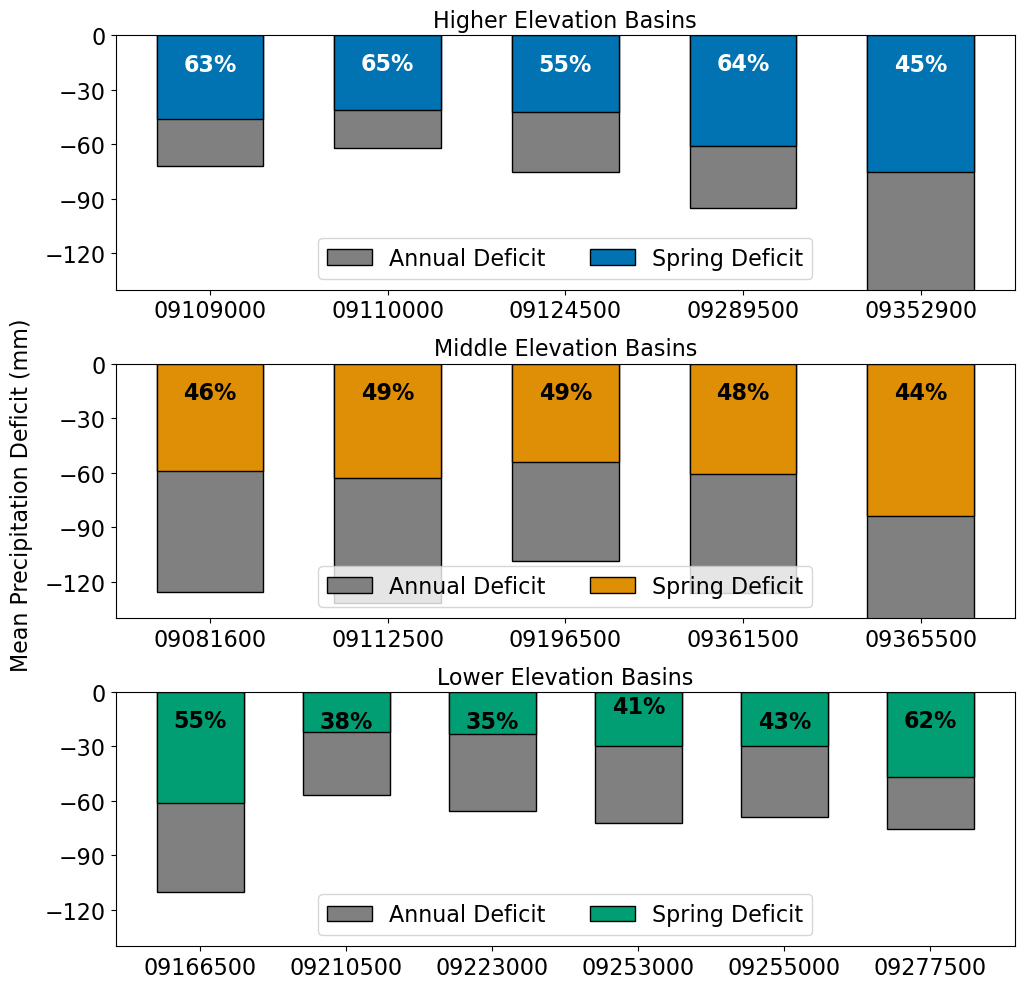

In [94]:
# create a bar plot with the value difference for high_annualp_ttest_results
fig, axs = plt.subplots(nrows=3,figsize=(10,10),tight_layout=True)
colors = sns.color_palette('colorblind')
ax = axs[0]
ax.bar(high_annualp_ttest_results[high_annualp_ttest_results['t-test p']<=0.05].index, 
      high_annualp_ttest_results[high_annualp_ttest_results['t-test p']<=0.05]['value difference'],
      color='grey',
      width=0.6,
      ec='black',
      label = 'Annual Deficit')
ax.bar((high_spring_diff).index,
       (high_spring_diff),
       width=0.6,
       ec='black',
       color=colors[0], 
       label = 'Spring Deficit')
# add a label on each bar with the percent of total
for i, v in enumerate((high_spring_diff)/high_annualp_ttest_results[high_annualp_ttest_results['t-test p']<=0.05]['value difference']):
    ax.text(i, v - 20, str(int(100*v))+'%', color='white', fontweight='bold', fontsize=16, ha='center')
ax.set_title('Higher Elevation Basins', size=16)
# increase x tick label size
ax.tick_params(axis='x', labelsize=16, rotation=0)

# plot mid elevation basins
ax = axs[1]
ax.bar(mid_annualp_ttest_results[mid_annualp_ttest_results['t-test p']<=0.05].index, 
       mid_annualp_ttest_results[mid_annualp_ttest_results['t-test p']<=0.05]['value difference'], 
       width=0.6,
       color='grey',
       ec='black',
       label = 'Annual Deficit')
ax.bar((mid_spring_diff).index, 
        (mid_spring_diff),
        width=0.6,
        color=colors[1], 
        ec='black',
        label = 'Spring Deficit')
# add a label on each bar with the percent of total
for i, v in enumerate((mid_spring_diff)/mid_annualp_ttest_results[mid_annualp_ttest_results['t-test p']<=0.05]['value difference']):
    if i == 1:
        ax.text(i, v-20, str(int(100*(v+0.0123)))+'%', color='black', fontweight='bold', fontsize=16, ha='center')
    else:
        ax.text(i, v-20, str(int(100*(v)))+'%', color='black', fontweight='bold', fontsize=16, ha='center')
ax.set_title('Middle Elevation Basins', size=16)

# add some space between title and plot
ax.title.set_position([.5, 1.1])


# plot low elevation basins
ax = axs[2]
ax.bar(low_annualp_ttest_results[low_annualp_ttest_results['t-test p']<=0.05].index, 
       low_annualp_ttest_results[low_annualp_ttest_results['t-test p']<=0.05]['value difference'], 
       width=0.6,
       color='grey',
       ec='black',
       label = 'Annual Deficit')
ax.bar((low_spring_diff).index, 
       (low_spring_diff),
       width=0.6,
       color=colors[2],
       ec='black',
       label = 'Spring Deficit')
# add a label on each bar with the percent of total
for i, v in enumerate((low_spring_diff)/low_annualp_ttest_results[low_annualp_ttest_results['t-test p']<=0.05]['value difference']):
    if i ==3:
        ax.text(i, v -12, str(int(100*v))+'%', color='black', fontweight='bold', fontsize=16, ha='center')
    else:
        ax.text(i, v -20, str(int(100*v))+'%', color='black', fontweight='bold', fontsize=16, ha='center')
ax.set_title('Lower Elevation Basins', size=16)
# increase x tick label size
ax.tick_params(axis='x', labelsize=16, rotation=0)

# create a y-axis label for the entire figure
fig.text(-0.02, 0.5, 'Mean Precipitation Deficit (mm)', va='center', rotation='vertical', size=16)
# set ylim for all axes
for ax in axs:
    ax.set_ylim(-140, 0)
    # set ticks to be at 0, -30, -60, -90, -120
    ax.set_yticks(np.arange(0, -150, -30))
    # increase x tick label size
    ax.tick_params(axis='x', labelsize=16, rotation=0)
    ax.tick_params(axis='y', labelsize=16)
    ax.legend(ncols=2, fontsize=16, loc='lower center')
# fig.suptitle('Contribution of Spring Precipitation Deficit to Annual Precipitation Deficit in Basins with\nSignificant Decrease in Annual Precipitation Between Baseline and Millennium Drought', size=16)
# save figure at 700 dpi and 9x6 centimeters
fig.savefig('../figures/precip_deficit_contribution.png', dpi=700, pad_inches=0.2, bbox_inches='tight')


# <a id='toc7_'></a>[Changes in runoff efficiency between periods](#toc0_)

Not included in analysis

### <a id='toc7_1_1_'></a>[Upper Colorado River Basin](#toc0_)

In [96]:
ucrb_annual_ppt = ucrb_ppt_seasonal_mean.groupby('WY').sum()
conf=0.05
ucrb_re_ttest_results = pd.DataFrame(index=['UCRB'], columns=['Shapiro-Wilke p',
                                                                                    'Shapiro-Wilke Result',
                                                                                    't-test p',
                                                                                    't-test Result',
                                                                                    'mannwhitney p'
                                                                                    ])
single_site_pre = (ucrb_naturalized_streamflow['q_mm_day'].loc[test_start_year:1999]/ucrb_annual_ppt['ppt'].to_pandas().loc[test_start_year:1999])
single_site_post = (ucrb_naturalized_streamflow['q_mm_day'].loc[2000:2022]/ucrb_annual_ppt['ppt'].to_pandas().loc[2000:2022])
# Example of the Shapiro-Wilk Normality Test
stat, p = stats.shapiro(single_site_pre)
ucrb_re_ttest_results.loc['UCRB','Shapiro-Wilke p'] = p

if p > conf:
    ucrb_re_ttest_results.loc['UCRB','Shapiro-Wilke Result'] = 'Probably Gaussian'
    
    z_alpha = stats.norm.ppf(conf)
    # print("z_alpha = {}".format(z_alpha)) 

    s_pooled = np.sqrt((single_site_pre.std(ddof=1)**2)/len(single_site_pre) +
                    (single_site_post.std(ddof=1)**2)/len(single_site_post))
    # print('Pooled standard deviation is {} mm'.format(str(s_pooled)))

    # null hypothesis: no change in sample means
    delta = 0*single_site_pre.mean()
    # compute test statistic
    z_test = ((single_site_post.mean()-single_site_pre.mean())-
            delta)/s_pooled
    # print("z-score = {}".format(np.round(z_test,2))) 
    # compute p value
    pvalue = stats.norm.cdf(z_test)
    ucrb_re_ttest_results.loc['UCRB','t-test p'] = np.round(pvalue,3)
    if pvalue < conf:
        ucrb_re_ttest_results.loc['UCRB','t-test Result'] = 'Null Hypothesis Rejected'
    else: 
        ucrb_re_ttest_results.loc['UCRB','t-test Result'] = 'Null Hypothesis Accepted'
else:
    ucrb_re_ttest_results.loc['UCRB','Shapiro-Wilke Result'] = 'Probably not Gaussian, consider a non-parametric test'
    stat, p_value = stats.mannwhitneyu(single_site_post,single_site_pre, alternative='less')
    ucrb_re_ttest_results.loc['UCRB','mannwhitney p'] = np.round(p_value,3)
    if p_value < conf:
        ucrb_re_ttest_results.loc['UCRB','mannwhitney Result'] = 'Null Hypothesis Rejected'
    else: 
        ucrb_re_ttest_results.loc['UCRB','mannwhitney Result'] = 'Null Hypothesis Accepted'

### <a id='toc7_1_2_'></a>[High Elevation Basins](#toc0_)

In [97]:
high_runoffeff_ttest_results = pd.DataFrame(index=high_elevation_annual_q.site_no.values, columns=['Shapiro-Wilke p',
                                                                                    'Shapiro-Wilke Result',
                                                                                    't-test p',
                                                                                    't-test Result',
                                                                                    'mannwhitney p',
                                                                                    'mannwhitney Result',
                                                                                    'percent change',
                                                                                    'value difference'])
for site in high_elevation_annual_q.site_no.values:
    dataset_q = high_elevation_annual_q.where(high_elevation_annual_q.wy_q_mm>0, drop=True).sel(site_no=site)
    dataset_p = high_elevation_annual_q.wy_ppt.sel(site_no=site)
    single_site_pre = (dataset_q['wy_q_mm']/dataset_p).to_pandas().dropna().loc[test_start_year:1999]
    single_site_post = (dataset_q['wy_q_mm']/dataset_p).to_pandas().dropna().loc[2000:]
    # Example of the Shapiro-Wilk Normality Test
    stat, p = stats.shapiro(single_site_pre)
    high_runoffeff_ttest_results.loc[site,'Shapiro-Wilke p'] = p
    if p > conf:
        high_runoffeff_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably Gaussian'
        
        z_alpha = stats.norm.ppf(conf)
        # print("z_alpha = {}".format(z_alpha)) 

        s_pooled = np.sqrt((single_site_pre.std(ddof=1)**2)/len(single_site_pre) +
                        (single_site_post.std(ddof=1)**2)/len(single_site_post))
        # print('Pooled standard deviation is {} mm'.format(str(s_pooled)))

        # null hypothesis: no change in sample means
        delta = 0*single_site_pre.mean()
        # compute test statistic
        z_test = ((single_site_post.mean()-single_site_pre.mean())-
                delta)/s_pooled
        # print("z-score = {}".format(np.round(z_test,2))) 
        # compute p value
        pvalue = stats.norm.cdf(z_test)
        pvalue =  stats.ttest_ind(single_site_post, single_site_pre, equal_var=False)[1]
        high_runoffeff_ttest_results.loc[site,'t-test p'] = np.round(pvalue,3)
        if pvalue < conf:
            high_runoffeff_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Rejected'
        else: 
            high_runoffeff_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Accepted'
    else:
        high_runoffeff_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably not Gaussian, consider a non-parametric test'
        stat, p_value = stats.mannwhitneyu(single_site_post,single_site_pre, alternative='less')
    
        high_runoffeff_ttest_results.loc[site,'mannwhitney p'] = np.round(p_value,3)
        if p_value < conf:
            high_runoffeff_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Rejected'
        else: 
            high_runoffeff_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Accepted'
    # Calculate the percent change between the two periods
    high_runoffeff_ttest_results.loc[site,'percent change'] = np.round(100*(single_site_post.mean()-single_site_pre.mean())/single_site_pre.mean(),2)
    # Calculate the difference in the mean values between the two periods
    high_runoffeff_ttest_results.loc[site,'value difference'] = np.round(single_site_post.mean()-single_site_pre.mean(),2)

In [98]:

high_runoffeff_ttest_results

Shapiro-Wilke p                               Shapiro-Wilke Result  \
09026500        0.004853  Probably not Gaussian, consider a non-parametr...   
09035700        0.161201                                  Probably Gaussian   
09035900        0.397772                                  Probably Gaussian   
09036000        0.071386                                  Probably Gaussian   
09109000        0.206809                                  Probably Gaussian   
09110000        0.016199  Probably not Gaussian, consider a non-parametr...   
09124500        0.800742                                  Probably Gaussian   
09289500        0.678681                                  Probably Gaussian   
09352900        0.528628                                  Probably Gaussian   

         t-test p             t-test Result mannwhitney p  \
09026500      NaN                       NaN         0.357   
09035700    0.433  Null Hypothesis Accepted           NaN   
09035900    0.494  Null Hypothesis Accepted           NaN   
09036000    0.316  Null Hypothesis Accepted           NaN   
09109000    0.205  Null Hypothesis Accepted           NaN   
09110000      NaN                       NaN         0.013   
09124500    0.884  Null Hypothesis Accepted           NaN   
09289500    0.093  Null Hypothesis Accepted           NaN   
09352900    0.748  Null Hypothesis Accepted           NaN   

                mannwhitney Result percent change value difference  
09026500  Null Hypothesis Accepted            0.3              0.0  
09035700                       NaN          -5.77            -0.03  
09035900                       NaN          -2.93            -0.02  
09036000                       NaN          -5.55            -0.03  
09109000                       NaN          -6.44            -0.02  
09110000  Null Hypothesis Rejected          -11.5            -0.04  
09124500                       NaN          -0.76             -0.0  
09289500                       NaN          -7.73            -0.04  
09352900                       NaN          -1.41            -0.01

### <a id='toc7_1_3_'></a>[Middle Elevation Basins](#toc0_)

In [99]:
mid_runoffeff_ttest_results = pd.DataFrame(index=mid_elevation_annual_q.site_no.values, columns=['Shapiro-Wilke p',
                                                                                    'Shapiro-Wilke Result',
                                                                                    't-test p',
                                                                                    't-test Result',
                                                                                    'mannwhitney p',
                                                                                    'mannwhitney Result',
                                                                                    'percent change',
                                                                                    'value difference'])
for site in mid_elevation_annual_q.site_no.values:
    dataset_q = mid_elevation_annual_q.where(mid_elevation_annual_q.wy_q_mm>0, drop=True).sel(site_no=site)
    dataset_p = mid_elevation_annual_q.wy_ppt.sel(site_no=site)
    single_site_pre = (dataset_q['wy_q_mm']/dataset_p).to_pandas().dropna().loc[test_start_year:1999]
    single_site_post = (dataset_q['wy_q_mm']/dataset_p).to_pandas().dropna().loc[2000:]
    # Example of the Shapiro-Wilk Normality Test
    stat, p = stats.shapiro(single_site_pre)
    mid_runoffeff_ttest_results.loc[site,'Shapiro-Wilke p'] = p
    if p > conf:
        mid_runoffeff_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably Gaussian'
        
        z_alpha = stats.norm.ppf(conf)
        # print("z_alpha = {}".format(z_alpha)) 

        s_pooled = np.sqrt((single_site_pre.std(ddof=1)**2)/len(single_site_pre) +
                        (single_site_post.std(ddof=1)**2)/len(single_site_post))
        # print('Pooled standard deviation is {} mm'.format(str(s_pooled)))

        # null hypothesis: no change in sample means
        delta = 0*single_site_pre.mean()
        # compute test statistic
        z_test = ((single_site_post.mean()-single_site_pre.mean())-
                delta)/s_pooled
        # print("z-score = {}".format(np.round(z_test,2))) 
        # compute p value
        pvalue = stats.norm.cdf(z_test)
        pvalue =  stats.ttest_ind(single_site_post, single_site_pre, equal_var=False)[1]
        mid_runoffeff_ttest_results.loc[site,'t-test p'] = np.round(pvalue,3)
        if pvalue < conf:
            mid_runoffeff_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Rejected'
        else: 
            mid_runoffeff_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Accepted'
    else:
        mid_runoffeff_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably not Gaussian, consider a non-parametric test'
        stat, p_value = stats.mannwhitneyu(single_site_post,single_site_pre, alternative='less')
    
        mid_runoffeff_ttest_results.loc[site,'mannwhitney p'] = np.round(p_value,3)
        if p_value < conf:
            mid_runoffeff_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Rejected'
        else: 
            mid_runoffeff_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Accepted'
    # Calculate the percent change between the two periods
    mid_runoffeff_ttest_results.loc[site,'percent change'] = np.round(100*(single_site_post.mean()-single_site_pre.mean())/single_site_pre.mean(),2)
    # Calculate the difference in the mean values between the two periods
    mid_runoffeff_ttest_results.loc[site,'value difference'] = np.round(single_site_post.mean()-single_site_pre.mean(),2)

In [100]:
mid_runoffeff_ttest_results

Shapiro-Wilke p                               Shapiro-Wilke Result  \
09010500        0.214405                                  Probably Gaussian   
09032000        0.042427  Probably not Gaussian, consider a non-parametr...   
09081600        0.798379                                  Probably Gaussian   
09112500        0.110543                                  Probably Gaussian   
09165000        0.783935                                  Probably Gaussian   
09196500        0.519187                                  Probably Gaussian   
09361500        0.723853                                  Probably Gaussian   
09365500        0.261008                                  Probably Gaussian   

         t-test p             t-test Result mannwhitney p  \
09010500    0.809  Null Hypothesis Accepted           NaN   
09032000      NaN                       NaN         0.849   
09081600    0.691  Null Hypothesis Accepted           NaN   
09112500    0.522  Null Hypothesis Accepted           NaN   
09165000    0.119  Null Hypothesis Accepted           NaN   
09196500    0.812  Null Hypothesis Accepted           NaN   
09361500    0.135  Null Hypothesis Accepted           NaN   
09365500    0.058  Null Hypothesis Accepted           NaN   

                mannwhitney Result percent change value difference  
09010500                       NaN           1.77             0.01  
09032000  Null Hypothesis Accepted          16.65             0.04  
09081600                       NaN          -1.79            -0.01  
09112500                       NaN          -3.63            -0.01  
09165000                       NaN          -9.33            -0.04  
09196500                       NaN           0.91             0.01  
09361500                       NaN          -7.95            -0.03  
09365500                       NaN          -14.0            -0.06

### <a id='toc7_1_4_'></a>[Low Elevation Basins](#toc0_)

In [101]:
low_runoffeff_ttest_results = pd.DataFrame(index=low_elevation_annual_q.site_no.values, columns=['Shapiro-Wilke p',
                                                                                    'Shapiro-Wilke Result',
                                                                                    't-test p',
                                                                                    't-test Result',
                                                                                    'mannwhitney p',
                                                                                    'mannwhitney Result',
                                                                                    'percent change',
                                                                                    'value difference'])
for site in low_elevation_annual_q.site_no.values:
    dataset_q = low_elevation_annual_q.where(low_elevation_annual_q.wy_q_mm>0, drop=True).sel(site_no=site)
    dataset_p = low_elevation_annual_q.wy_ppt.sel(site_no=site)
    single_site_pre = (dataset_q['wy_q_mm']/dataset_p).to_pandas().dropna().loc[test_start_year:1999]
    single_site_post = (dataset_q['wy_q_mm']/dataset_p).to_pandas().dropna().loc[2000:]
    # Example of the Shapiro-Wilk Normality Test
    stat, p = stats.shapiro(single_site_pre)
    low_runoffeff_ttest_results.loc[site,'Shapiro-Wilke p'] = p
    if p > conf:
        low_runoffeff_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably Gaussian'
        
        z_alpha = stats.norm.ppf(conf)
        # print("z_alpha = {}".format(z_alpha)) 

        s_pooled = np.sqrt((single_site_pre.std(ddof=1)**2)/len(single_site_pre) +
                        (single_site_post.std(ddof=1)**2)/len(single_site_post))
        # print('Pooled standard deviation is {} mm'.format(str(s_pooled)))

        # null hypothesis: no change in sample means
        delta = 0*single_site_pre.mean()
        # compute test statistic
        z_test = ((single_site_post.mean()-single_site_pre.mean())-
                delta)/s_pooled
        # print("z-score = {}".format(np.round(z_test,2))) 
        # compute p value
        pvalue = stats.norm.cdf(z_test)
        pvalue =  stats.ttest_ind(single_site_post, single_site_pre, equal_var=False)[1]
        low_runoffeff_ttest_results.loc[site,'t-test p'] = np.round(pvalue,3)
        if pvalue < conf:
            low_runoffeff_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Rejected'
        else: 
            low_runoffeff_ttest_results.loc[site,'t-test Result'] = 'Null Hypothesis Accepted'
    else:
        low_runoffeff_ttest_results.loc[site,'Shapiro-Wilke Result'] = 'Probably not Gaussian, consider a non-parametric test'
        stat, p_value = stats.mannwhitneyu(single_site_post,single_site_pre, alternative='less')
    
        low_runoffeff_ttest_results.loc[site,'mannwhitney p'] = np.round(p_value,3)
        if p_value < conf:
            low_runoffeff_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Rejected'
        else: 
            low_runoffeff_ttest_results.loc[site,'mannwhitney Result'] = 'Null Hypothesis Accepted'
    # Calculate the percent change between the two periods
    low_runoffeff_ttest_results.loc[site,'percent change'] = np.round(100*(single_site_post.mean()-single_site_pre.mean())/single_site_pre.mean(),2)
    # Calculate the difference in the mean values between the two periods
    low_runoffeff_ttest_results.loc[site,'value difference'] = np.round(single_site_post.mean()-single_site_pre.mean(),2)

In [102]:
low_runoffeff_ttest_results

Shapiro-Wilke p Shapiro-Wilke Result t-test p  \
09059500        0.971934    Probably Gaussian    0.288   
09166500        0.954028    Probably Gaussian    0.022   
09188500         0.52252    Probably Gaussian    0.046   
09210500         0.50872    Probably Gaussian    0.434   
09223000        0.430899    Probably Gaussian    0.015   
09253000        0.360947    Probably Gaussian    0.535   
09255000        0.323663    Probably Gaussian    0.316   
09277500        0.265822    Probably Gaussian      0.0   
09310500         0.66086    Probably Gaussian      0.0   

                     t-test Result mannwhitney p mannwhitney Result  \
09059500  Null Hypothesis Accepted           NaN                NaN   
09166500  Null Hypothesis Rejected           NaN                NaN   
09188500  Null Hypothesis Rejected           NaN                NaN   
09210500  Null Hypothesis Accepted           NaN                NaN   
09223000  Null Hypothesis Rejected           NaN                NaN   
09253000  Null Hypothesis Accepted           NaN                NaN   
09255000  Null Hypothesis Accepted           NaN                NaN   
09277500  Null Hypothesis Rejected           NaN                NaN   
09310500  Null Hypothesis Rejected           NaN                NaN   

         percent change value difference  
09059500           -6.1            -0.03  
09166500         -16.37            -0.06  
09188500          -8.01            -0.04  
09210500          -5.35            -0.01  
09223000         -17.79            -0.06  
09253000           -4.6            -0.02  
09255000          -7.92            -0.02  
09277500         -29.66            -0.07  
09310500         -27.83            -0.13

## <a id='toc7_2_'></a>[Plots of Precipitation and Annual Q relationship between periods for HCDN basins](#toc0_)

### <a id='toc7_2_1_'></a>[High Elevation Basins](#toc0_)

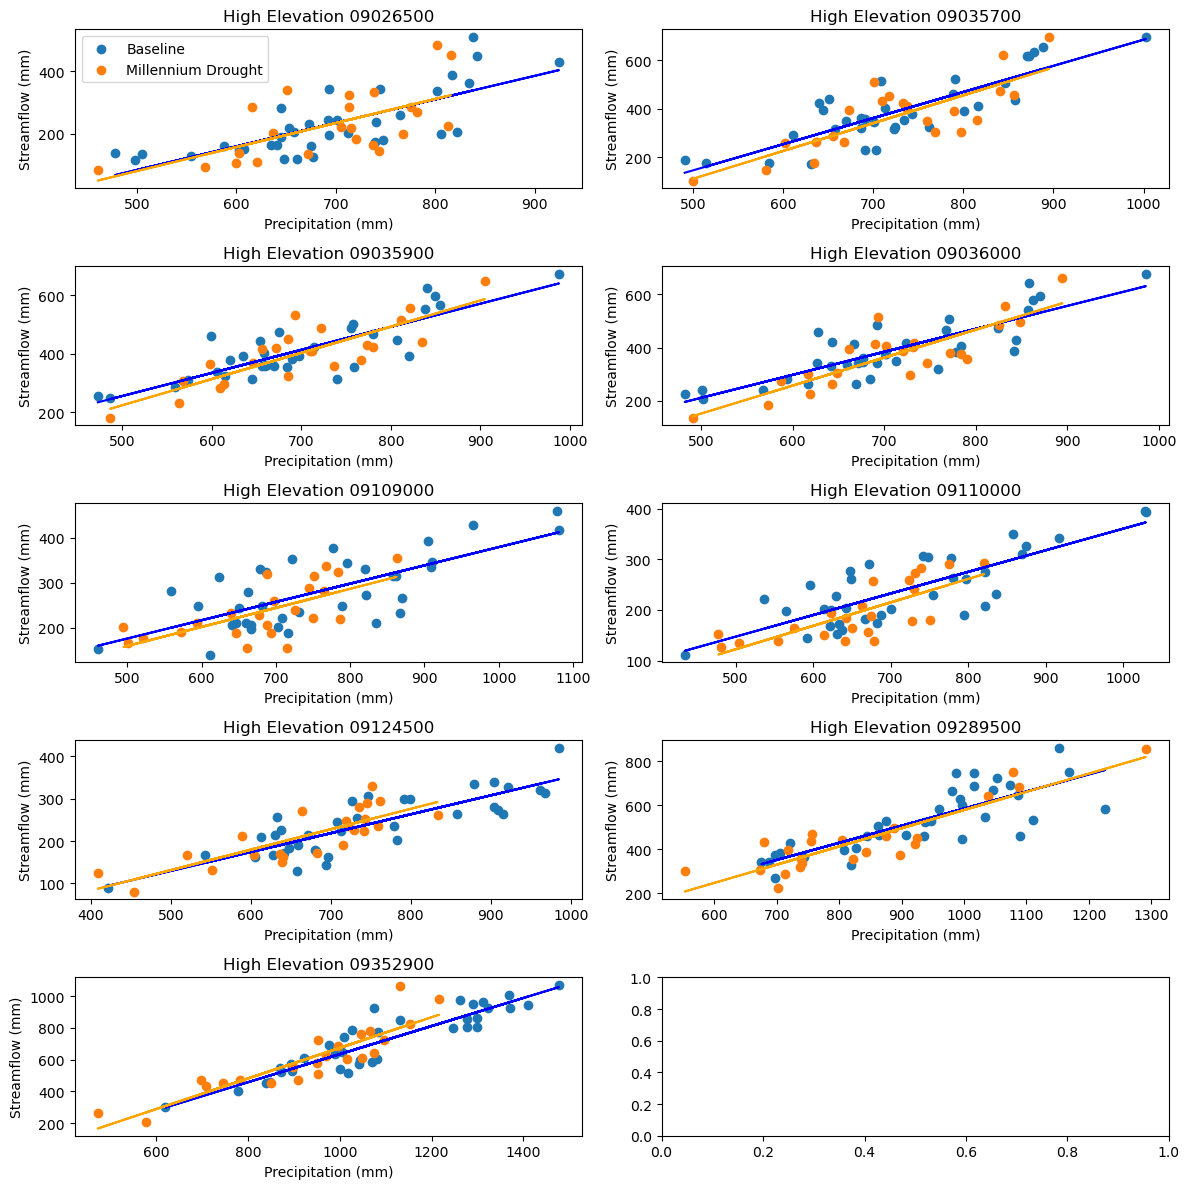

In [103]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12,12), tight_layout=True)
axs = axs.flatten()
for i,site in enumerate(high_elevation_annual_q.site_no.values):
    dataset = high_elevation_annual_q.where(high_elevation_annual_q.wy_q_mm>0, drop=True).sel(site_no=site)
    
    ax = axs[i]
    ax.scatter(dataset.sel(water_year=slice(1964,1999)).wy_ppt,
                dataset.sel(water_year=slice(1964,1999)).wy_q_mm, label='Baseline')
    
    
    # add a best fit line for each period
    x = dataset.sel(water_year=slice(1964,1999)).wy_ppt.dropna(dim='water_year')
    y = dataset.sel(water_year=slice(1964,1999)).wy_q_mm.dropna(dim='water_year')
    m, b = np.polyfit(x, y, 1)
    ax.plot(x, m*x + b, color='blue')
    ax.scatter(dataset.sel(water_year=slice(2000,2022)).wy_ppt,
                dataset.sel(water_year=slice(2000,2022)).wy_q_mm,label='Millennium Drought')
    # add a best fit line for each period
    x = dataset.sel(water_year=slice(2000,2022)).wy_ppt.dropna(dim='water_year')
    y = dataset.sel(water_year=slice(2000,2022)).wy_q_mm.dropna(dim='water_year')
    m, b = np.polyfit(x, y, 1)
    ax.plot(x, m*x + b, color='orange')
    ax.set_xlabel('Precipitation (mm)')
    ax.set_ylabel('Streamflow (mm)')
    ax.set_title(f'High Elevation {site}')
    if i==0:
        ax.legend()

### <a id='toc7_2_2_'></a>[Middle Elevation Basins](#toc0_)

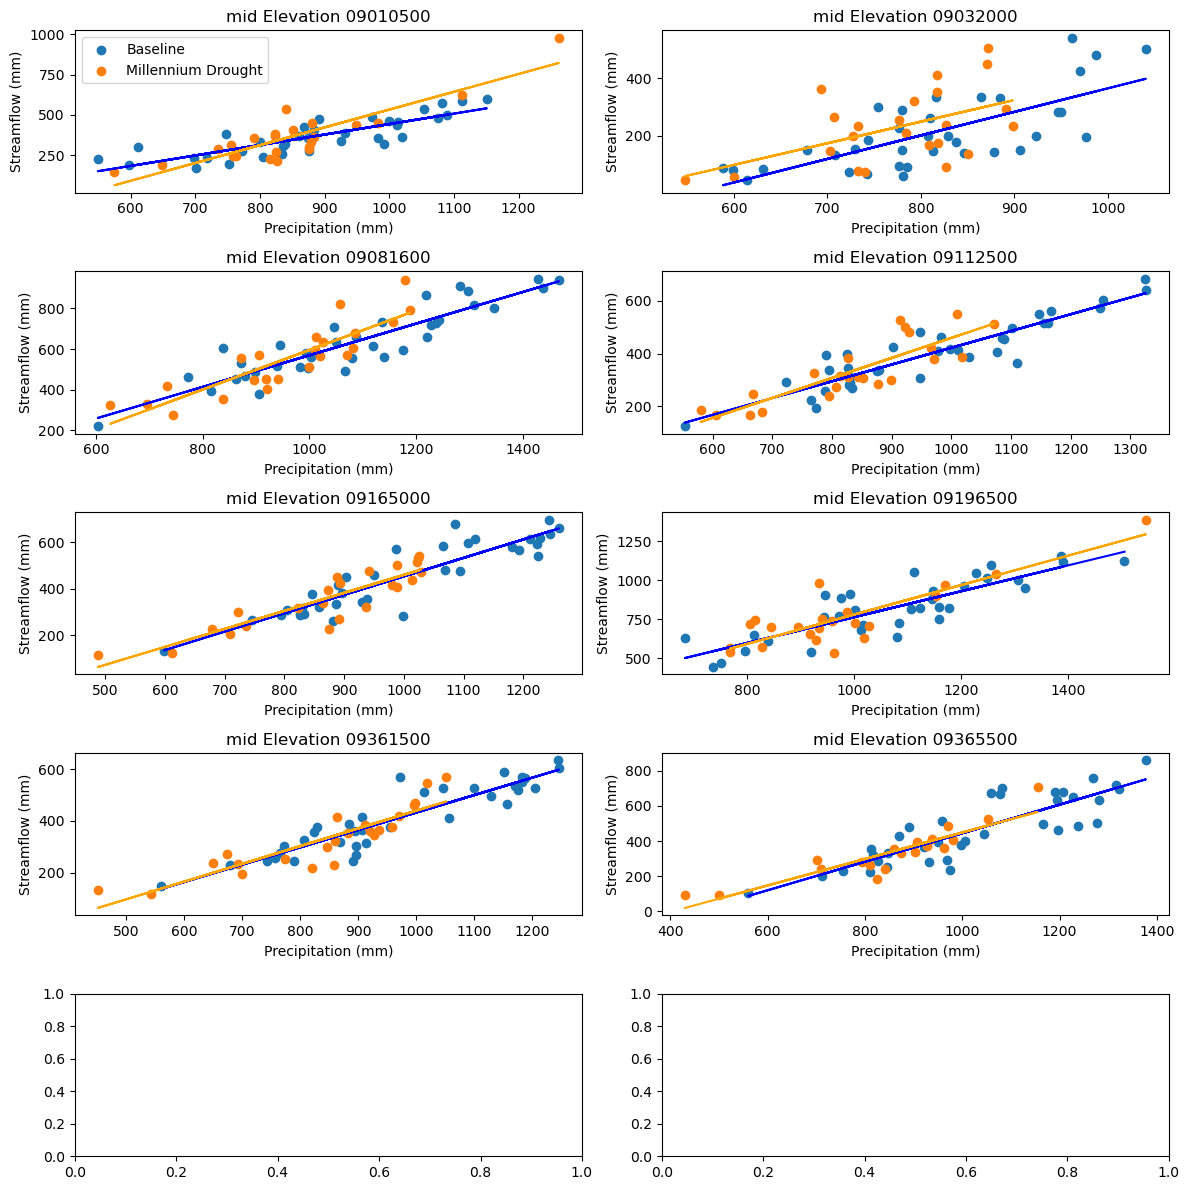

In [104]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12,12), tight_layout=True)
axs = axs.flatten()
for i,site in enumerate(mid_elevation_annual_q.site_no.values):
    dataset = mid_elevation_annual_q.where(mid_elevation_annual_q.wy_q_mm>0, drop=True).sel(site_no=site)
    
    ax = axs[i]
    ax.scatter(dataset.sel(water_year=slice(1964,1999)).wy_ppt,
                dataset.sel(water_year=slice(1964,1999)).wy_q_mm, label='Baseline')
    
    
    # add a best fit line for each period
    x = dataset.sel(water_year=slice(1964,1999)).wy_ppt.dropna(dim='water_year')
    y = dataset.sel(water_year=slice(1964,1999)).wy_q_mm.dropna(dim='water_year')
    m, b = np.polyfit(x, y, 1)
    ax.plot(x, m*x + b, color='blue')
    ax.scatter(dataset.sel(water_year=slice(2000,2022)).wy_ppt,
                dataset.sel(water_year=slice(2000,2022)).wy_q_mm,label='Millennium Drought')
    # add a best fit line for each period
    x = dataset.sel(water_year=slice(2000,2022)).wy_ppt.dropna(dim='water_year')
    y = dataset.sel(water_year=slice(2000,2022)).wy_q_mm.dropna(dim='water_year')
    m, b = np.polyfit(x, y, 1)
    ax.plot(x, m*x + b, color='orange')
    ax.set_xlabel('Precipitation (mm)')
    ax.set_ylabel('Streamflow (mm)')
    ax.set_title(f'mid Elevation {site}')
    if i==0:
        ax.legend()

### <a id='toc7_2_3_'></a>[Low Elevation Basins](#toc0_)

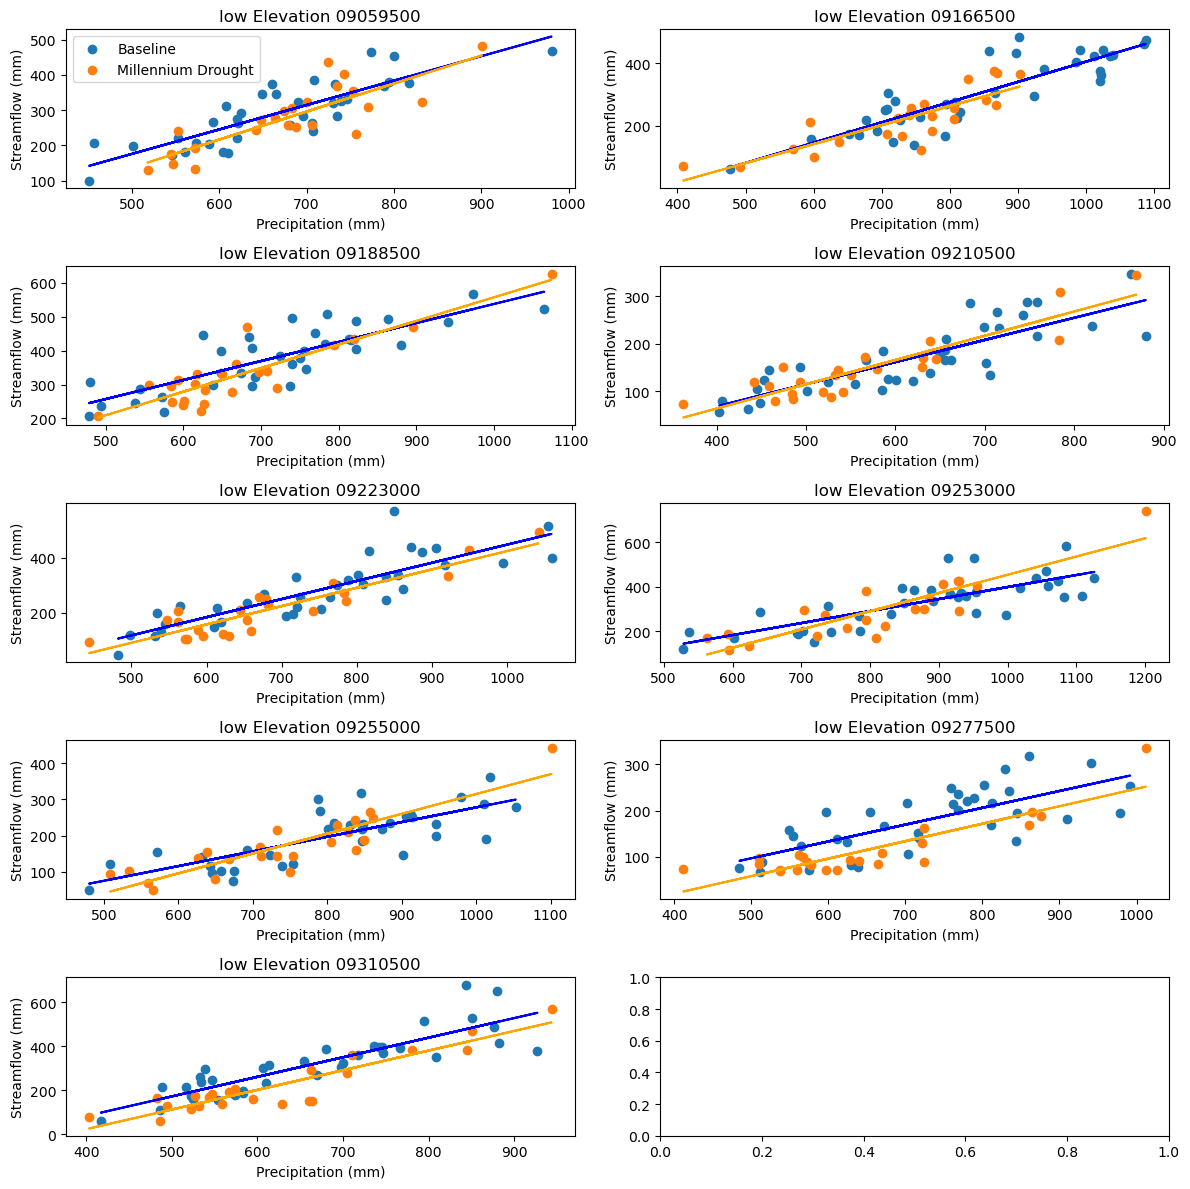

In [105]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(12,12), tight_layout=True)
axs = axs.flatten()
for i,site in enumerate(low_elevation_annual_q.site_no.values):
    dataset = low_elevation_annual_q.where(low_elevation_annual_q.wy_q_mm>0, drop=True).sel(site_no=site)
    
    ax = axs[i]
    ax.scatter(dataset.sel(water_year=slice(1964,1999)).wy_ppt,
                dataset.sel(water_year=slice(1964,1999)).wy_q_mm, label='Baseline')
    
    
    # add a best fit line for each period
    x = dataset.sel(water_year=slice(1964,1999)).wy_ppt.dropna(dim='water_year')
    y = dataset.sel(water_year=slice(1964,1999)).wy_q_mm.dropna(dim='water_year')
    m, b = np.polyfit(x, y, 1)
    ax.plot(x, m*x + b, color='blue')
    ax.scatter(dataset.sel(water_year=slice(2000,2022)).wy_ppt,
                dataset.sel(water_year=slice(2000,2022)).wy_q_mm,label='Millennium Drought')
    # add a best fit line for each period
    x = dataset.sel(water_year=slice(2000,2022)).wy_ppt.dropna(dim='water_year')
    y = dataset.sel(water_year=slice(2000,2022)).wy_q_mm.dropna(dim='water_year')
    m, b = np.polyfit(x, y, 1)
    ax.plot(x, m*x + b, color='orange')
    ax.set_xlabel('Precipitation (mm)')
    ax.set_ylabel('Streamflow (mm)')
    ax.set_title(f'low Elevation {site}')
    if i==0:
        ax.legend()

# <a id='toc8_'></a>[Figure 3  - Spring Precipitation Change with Streamflow Changes](#toc0_)

### <a id='toc8_1_1_'></a>[Grab Test resilts for streamflow changes](#toc0_)

In [106]:
# get the sites in the high, mid and low meanq results that are Rejected
high_meanq_rejected = high_meanq_ttest_results[(high_meanq_ttest_results['t-test Result']=='Null Hypothesis Rejected') |
                                                  (high_meanq_ttest_results['mannwhitney p']<0.05)].index.values 
mid_meanq_rejected = mid_meanq_ttest_results[(mid_meanq_ttest_results['t-test Result']=='Null Hypothesis Rejected') |
                                                (mid_meanq_ttest_results['mannwhitney p']<0.05)].index.values      
low_meanq_rejected = low_meanq_ttest_results[(low_meanq_ttest_results['t-test Result']=='Null Hypothesis Rejected') |
                                                (low_meanq_ttest_results['mannwhitney p']<0.05)].index.values  
# combine these into a single array
all_meanq_rejected = np.concatenate((high_meanq_rejected, mid_meanq_rejected, low_meanq_rejected))     

# get the sites in the high, mid and low meanq results with t-test p-values >0.05 and less than 0.05
high_meanq_ttest_p10 = high_meanq_ttest_results[((high_meanq_ttest_results['t-test Result']=='Null Hypothesis Accepted') &
                                                    (high_meanq_ttest_results['t-test p']<=0.05)) |
                                                   ((high_meanq_ttest_results['mannwhitney Result']=='Null Hypothesis Accepted') &
                                                    (high_meanq_ttest_results['mannwhitney p']<=0.05)) ].index.values
mid_meanq_ttest_p10 = mid_meanq_ttest_results[((mid_meanq_ttest_results['t-test Result']=='Null Hypothesis Accepted') &
                                                    (mid_meanq_ttest_results['t-test p']<=0.05)) |
                                                    ((mid_meanq_ttest_results['mannwhitney Result']=='Null Hypothesis Accepted') &
                                                    (mid_meanq_ttest_results['mannwhitney p']<=
                                                     0.05)) ].index.values
low_meanq_ttest_p10 = low_meanq_ttest_results[((low_meanq_ttest_results['t-test Result']=='Null Hypothesis Accepted') &
                                                    (low_meanq_ttest_results['t-test p']<=0.05)) |
                                                    ((low_meanq_ttest_results['mannwhitney Result']=='Null Hypothesis Accepted') &
                                                    (low_meanq_ttest_results['mannwhitney p']<=0.05)) ].index.values
# combine these into a single array
all_meanq_ttest_p10 = np.concatenate((high_meanq_ttest_p10, mid_meanq_ttest_p10, low_meanq_ttest_p10))

# get the sites in the high, mid and low meanq results with t-test p-values >0.05 and less than 0.05
high_meanq_ttest_acc = high_meanq_ttest_results[((high_meanq_ttest_results['t-test Result']=='Null Hypothesis Accepted') &
                                                    (high_meanq_ttest_results['t-test p']>0.05)) |
                                                   ((high_meanq_ttest_results['mannwhitney Result']=='Null Hypothesis Accepted') &
                                                    (high_meanq_ttest_results['mannwhitney p']>0.05)) ].index.values
mid_meanq_ttest_acc = mid_meanq_ttest_results[((mid_meanq_ttest_results['t-test Result']=='Null Hypothesis Accepted') &
                                                    (mid_meanq_ttest_results['t-test p']>0.05)) |
                                                    ((mid_meanq_ttest_results['mannwhitney Result']=='Null Hypothesis Accepted') &
                                                    (mid_meanq_ttest_results['mannwhitney p']>0.05)) ].index.values
low_meanq_ttest_acc = low_meanq_ttest_results[((low_meanq_ttest_results['t-test Result']=='Null Hypothesis Accepted') &
                                                    (low_meanq_ttest_results['t-test p']>0.05)) |
                                                    ((low_meanq_ttest_results['mannwhitney Result']=='Null Hypothesis Accepted') &
                                                    (low_meanq_ttest_results['mannwhitney p']>0.05)) ].index.values
# combine these into a single array
all_meanq_ttest_acc = np.concatenate((high_meanq_ttest_acc, mid_meanq_ttest_acc, low_meanq_ttest_acc))

### <a id='toc8_1_2_'></a>[Grab test results for percent change betwene periods for both precipitation and streamflow](#toc0_)

In [107]:
# get the sites in the high, mid, and low meanq percent change
high_meanq_percentchange = high_meanq_ttest_results['percent change']
mid_meanq_percentchange = mid_meanq_ttest_results['percent change']
low_meanq_percentchange = low_meanq_ttest_results['percent change']
# combine these into a single series
all_meanq_percentchange = pd.concat([high_meanq_percentchange, mid_meanq_percentchange, low_meanq_percentchange])

# get the sites in the high, mid and low springp results that are percent change
high_springp_percentchange = high_springp_ttest_results['percent change']
mid_springp_percentchange = mid_springp_ttest_results['percent change']
low_springp_percentchange = low_springp_ttest_results['percent change']
# combine these into a single series
all_springp_percentchange = pd.concat([high_springp_percentchange, mid_springp_percentchange, low_springp_percentchange])

# get the sites in the high, mid and low winterp results that are percent change
high_winterp_percentchange = high_winterp_ttest_results['percent change']
mid_winterp_percentchange = mid_winterp_ttest_results['percent change']
low_winterp_percentchange = low_winterp_ttest_results['percent change']
# combine these into a single series
all_winterp_percentchange = pd.concat([high_winterp_percentchange, mid_winterp_percentchange, low_winterp_percentchange])

# get the sites in the high, mid and low fallp results that are percent change
high_fallp_percentchange = high_fallp_ttest_results['percent change']
mid_fallp_percentchange = mid_fallp_ttest_results['percent change']
low_fallp_percentchange = low_fallp_ttest_results['percent change']
# combine these into a single series
all_fallp_percentchange = pd.concat([high_fallp_percentchange, mid_fallp_percentchange, low_fallp_percentchange])

# get the sites in the high, mid and low summerp results that are percent change
high_summerp_percentchange = high_summerp_ttest_results['percent change']
mid_summerp_percentchange = mid_summerp_ttest_results['percent change']
low_summerp_percentchange = low_summerp_ttest_results['percent change']
# combine these into a single series
all_summerp_percentchange = pd.concat([high_summerp_percentchange, mid_summerp_percentchange, low_summerp_percentchange])

# pull in the PRISM percent diff 

pre = slice('1964-01-01', '1999-09-30')
post = slice('2000-01-01', '2022-09-30')
pre_spring_ppt = prism_4km_all_ds.where(prism_4km_all_ds.month.dt.month.isin([3,4,5,6])).sel(month=pre).groupby('month.year').sum().mean(dim='year')
post_spring_ppt = prism_4km_all_ds.where(prism_4km_all_ds.month.dt.month.isin([3,4,5,6])).sel(month=post).groupby('month.year').sum().mean(dim='year')
# cacluate the percent difference between the two periods and plot
prism_springp_percent_diff = (100*(post_spring_ppt.ppt-pre_spring_ppt.ppt)/pre_spring_ppt.ppt)
prism_springp_diff = ((post_spring_ppt.ppt-pre_spring_ppt.ppt))

### <a id='toc8_1_3_'></a>[Import DEM for hillshade](#toc0_)

In [108]:
from matplotlib.cbook import get_sample_data
from matplotlib.colors import LightSource
src_4km = rxr.open_rasterio('../data/geodata/ucrb_dem_32613_150m.tif')
# mask values less than 0
src_4km = src_4km.where(src_4km > 0)
# downsample to 800m
src_4km = src_4km.rio.reproject(dst_crs='EPSG:32613', resolution=3945.843241747955)
# mask values less than 0
src_4km = src_4km.where(src_4km > 0)
ls = LightSource(azdeg=315, altdeg=45)
dx, dy =3945.843241747955,3945.843241747955

### <a id='toc8_1_4_'></a>[Import HCDN basins to add to plot](#toc0_)

In [109]:
hcdn_basins = gpd.read_file('../data/geodata/ucrb_selected_basins.geojson')
hcdn_basins = hcdn_basins.set_index('STAID')
# these two basins are especially difficult since they are small and extremely flashy and ephemeral. the last basin ended its record in the early 2000s
hcdn_basins = hcdn_basins.set_crs(epsg='32613', allow_override=True)

In [110]:
gage_locs = gpd.points_from_xy(hcdn_basins.LNG_GAGE, hcdn_basins.LAT_GAGE)
gage_loc_gdf = gpd.GeoDataFrame(hcdn_basins.index, geometry=gage_locs, crs=4326)
# convert to 32613
gage_locations = gage_loc_gdf.to_crs(32613)
# set index to STAID
gage_locations = gage_locations.set_index('STAID')


### <a id='toc8_1_5_'></a>[Plot Figure](#toc0_)

(-148750.26486232155, 446464.52843976894, 3938943.52723589, 4867641.66289769)

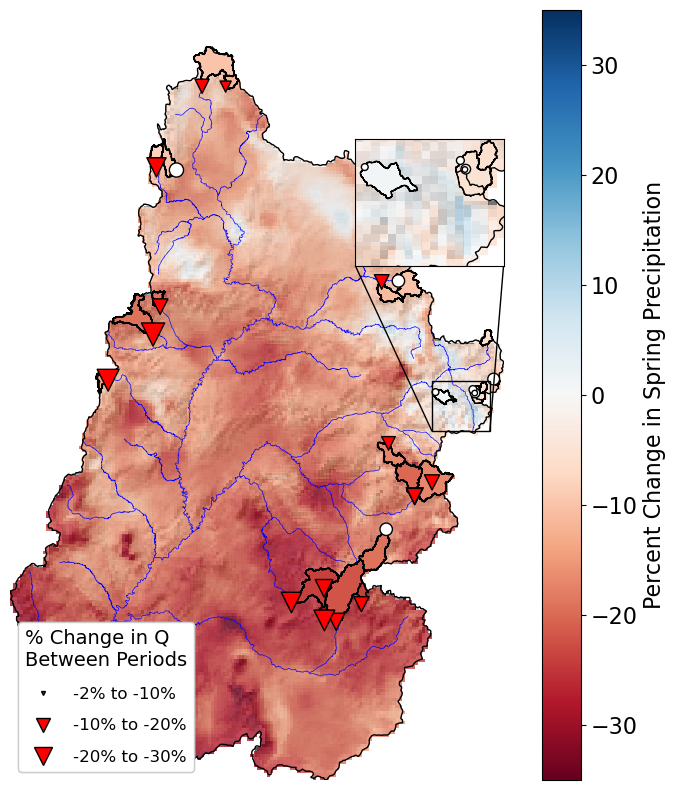

In [111]:
# import the UCRB basin boundary
ucrb_basin = gpd.read_file('../data/geodata/Upper_Colorado_River_Basin_Boundary.json')
# set the crs to the same as hcdn basins
gage_locations = gage_locations.to_crs(hcdn_basins.crs)
ucrb_basin = ucrb_basin.to_crs(hcdn_basins.crs)

ucrb_stream_traces = gpd.read_file('../data/geodata/Colorado_River_Basin_Rivers.geojson')
ucrb_stream_traces = ucrb_stream_traces.to_crs(32613)
# clip to UCRB boundary
ucrb_stream_traces = gpd.clip(ucrb_stream_traces, ucrb_basin_boundary)

# add all_meanq_percentchange as a column in the gage_locations dataframe
gage_locations['meanq_percentchange'] = np.abs(all_meanq_percentchange.astype(int))*8

# add all_springp_percentchange as a column in the hcdn_basins dataframe
hcdn_basins['springp_percentchange'] = (all_springp_percentchange.astype(int))

# create a fig and ax
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(ls.hillshade(src_4km.squeeze().values, vert_exag=10, dx=dx, dy=dy), cmap='gray',extent=[ucrb_basin_boundary.bounds.loc[0]['minx'], 
                                                                                                ucrb_basin_boundary.bounds.loc[0]['maxx'], 
                                                                                                            ucrb_basin_boundary.bounds.loc[0]['miny'], 
                                                                                                            ucrb_basin_boundary.bounds.loc[0]['maxy']])
# plot the prism percent diff
im = ax.imshow(prism_springp_percent_diff.values,
                       cmap='RdBu',alpha=0.8, vmin=-35, vmax=35,extent=[ucrb_basin_boundary.bounds.loc[0]['minx'], 
                                                                        ucrb_basin_boundary.bounds.loc[0]['maxx'], 
                                                                        ucrb_basin_boundary.bounds.loc[0]['miny'], 
                                                                        ucrb_basin_boundary.bounds.loc[0]['maxy']])               
ucrb_stream_traces.plot(ax=ax, color='blue', linewidth=0.5, zorder=1)    
# plot the hcdn basins
hcdn_basins.plot(ax=ax, 
                 column='springp_percentchange',
                 cmap='RdBu', 
                 edgecolor='black', 
                 linewidth=1,
                 vmin=-35, 
                 vmax=35)
# plot a legend for the colorbar
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=plt.Normalize(vmin=-35, vmax=35))
sm._A = []
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Percent Change in Spring Precipitation', fontsize=16)
# increase ticklabel size on colorbar
cbar.ax.tick_params(labelsize=16)
# plot the ucrb basins
ucrb_basin.plot(ax=ax, color='none', edgecolor='black', linewidth=1)

# plot the gage location geometry with sizes based on all_meanq_percentchange
gage_locations[gage_locations.index.isin(all_meanq_ttest_acc)].plot(markersize=gage_locations[gage_locations.index.isin(all_meanq_ttest_acc)]['meanq_percentchange'], 
                    label='Decrease in Q (p$\geq$0.05)', 
                    marker='o', 
                    ax=ax, 
                    color='white', 
                    ec='k')
# plot gage locations with significant change in meanq                    
# gage_locations.loc[all_meanq_ttest_p10].plot(markersize=gage_locations.loc[all_meanq_ttest_p10]['meanq_percentchange'],
#                                             label='Decrease in Q (0.05$\leq$p<0.10)', 
#                                             marker='v', 
#                                             ax=ax, 
#                                             color='yellow', 
#                                             ec='k')
# plot gage locations with significant change in meanq                    
gage_locations.loc[all_meanq_rejected].plot(markersize=gage_locations.loc[all_meanq_rejected]['meanq_percentchange'],
                                            label='Decrease in Q (p<0.05)', 
                                            marker='v', 
                                            ax=ax, 
                                            color='red', 
                                            ec='k')
# make a inset map
axins = ax.inset_axes(bounds=[0.7,0.6,.3,.3])
axins.imshow(ls.hillshade(src_4km.squeeze().values, vert_exag=10, dx=dx, dy=dy), cmap='gray',extent=[ucrb_basin_boundary.bounds.loc[0]['minx'],
                                                                                                    ucrb_basin_boundary.bounds.loc[0]['maxx'],
                                                                                                    ucrb_basin_boundary.bounds.loc[0]['miny'],
                                                                                                    ucrb_basin_boundary.bounds.loc[0]['maxy']])
# plot the prism percent diff
axins.imshow(prism_springp_percent_diff.values,
                          cmap='RdBu',alpha=0.8, vmin=-35, vmax=35,extent=[ucrb_basin_boundary.bounds.loc[0]['minx'],
                                                                            ucrb_basin_boundary.bounds.loc[0]['maxx'],          
                                                                            ucrb_basin_boundary.bounds.loc[0]['miny'],
                                                                            ucrb_basin_boundary.bounds.loc[0]['maxy']])
# plot the hcdn basins
hcdn_basins.plot(ax=axins,
                    column='springp_percentchange',
                    cmap='RdBu',
                    edgecolor='black',
                    linewidth=1,
                    vmin=-35,
                    vmax=35)

# plot the gage location geometry with sizes based on all_meanq_percentchange
gage_locations[gage_locations.index.isin(all_meanq_ttest_acc)].plot(markersize=gage_locations[gage_locations.index.isin(all_meanq_ttest_acc)]['meanq_percentchange'], 
                    label='Decrease in Q (p$\geq$0.05)', 
                    marker='o', 
                    ax=axins, 
                    color='white', 
                    ec='k')
# plot gage locations with significant change in meanq                    
# gage_locations.loc[all_meanq_ttest_p10].plot(markersize=gage_locations.loc[all_meanq_ttest_p10]['meanq_percentchange'],
#                                             label='Decrease in Q (0.05$\leq$p<0.10)', 
#                                             marker='v', 
#                                             ax=axins, 
#                                             color='yellow', 
#                                             ec='k')
# plot gage locations with significant change in meanq                    
gage_locations.loc[all_meanq_rejected].plot(markersize=gage_locations.loc[all_meanq_rejected]['meanq_percentchange'],
                                            label='Decrease in Q (p<0.05)', 
                                            marker='v', 
                                            ax=axins, 
                                            color='red', 
                                            ec='k')                    
# set the xlim and ylim for the inset map 
axins.set_xlim(3.6e5,4.3e5)
axins.set_ylim(4.36e6,4.42e6)
# hide x and y ticks
axins.set_xticks([])
axins.set_yticks([])
# draw a rectangle over the xlim ylim area
ax.indicate_inset_zoom(axins, edgecolor="black", lw=1, alpha=1)
# plot the ucrb basins
ucrb_basin.plot(ax=axins, color='none', edgecolor='black', linewidth=1)

# need to add existing legend back
leg1 = ax.legend(loc='upper right',framealpha=1, title='HCDN Gages',title_fontsize=14,fontsize=12,)
# create a second legend for the size of the gage locations
# some bins to indicate size in legend
_, bins = pd.cut(gage_locations['meanq_percentchange']/8, bins=[1,11,21], precision=0, retbins=True)
# create second legend
import matplotlib.lines as mlines
# create label for each bin with a range between the bin values
labels = ['-'+str(int(b-1))+'%'+' to '+'-'+str(int(bins[i]-1+10))+'%' for i, b in enumerate(bins)]
labels.append(str(int(bins[-1]))+'%+')
labels[0] = '-2'+'%'+' to '+'-'+str(int(bins[0]-1+10))+'%'
ax.add_artist(
    ax.legend(
        handles=[
            mlines.Line2D(
                [],
                [],
                color="red",
                lw=0,
                marker="v",
                markeredgecolor='k',
                markersize=np.sqrt(b*8),
                label=labels[i],
            )
            for i, b in enumerate(bins)
        ],
        loc='lower left',
        # make distance between legend items a bit bigger
        labelspacing=1,
        # add title to the legend
        title='% Change in Q\nBetween Periods',
        # increase title font size
        title_fontsize=14,
        fontsize=12,
        framealpha=1,
    )
)
# restore original legend
# ax.add_artist(leg1)
# remove axis labels
ax.axis('off')
# save figure at 700 dpi and 9x6 centimeters
# fig.savefig('../figures/spring_precip_streamflow_with_legends.svg', dpi=700, pad_inches=0.1)